# Part I - (Flights and performance)
## by (Andrea Headley)

## Investigation Overview

The overall goal of this explanatory report is to share some of the key insights gathered during the exploratory exercise done on the dataset that has data about flights performance across several cities in the US. 

The key insights that will be presented are:
- the frequency of delays that carriers incurred and the variables that contributed to the delays
- the cities of origin with the most frequent flights
- airports with the best performance, in terms of early departures and delays
- the top ten busiest airports

## Dataset Overview

The data used for this project are segregated into two datasets - one with flight data for December 2019 and one with flight data for December 2020. The dataset from December 2019 has 625763 records and the dataset with flight data from 2020 December has 371357 records. The structure of both datasets is the same. Some of the key features of the datasets are:
- Departure Performance - Carrier departure times 
- Departure and Arrival delays 
- Carrier arrival times
- Cancellations and Diversions
- Causes of delays:
    - Carrier delays
    - Security delays
    - Weather delays
    - National Air Systems (NAS) delays 
- Distribution of flights at origin and destination airports
- Airport performance 


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
#extract December 2019 flight data and store in a dataframe
df_flights_12_2019 = pd.read_csv('Flights_12_2019.csv')

In [5]:
#Check few rows of dataframe to confirm data was copied
df_flights_12_2019.head()

,,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM
0,2019,4,12,9,1,12/9/2019,YX,20452,YX,N117HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,4,12,10,2,12/10/2019,YX,20452,YX,N131HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,4,12,11,3,12/11/2019,YX,20452,YX,N108HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,4,12,12,4,12/12/2019,YX,20452,YX,N111HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,4,12,13,5,12/13/2019,YX,20452,YX,N136HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Check datatypes of columns
df_flights_12_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625763 entries, 0 to 625762
Data columns (total 85 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0                            625763 non-null  int64  
 1   QUARTER                  625763 non-null  int64  
 2   MONTH                    625763 non-null  int64  
 3   DAY_OF_MONTH             625763 non-null  int64  
 4   DAY_OF_WEEK              625763 non-null  int64  
 5   FL_DATE                  625763 non-null  object 
 6   OP_UNIQUE_CARRIER        625763 non-null  object 
 7   OP_CARRIER_AIRLINE_ID    625763 non-null  int64  
 8   OP_CARRIER               625763 non-null  object 
 9   TAIL_NUM                 625306 non-null  object 
 10  OP_CARRIER_FL_NUM        625763 non-null  int64  
 11  ORIGIN_AIRPORT_ID        625763 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID    625763 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID    625763 non-null  int64  
 14  ORIG

In [7]:
#Look for columns with nulls
df_flights_12_2019.isnull().sum()

                           0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
                       ...  
DIV2_WHEELS_ON        625740
DIV2_TOTAL_GTIME      625740
DIV2_LONGEST_GTIME    625740
DIV2_WHEELS_OFF       625755
DIV2_TAIL_NUM         625755
Length: 85, dtype: int64

In [8]:
#Fill missing data with 0's
df_flights_12_2019 = df_flights_12_2019.fillna(0)

In [9]:
#Confirm nulls/NaN have been replaced with 0's
df_flights_12_2019.isnull().sum()

                      0
QUARTER               0
MONTH                 0
DAY_OF_MONTH          0
DAY_OF_WEEK           0
                     ..
DIV2_WHEELS_ON        0
DIV2_TOTAL_GTIME      0
DIV2_LONGEST_GTIME    0
DIV2_WHEELS_OFF       0
DIV2_TAIL_NUM         0
Length: 85, dtype: int64

In [10]:
#Check for duplicates
df_flights_12_2019.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
625758    False
625759    False
625760    False
625761    False
625762    False
Length: 625763, dtype: bool

In [11]:
#Look at a few rows again to confirm that the empty fields have been filled with 0's
df_flights_12_2019.head()

,,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM
0,2019,4,12,9,1,12/9/2019,YX,20452,YX,N117HQ,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2019,4,12,10,2,12/10/2019,YX,20452,YX,N131HQ,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2019,4,12,11,3,12/11/2019,YX,20452,YX,N108HQ,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2019,4,12,12,4,12/12/2019,YX,20452,YX,N111HQ,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2019,4,12,13,5,12/13/2019,YX,20452,YX,N136HQ,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
#Look for nulls again
# df_flights_12_2019.isnull()

There are a number of columns which hold data that are related to time - flight times, delays e.t.c, but have the wrong data type, mainly float. The following step converts them to string, since some of the columns have the time in military format. Converting them to integer presented problems, becaise of the decimal points, so I am including the cleaner version of my transformation. Also, I am not doing any calculations on the time values so, it is okay to leave them as string.

In [13]:
#Change the data type of the following columns from float to string to reflect the time correctly 
df_flights_12_2019 = df_flights_12_2019.astype({ 'DEP_TIME': 'str','WHEELS_OFF': 'str','WHEELS_ON': 'str',
                                                'ARR_TIME': 'str','ACTUAL_ELAPSED_TIME': 'str','AIR_TIME': 'str','TAXI_IN': 'str',
                                                'FIRST_DEP_TIME': 'str','TOTAL_ADD_GTIME': 'str','LONGEST_ADD_GTIME': 'str',
                                                'DIV_REACHED_DEST': 'str','DIV_ACTUAL_ELAPSED_TIME': 'str',
                                                'DIV1_AIRPORT_ID': 'str','DIV1_AIRPORT_SEQ_ID': 'str','DIV1_WHEELS_ON': 'str','DIV1_TOTAL_GTIME': 'str',
                                                'DIV1_LONGEST_GTIME': 'str','DIV1_WHEELS_OFF': 'str','DIV2_AIRPORT_ID': 'str','DIV2_AIRPORT_SEQ_ID': 'str',
                                                'DIV2_WHEELS_ON': 'str','DIV2_TOTAL_GTIME': 'str','DIV2_LONGEST_GTIME': 'str','DIV2_WHEELS_OFF': 'str'})

In [14]:
#Confirm datatypes have changed
df_flights_12_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625763 entries, 0 to 625762
Data columns (total 85 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0                            625763 non-null  int64  
 1   QUARTER                  625763 non-null  int64  
 2   MONTH                    625763 non-null  int64  
 3   DAY_OF_MONTH             625763 non-null  int64  
 4   DAY_OF_WEEK              625763 non-null  int64  
 5   FL_DATE                  625763 non-null  object 
 6   OP_UNIQUE_CARRIER        625763 non-null  object 
 7   OP_CARRIER_AIRLINE_ID    625763 non-null  int64  
 8   OP_CARRIER               625763 non-null  object 
 9   TAIL_NUM                 625763 non-null  object 
 10  OP_CARRIER_FL_NUM        625763 non-null  int64  
 11  ORIGIN_AIRPORT_ID        625763 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID    625763 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID    625763 non-null  int64  
 14  ORIG

In [15]:
#Update the data in the columns whose data types were changed above - remove .0 from end of column values
columns_update = ['DEP_TIME','WHEELS_OFF','WHEELS_ON',  'ARR_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME',
                                                'FIRST_DEP_TIME','TOTAL_ADD_GTIME','LONGEST_ADD_GTIME',            
                  'DIV_REACHED_DEST','DIV_ACTUAL_ELAPSED_TIME', 'DIV1_AIRPORT_ID','DIV1_AIRPORT_SEQ_ID','DIV1_WHEELS_ON','DIV1_TOTAL_GTIME',
                                                'DIV1_LONGEST_GTIME','DIV1_WHEELS_OFF','DIV2_AIRPORT_ID','DIV2_AIRPORT_SEQ_ID',
                                                'DIV2_WHEELS_ON','DIV2_TOTAL_GTIME','DIV2_LONGEST_GTIME','DIV2_WHEELS_OFF'
                 ]
for col in columns_update:
    #print( df_flights_12_2019[col])
    df_flights_12_2019[col] = df_flights_12_2019[col].str.rstrip('.0')

#### The steps done above for December 2019 are repeated for the December 2020 flight data dataframe as follows. 

In [16]:
df_flights_12_2020 = pd.read_csv('Flights_12_2020.csv')

In [17]:
df_flights_12_2020.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM
0,2020,4,12,28,1,12/28/2020,AA,19805,AA,N727AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,4,12,29,2,12/29/2020,AA,19805,AA,N717AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,4,12,30,3,12/30/2020,AA,19805,AA,N722AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,4,12,31,4,12/31/2020,AA,19805,AA,N727AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,4,12,1,2,12/1/2020,AA,19805,AA,N914UY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Check datatypes of the variables
df_flights_12_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371357 entries, 0 to 371356
Data columns (total 85 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YEAR                     371357 non-null  int64  
 1   QUARTER                  371357 non-null  int64  
 2   MONTH                    371357 non-null  int64  
 3   DAY_OF_MONTH             371357 non-null  int64  
 4   DAY_OF_WEEK              371357 non-null  int64  
 5   FL_DATE                  371357 non-null  object 
 6   OP_UNIQUE_CARRIER        371357 non-null  object 
 7   OP_CARRIER_AIRLINE_ID    371357 non-null  int64  
 8   OP_CARRIER               371357 non-null  object 
 9   TAIL_NUM                 370618 non-null  object 
 10  OP_CARRIER_FL_NUM        371357 non-null  int64  
 11  ORIGIN_AIRPORT_ID        371357 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID    371357 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID    371357 non-null  int64  
 14  ORIG

In [19]:
df_flights_12_2020.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
                       ...  
DIV2_WHEELS_ON        371349
DIV2_TOTAL_GTIME      371349
DIV2_LONGEST_GTIME    371349
DIV2_WHEELS_OFF       371354
DIV2_TAIL_NUM         371354
Length: 85, dtype: int64

In [20]:
#Fill missing data with 0's
# df_flights_12_2019.fillna(0,inplace=True)

# df_flights_12_2020 = df_flights_12_2020.replace("nan", 0)

#Look for nulls again
# df_flights_12_2019.isnull()

df_flights_12_2020 = df_flights_12_2020.fillna( 0)

In [21]:
df_flights_12_2020.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM
0,2020,4,12,28,1,12/28/2020,AA,19805,AA,N727AN,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2020,4,12,29,2,12/29/2020,AA,19805,AA,N717AN,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2020,4,12,30,3,12/30/2020,AA,19805,AA,N722AN,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2020,4,12,31,4,12/31/2020,AA,19805,AA,N727AN,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2020,4,12,1,2,12/1/2020,AA,19805,AA,N914UY,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [22]:
#Change the datatype of the following columns from float to string to reflect the time better
df_flights_12_2020 = df_flights_12_2020.astype({ 'DEP_TIME': 'str','WHEELS_OFF': 'str','WHEELS_ON': 'str',
                                                'ARR_TIME': 'str','ACTUAL_ELAPSED_TIME': 'str','TAXI_OUT': 'str','TAXI_IN': 'str',
                                                'FIRST_DEP_TIME': 'str','TOTAL_ADD_GTIME': 'str','LONGEST_ADD_GTIME': 'str',
                                                'DIV_REACHED_DEST': 'str','DIV_ACTUAL_ELAPSED_TIME': 'str',
                                                'DIV1_AIRPORT_ID': 'str','DIV1_AIRPORT_SEQ_ID': 'str','DIV1_WHEELS_ON': 'str','DIV1_TOTAL_GTIME': 'str',
                                                'DIV1_LONGEST_GTIME': 'str','DIV1_WHEELS_OFF': 'str','DIV2_AIRPORT_ID': 'str','DIV2_AIRPORT_SEQ_ID': 'str',
                                                'DIV2_WHEELS_ON': 'str','DIV2_TOTAL_GTIME': 'str','DIV2_LONGEST_GTIME': 'str','DIV2_WHEELS_OFF': 'str'})

In [23]:
#Check datatypes of the variables
df_flights_12_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371357 entries, 0 to 371356
Data columns (total 85 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YEAR                     371357 non-null  int64  
 1   QUARTER                  371357 non-null  int64  
 2   MONTH                    371357 non-null  int64  
 3   DAY_OF_MONTH             371357 non-null  int64  
 4   DAY_OF_WEEK              371357 non-null  int64  
 5   FL_DATE                  371357 non-null  object 
 6   OP_UNIQUE_CARRIER        371357 non-null  object 
 7   OP_CARRIER_AIRLINE_ID    371357 non-null  int64  
 8   OP_CARRIER               371357 non-null  object 
 9   TAIL_NUM                 371357 non-null  object 
 10  OP_CARRIER_FL_NUM        371357 non-null  int64  
 11  ORIGIN_AIRPORT_ID        371357 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID    371357 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID    371357 non-null  int64  
 14  ORIG

In [24]:
#Update multiple columns, remove .0 from end of column values
columns_2020_update = ['DEP_TIME','WHEELS_OFF','WHEELS_ON',  'ARR_TIME','ACTUAL_ELAPSED_TIME', 'TAXI_IN', 'TAXI_OUT',  
                                                'FIRST_DEP_TIME','TOTAL_ADD_GTIME','LONGEST_ADD_GTIME',          
                  'DIV_REACHED_DEST','DIV_ACTUAL_ELAPSED_TIME', 'DIV1_AIRPORT_ID','DIV1_AIRPORT_SEQ_ID','DIV1_WHEELS_ON','DIV1_TOTAL_GTIME',
                                                'DIV1_LONGEST_GTIME','DIV1_WHEELS_OFF','DIV2_AIRPORT_ID','DIV2_AIRPORT_SEQ_ID',
                                                'DIV2_WHEELS_ON','DIV2_TOTAL_GTIME','DIV2_LONGEST_GTIME','DIV2_WHEELS_OFF']
for col in columns_2020_update:
#     print( df_flights_12_2020[col])
    df_flights_12_2020[col] = df_flights_12_2020[col].str.rstrip('.0')

In [25]:
df_flights_12_2020.isnull().sum()

YEAR                  0
QUARTER               0
MONTH                 0
DAY_OF_MONTH          0
DAY_OF_WEEK           0
                     ..
DIV2_WHEELS_ON        0
DIV2_TOTAL_GTIME      0
DIV2_LONGEST_GTIME    0
DIV2_WHEELS_OFF       0
DIV2_TAIL_NUM         0
Length: 85, dtype: int64

In [26]:
#Check datatypes of the variables
df_flights_12_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371357 entries, 0 to 371356
Data columns (total 85 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YEAR                     371357 non-null  int64  
 1   QUARTER                  371357 non-null  int64  
 2   MONTH                    371357 non-null  int64  
 3   DAY_OF_MONTH             371357 non-null  int64  
 4   DAY_OF_WEEK              371357 non-null  int64  
 5   FL_DATE                  371357 non-null  object 
 6   OP_UNIQUE_CARRIER        371357 non-null  object 
 7   OP_CARRIER_AIRLINE_ID    371357 non-null  int64  
 8   OP_CARRIER               371357 non-null  object 
 9   TAIL_NUM                 371357 non-null  object 
 10  OP_CARRIER_FL_NUM        371357 non-null  int64  
 11  ORIGIN_AIRPORT_ID        371357 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID    371357 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID    371357 non-null  int64  
 14  ORIG

#### Since the carrier data imported from the main data set is in code formation, for clarity, I've imported the full names of the carriers from a lookup table in the flight performance dataset.  

In [27]:
df_new = pd.read_csv('L_UNIQUE_CARRIERS.csv')

In [28]:
df_new.head()

,OP_UNIQUE_CARRIER,CARRIER_DESCRIPTION
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


#### Merge df_flights_12_2019 dataframe with carrier code dataframe to add full names of carriers to df_flights_12_2019

In [29]:
#Merge df_flights_12_2019 with df_new to get carrier full names

df_flights_12_2019_carrier = pd.merge(df_flights_12_2019,df_new, how="left", on="OP_UNIQUE_CARRIER" )

In [30]:
#Check few rows of dataframe
df_flights_12_2019_carrier.head()

,,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,CARRIER_DESCRIPTION
0,2019,4,12,9,1,12/9/2019,YX,20452,YX,N117HQ,...,0,0,,,,,,,0,Republic Airline
1,2019,4,12,10,2,12/10/2019,YX,20452,YX,N131HQ,...,0,0,,,,,,,0,Republic Airline
2,2019,4,12,11,3,12/11/2019,YX,20452,YX,N108HQ,...,0,0,,,,,,,0,Republic Airline
3,2019,4,12,12,4,12/12/2019,YX,20452,YX,N111HQ,...,0,0,,,,,,,0,Republic Airline
4,2019,4,12,13,5,12/13/2019,YX,20452,YX,N136HQ,...,0,0,,,,,,,0,Republic Airline


In [31]:
#confirm data record length is the same after merge
df_flights_12_2019_carrier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625763 entries, 0 to 625762
Data columns (total 86 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0                            625763 non-null  int64  
 1   QUARTER                  625763 non-null  int64  
 2   MONTH                    625763 non-null  int64  
 3   DAY_OF_MONTH             625763 non-null  int64  
 4   DAY_OF_WEEK              625763 non-null  int64  
 5   FL_DATE                  625763 non-null  object 
 6   OP_UNIQUE_CARRIER        625763 non-null  object 
 7   OP_CARRIER_AIRLINE_ID    625763 non-null  int64  
 8   OP_CARRIER               625763 non-null  object 
 9   TAIL_NUM                 625763 non-null  object 
 10  OP_CARRIER_FL_NUM        625763 non-null  int64  
 11  ORIGIN_AIRPORT_ID        625763 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID    625763 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID    625763 non-null  int64  
 14  ORIG

#### Merge df_flights_12_2020 dataframe with carrier code dataframe to add full names of carriers to df_flights_12_2020

In [32]:
#Merge df_flights_12_2020 with df_new to get carrier full names

df_flights_12_2020_carrier = pd.merge(df_flights_12_2020, df_new, how="left", on="OP_UNIQUE_CARRIER" )

In [33]:
#Check few rows of dataframe
df_flights_12_2020_carrier.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,CARRIER_DESCRIPTION
0,2020,4,12,28,1,12/28/2020,AA,19805,AA,N727AN,...,0,0,,,,,,,0,American Airlines Inc.
1,2020,4,12,29,2,12/29/2020,AA,19805,AA,N717AN,...,0,0,,,,,,,0,American Airlines Inc.
2,2020,4,12,30,3,12/30/2020,AA,19805,AA,N722AN,...,0,0,,,,,,,0,American Airlines Inc.
3,2020,4,12,31,4,12/31/2020,AA,19805,AA,N727AN,...,0,0,,,,,,,0,American Airlines Inc.
4,2020,4,12,1,2,12/1/2020,AA,19805,AA,N914UY,...,0,0,,,,,,,0,American Airlines Inc.


In [34]:
#confirm data record length is the same after merge - count should be 371357
df_flights_12_2020_carrier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371357 entries, 0 to 371356
Data columns (total 86 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YEAR                     371357 non-null  int64  
 1   QUARTER                  371357 non-null  int64  
 2   MONTH                    371357 non-null  int64  
 3   DAY_OF_MONTH             371357 non-null  int64  
 4   DAY_OF_WEEK              371357 non-null  int64  
 5   FL_DATE                  371357 non-null  object 
 6   OP_UNIQUE_CARRIER        371357 non-null  object 
 7   OP_CARRIER_AIRLINE_ID    371357 non-null  int64  
 8   OP_CARRIER               371357 non-null  object 
 9   TAIL_NUM                 371357 non-null  object 
 10  OP_CARRIER_FL_NUM        371357 non-null  int64  
 11  ORIGIN_AIRPORT_ID        371357 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID    371357 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID    371357 non-null  int64  
 14  ORIG

#### Import data from cancellation code look up table, to get the full names descriptions

In [35]:
#Load cancellation codes and descriptions data in dataframe
df_cancellation_codes = pd.read_csv("L_CANCELLATION.csv")

In [36]:
#Check data loaded 
df_cancellation_codes

,CANCELLATION_CODE,CANCELLED_DESCRIPTION
0,A,Carrier
1,B,Weather
2,C,National Air System
3,D,Security


#### Merge cancellation code descriptions into the two main dataframes

In [37]:
df_flights_12_2019_new = pd.merge(df_flights_12_2019_carrier,df_cancellation_codes, how="left", on="CANCELLATION_CODE" )

In [38]:
df_flights_12_2020_new = pd.merge(df_flights_12_2020_carrier,df_cancellation_codes, how="left", on="CANCELLATION_CODE" )

In [39]:
df_flights_12_2019_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625763 entries, 0 to 625762
Data columns (total 87 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0                            625763 non-null  int64  
 1   QUARTER                  625763 non-null  int64  
 2   MONTH                    625763 non-null  int64  
 3   DAY_OF_MONTH             625763 non-null  int64  
 4   DAY_OF_WEEK              625763 non-null  int64  
 5   FL_DATE                  625763 non-null  object 
 6   OP_UNIQUE_CARRIER        625763 non-null  object 
 7   OP_CARRIER_AIRLINE_ID    625763 non-null  int64  
 8   OP_CARRIER               625763 non-null  object 
 9   TAIL_NUM                 625763 non-null  object 
 10  OP_CARRIER_FL_NUM        625763 non-null  int64  
 11  ORIGIN_AIRPORT_ID        625763 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID    625763 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID    625763 non-null  int64  
 14  ORIG

In [40]:
df_flights_12_2019_new.head()

,,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,CARRIER_DESCRIPTION,CANCELLED_DESCRIPTION
0,2019,4,12,9,1,12/9/2019,YX,20452,YX,N117HQ,...,0,,,,,,,0,Republic Airline,NaN
1,2019,4,12,10,2,12/10/2019,YX,20452,YX,N131HQ,...,0,,,,,,,0,Republic Airline,NaN
2,2019,4,12,11,3,12/11/2019,YX,20452,YX,N108HQ,...,0,,,,,,,0,Republic Airline,NaN
3,2019,4,12,12,4,12/12/2019,YX,20452,YX,N111HQ,...,0,,,,,,,0,Republic Airline,NaN
4,2019,4,12,13,5,12/13/2019,YX,20452,YX,N136HQ,...,0,,,,,,,0,Republic Airline,NaN


In [41]:
df_flights_12_2020_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371357 entries, 0 to 371356
Data columns (total 87 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YEAR                     371357 non-null  int64  
 1   QUARTER                  371357 non-null  int64  
 2   MONTH                    371357 non-null  int64  
 3   DAY_OF_MONTH             371357 non-null  int64  
 4   DAY_OF_WEEK              371357 non-null  int64  
 5   FL_DATE                  371357 non-null  object 
 6   OP_UNIQUE_CARRIER        371357 non-null  object 
 7   OP_CARRIER_AIRLINE_ID    371357 non-null  int64  
 8   OP_CARRIER               371357 non-null  object 
 9   TAIL_NUM                 371357 non-null  object 
 10  OP_CARRIER_FL_NUM        371357 non-null  int64  
 11  ORIGIN_AIRPORT_ID        371357 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID    371357 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID    371357 non-null  int64  
 14  ORIG

### What is the structure of your dataset?

Because of the size of the data from the source system, the data can only be downloaded from the web site in chunks by filtering on geographical location, year and month. Two major files were created, one with flight data for December 2019 and one with flight data for December 2020. The dataset from December 2019 has 625763 records and the dataset with flight data from 2020 December has 371357 records. The structure of both dataset is the same and is outlined below. The variables with time data were converted from float to string when read from the csv file, and were subsequently cleaned by removing the decimal and '0' following the decimal and converted to a string. The length of the data after removal of the '.0' is 4 and is in military format. If any calculations are required during exploration, the data type will be converted to an integer before calculations are done.
There are no duplicates in the datasets
 
 -	YEAR                     
-	QUARTER                  
-	MONTH                    
-	DAY_OF_MONTH             
-	DAY_OF_WEEK              
-	FL_DATE                  
-	OP_UNIQUE_CARRIER        
-	OP_CARRIER_AIRLINE_ID    
-	OP_CARRIER               
-	TAIL_NUM                 
-	OP_CARRIER_FL_NUM        
-	ORIGIN_AIRPORT_ID        
-	ORIGIN_AIRPORT_SEQ_ID    
-	ORIGIN_CITY_MARKET_ID    
-	ORIGIN                   
-	ORIGIN_CITY_NAME         
-	ORIGIN_STATE_ABR         
-	ORIGIN_STATE_FIPS        
-	ORIGIN_STATE_NM          
-	ORIGIN_WAC               
-	DEST_AIRPORT_ID          
-	DEST_AIRPORT_SEQ_ID      
-	DEST_CITY_MARKET_ID      
-	DEST                     
-	DEST_CITY_NAME           
-	DEST_STATE_ABR           
-	DEST_STATE_FIPS          
-	DEST_STATE_NM            
-	DEST_WAC                 
-	CRS_DEP_TIME             
-	DEP_TIME                 
-	DEP_DELAY                
-	DEP_DELAY_NEW            
-	DEP_DEL15                
-	DEP_DELAY_GROUP          
-	DEP_TIME_BLK             
-	TAXI_OUT                 
-	WHEELS_OFF               
-	WHEELS_ON                
-	TAXI_IN                  
-	CRS_ARR_TIME             
-	ARR_TIME                 
-	ARR_DELAY                
-	ARR_DELAY_NEW            
-	ARR_DEL15                
-	ARR_DELAY_GROUP          
-	ARR_TIME_BLK             
-	CANCELLED                
-	CANCELLATION_CODE        
-	DIVERTED                 
-	CRS_ELAPSED_TIME         
-	ACTUAL_ELAPSED_TIME      
-	AIR_TIME                 
-	FLIGHTS                  
-	DISTANCE                 
-	DISTANCE_GROUP           
-	CARRIER_DELAY            
-	WEATHER_DELAY            
-	NAS_DELAY                
-	SECURITY_DELAY           
-	LATE_AIRCRAFT_DELAY      
-	FIRST_DEP_TIME           
-	TOTAL_ADD_GTIME          
-	LONGEST_ADD_GTIME        
-	DIV_AIRPORT_LANDINGS     
-	DIV_REACHED_DEST         
-	DIV_ACTUAL_ELAPSED_TIME  
-	DIV_ARR_DELAY            
-	DIV_DISTANCE             
-	DIV1_AIRPORT             
-	DIV1_AIRPORT_ID          
-	DIV1_AIRPORT_SEQ_ID      
-	DIV1_WHEELS_ON           
-	DIV1_TOTAL_GTIME         
-	DIV1_LONGEST_GTIME       
-	DIV1_WHEELS_OFF          
-	DIV1_TAIL_NUM            
-	DIV2_AIRPORT             
-	DIV2_AIRPORT_ID          
-	DIV2_AIRPORT_SEQ_ID      
-	DIV2_WHEELS_ON           
-	DIV2_TOTAL_GTIME         
-	DIV2_LONGEST_GTIME       
-	DIV2_WHEELS_OFF          
-	DIV2_TAIL_NUM            

 


### What is/are the main feature(s) of interest in your dataset?

The main features of interest of the data are the number of flights by each carrier; 
- airport departure and arrival performance 
- carriers departure and arrival performance
- delay types
- cause of delays
- types of cancellations
- number of delays incurred by the different carriers as well as airports
- whether types of delays were correlated, e.g arrival/departure, arrival/departure, departure/weather, departure/security 
- airports with the most on time arrivals and departures 
- whether delays caused cancellations
- frequency of flights from cities of origin/departure; 
- distribution of flight arrival/departure time slots and busiest time slots
- change in flight patterns over the course of a year due to the Covid pandemic

<s>flight summaries - distance between cities,airtime </s> ; <s>diverted airports - diversions/airports flights were diverted to/from; total ground time away from gate at diverted flight.</s>


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the performance by each airline will help support investigation of the features of interest. Differences in airline performance, when covering the same routes.

- Departure Performance - Carrier departure times 
- Departure and Arrival delays 
- Carrier arrival times
- Cancellations and Diversions
- Causes of delays:
    - Carrier delays
    - Security delays
    - Weather delays
    - National Air Systems (NAS) delays 
- Distribution of flights at origin and destination airports
- Airport performance 


## Univariate Exploration



 I'll start by looking at the distribution of the different new and flights in the month of December in 2019 and 2020.
 
## Areas explored:
- #### [Frequency of flights](#freq)
- #### [Distribution of arrival delays](#arrdelay)
- #### [Distribution of departure delays](#depdelay)
- #### Lengths of delays:
    - #### Lengths of carrier delays (in minutes)
    - #### Lengths of weather delays (in minutes)
    - #### Lengths of security delays (in minutes) 
    

- #### [Distribution of weather delays](#weatherdel)
- #### [Distribution of security delays](#secdel)
- #### [Distribution of carrier delays](#cardel)
- #### [Distribution of late aircraft delays](#latedel)
- #### [Distribution of National Air System delays](#nasdel)
- #### [Reasons for flights cancellations](#flightcan)
- #### [Frequency of flights at airport origin](#freqorig)
- #### [Frequency of flights at destination airport](#flightdest)
- #### [Distribution of blocks of departure times](#deptimes)
- #### [Distribution of arrival times](#distarrtime)
- #### [Flights each day of the week](#dayofweek)
- #### [Range of arrival delays each carrier endured](#arrcarr)
- #### [Range of weather delays each carrier endured](#weathcarr)
- #### [Range of National Air Systems (NAS) delays each carrier endured](#nascarr)
- #### [Range of security delays each carrier endured](#seccarr)
- #### [Top ten cities with early departures](#toptendep)
- #### [Carriers with cancellations in December 2019](#carrcan)
- #### [Cancellations vs delays](#canvsdel)
- #### [Activities at top ten busiest airports](#tenbusiest)



<s>
> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** </s>


The following section investigates the frequency of flights covered by each carrier in December 2019 and in December 2020, separately. This involves taking a count of the occurrence of each carrier, then plotting a bar chart which shows the number of flights covered by each carrier.

## Visualization 1
### Frequency of flights in December 2019

The following section investigates the frequency of flights covered by each carrier in December 2019 and in December 2020, separately. This involves taking a count of the occurrence of each carrier, then plotting a bar chart which shows the number of flights covered by each carrier.


### 1a. Frequency of flights in December 2019 <a id = 'freq'></a>

In [43]:
#Define default color
default_color = sb.color_palette()[0] 

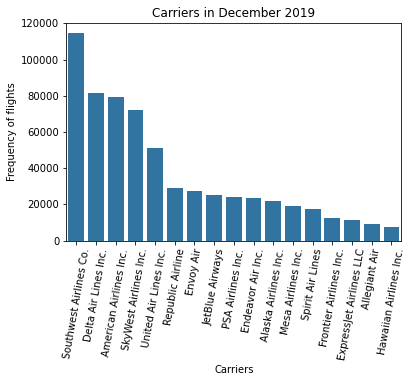

In [44]:
#2019 flights - count the number of occurrences of each type of carrier 
freq_2019 = df_flights_12_2019_new['CARRIER_DESCRIPTION'].value_counts();
gen_order_2019 = freq_2019.index;
sb.countplot(data = df_flights_12_2019_new, x = 'CARRIER_DESCRIPTION', color = default_color, order=gen_order_2019);
plt.xticks(rotation=80);
plt.xlabel('Carriers')
plt.ylabel('Frequency of flights');
plt.title('Carriers in December 2019');

### 1b. Frequency of flights by new in December 2020

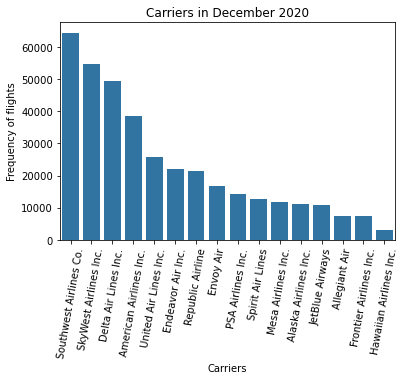

In [45]:
#2020 flights
freq_2020 = df_flights_12_2020_new['CARRIER_DESCRIPTION'].value_counts();
gen_order_2020 = freq_2020.index;
sb.countplot(data = df_flights_12_2020_new, x = 'CARRIER_DESCRIPTION', color = default_color, order=gen_order_2020);
plt.xticks(rotation=80);
plt.xlabel('Carriers');
plt.ylabel('Frequency of flights');
plt.title('Carriers in December 2020');

**Observation:** One key observation from the plots is the major reduction in flights in December 2020 in comparison to 2019, indicating there were less travelers, an obvious effect of the Covid-19 pandemic. 
Also, there was one less carrier in 2020, most probably impacted by the reduction in travelers due to the Covid pandemic. 
The carrier with the most flights in both years was SouthWest Airlines, but the number of flights in 2020 was approximately half the amount in 2019. In 2020, other carriers did not maintain the same place as in 2019. SkyWest Airlines had the next highest frequency of flights in 2020, replacing Delta Airlines and pushing American Airlines from 3rd in 2019 to 4th in 2020. 

**Other features of interest in the data are the performance of the new**

### Distribution of new delay records

**2019 Arrival delays**

Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

##### ****** ----------THIS WILL BE MOVED TO BIVARIATE-  2019--------------------------------------

In [254]:
#Convert ARR_DELAY to integer  ----------THIS WILL BE MOVED TO BIVARIATE
# df_flights_12_2019_new.ARR_DELAY = df_flights_12_2019_new.ARR_DELAY.astype(int)

In [46]:
df_flights_12_2019_new.CARRIER_DESCRIPTION

0         Republic Airline
1         Republic Airline
2         Republic Airline
3         Republic Airline
4         Republic Airline
                ...       
625758       Allegiant Air
625759       Allegiant Air
625760       Allegiant Air
625761       Allegiant Air
625762       Allegiant Air
Name: CARRIER_DESCRIPTION, Length: 625763, dtype: object

In [47]:
df =df_flights_12_2019_new.groupby(df_flights_12_2019_new.CARRIER_DESCRIPTION)['ARR_DELAY'].count()

In [48]:
#Group the new and sum the arrival delays encountered by each carrier
arr_delay_2019 = df_flights_12_2019_new.groupby(df_flights_12_2019_new.CARRIER_DESCRIPTION)['ARR_DELAY'].sum()
arr_delay_2019

CARRIER_DESCRIPTION
Alaska Airlines Inc.       154841.0
Allegiant Air              113516.0
American Airlines Inc.     305632.0
Delta Air Lines Inc.        15921.0
Endeavor Air Inc.           21147.0
Envoy Air                  171719.0
ExpressJet Airlines LLC    164615.0
Frontier Airlines Inc.      69003.0
Hawaiian Airlines Inc.       -385.0
JetBlue Airways            550539.0
Mesa Airlines Inc.         280251.0
PSA Airlines Inc.          254749.0
Republic Airline           179509.0
SkyWest Airlines Inc.      569632.0
Southwest Airlines Co.     510379.0
Spirit Air Lines            62985.0
United Air Lines Inc.      361352.0
Name: ARR_DELAY, dtype: float64

In [49]:
df_arrival_2019 = arr_delay_2019.to_frame()
df_arrival_2019

,ARR_DELAY
CARRIER_DESCRIPTION,
Alaska Airlines Inc.,154841.0
Allegiant Air,113516.0
American Airlines Inc.,305632.0
Delta Air Lines Inc.,15921.0
Endeavor Air Inc.,21147.0
Envoy Air,171719.0
ExpressJet Airlines LLC,164615.0
Frontier Airlines Inc.,69003.0
Hawaiian Airlines Inc.,-385.0


In [50]:

df_flights_12_2020_new['ARR_DELAY'].value_counts()

 0.0       11713
-10.0      11505
-12.0      11505
-11.0      11451
-9.0       11297
           ...  
 643.0         1
 337.0         1
 1018.0        1
 1551.0        1
 720.0         1
Name: ARR_DELAY, Length: 849, dtype: int64

**The following section investigates the distributions of arrival delays in December 2019 and in December 2020, separately. This involves looking at the arrival delays affecting each flight and the number of occurrences of each delay, then plotting a bar chart which shows the distribution.**

### 2a. Distribution of <u>arrival delays</u> in December 2019 <a id='arrdelay'></a>

In [51]:
#convert data type of arrival delay column from float to integer
df_flights_12_2019_new.ARR_DELAY = df_flights_12_2019_new.ARR_DELAY.astype(int)

**The following counts the number of occurrences of each arrival delay incurred in December 2019 

In [52]:
#Count the number of occurrences of each arrival delay
df_flights_12_2019_new.ARR_DELAY.value_counts()

 0       18682
-11      16630
-10      16616
-12      16602
-13      16426
         ...  
 947         1
 683         1
-77          1
 1458        1
 511         1
Name: ARR_DELAY, Length: 1112, dtype: int64

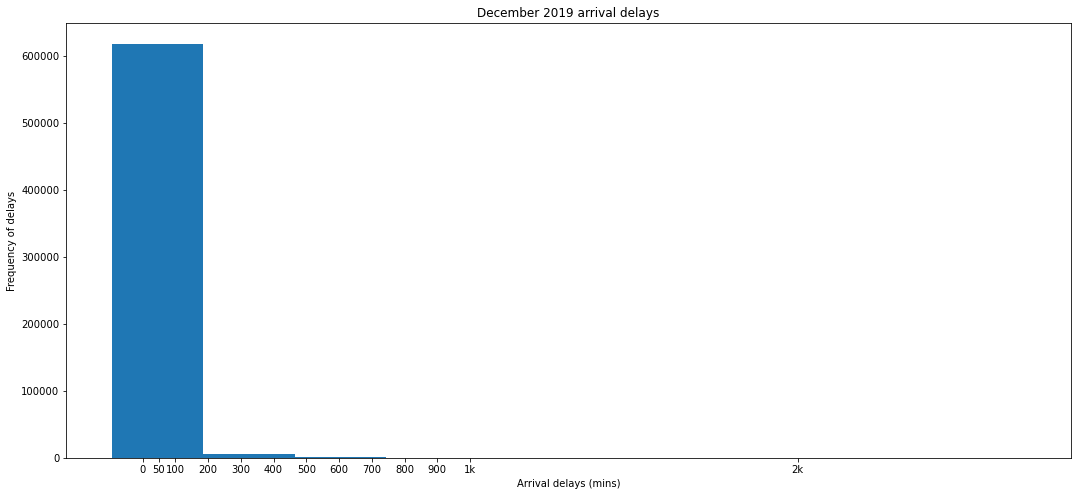

In [54]:
# start with a standard-scaled plot
df_flights_12_2019_new.ARR_DELAY = df_flights_12_2019_new.ARR_DELAY.astype(int);
# binsize = 50
#Bin resizing  
# bins = np.arange(0, df_flights_12_2019_new['ARR_DELAY'].max()+binsize, binsize);
plt.figure(figsize=[18, 8]);
plt.hist(data = df_flights_12_2019_new, x = 'ARR_DELAY');
plt.xticks([0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1e3, 2e3], [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, '1k', '2k'])
plt.xlabel('Arrival delays (mins)')
plt.ylabel('Frequency of delays')
plt.title('December 2019 arrival delays');
plt.show();

**The plot above shows the highest frequency of arrival delays were approximatly under 200 minutes long, but does not give a good visualization of the frequency of time periods less than 200. To get a better perspective of the length of time intervals smaller than 200 minutes I have taken a further step to replot with bins to see if we can get a better distribution of the data.

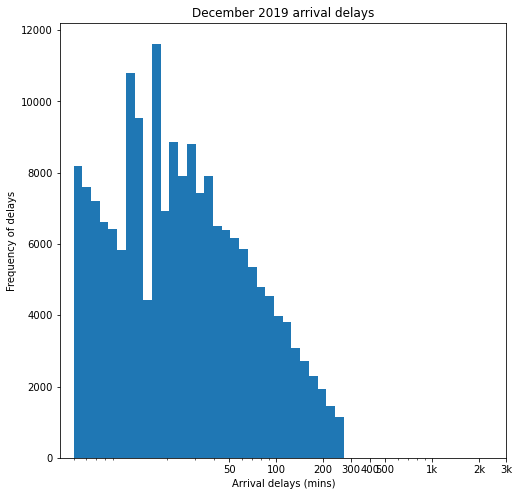

In [55]:
log_binsize = 0.08
bins = 5 ** np.arange(1, np.log10(df_flights_12_2019_new['ARR_DELAY'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 8])
plt.hist(data = df_flights_12_2019_new, x = 'ARR_DELAY', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 200, 300, 400, 500, 1e3, 2e3, 3e3], [50, 100, 200, 300, 400, 500, '1k', '2k', '3k'])

plt.xlabel('Arrival delays (mins)')
plt.ylabel('Frequency of delays')
plt.title('December 2019 arrival delays');
plt.show()

By using bin edges and setting using numpy's arange function with a fairly low number, we can get a better visual display of the data's distribution. The plot almost takes a bimodal shape where it's first peak is just under 12000 and the second peak just over 12000, then drops and rises before it drops and skews off to the right.

### 2b. Distribution of <u>arrival delays</u> in December 2020

In [264]:
# #2020 new in December 2019 arrival delays
# df_flights_12_2020_new.ARR_DELAY = df_flights_12_2020_new.ARR_DELAY.astype(int)
# delay_2020 = df_flights_12_2020_new['ARR_DELAY'].value_counts()
# # gen_delay_2019 = delay_2019.index
# sb.countplot(data = df_flights_12_2020_new, x = 'ARR_DELAY', color = default_color)
# plt.xticks(rotation=80)
# plt.xlabel('Arrival delays across')
# plt.title('Carriers delays in December 2020')

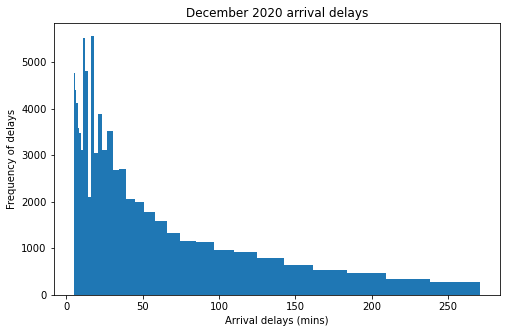

In [56]:
# start with a standard-scaled plot
df_flights_12_2020_new.ARR_DELAY = df_flights_12_2020_new.ARR_DELAY.astype(int)
# binsize = 500
# bins = np.arange(0, df_flights_12_2020_new['ARR_DELAY'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_flights_12_2020_new, x = 'ARR_DELAY', bins = bins)

plt.xlabel('Arrival delays (mins)')
plt.ylabel('Frequency of delays')
plt.title('December 2020 arrival delays');
plt.show()

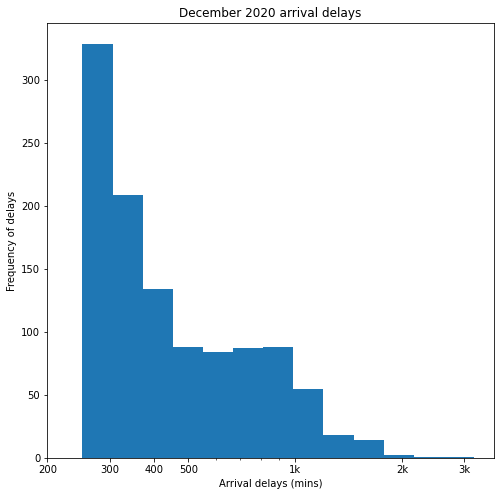

In [57]:
log_binsize = 0.085
bins = 10 ** np.arange(2.4, np.log10(df_flights_12_2020_new['ARR_DELAY'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = df_flights_12_2020_new, x = 'ARR_DELAY', bins = bins)
plt.xscale('log')
plt.xticks([200, 300, 400, 500, 1e3, 2e3, 3e3], [200, 300, 400, 500, '1k', '2k', '3k'])

plt.xlabel('Arrival delays (mins)')
plt.ylabel('Frequency of delays')
plt.title('December 2020 arrival delays');
plt.show()

The arrival delays have a long tail distribution. This warrants further plotting - on a log-scale.

Based on the above plot, the highest frequency of delays across the US domestic routes in December 2020 was between 275 and 300 minutes, and decreased, as the plot skews off to the right, indicating long delays that were less frequent. Interestingly, there were a small number of times when delays exceeded 3000 mins or 50 hours, and this may reflect the changes that were implemented as a result of the impact the Covid pandemic had on the travel industry as a whole. 

The plot for December 2020 is closely inline with 2019's in terms of the shape and the longest delay across the new is very much the same - 275 to 300 minutes, although there were less flights in 2020. Just like 2019, there was a very small number of times when the delays extended to 50 hours.

**Steps 3a and 3b investigate the distribution of the departure delays in December 2019 and 2020, respectively.**

### 3a. Distribution of <u>departure delays</u> in December 2019 <a id='depdelay'></a>

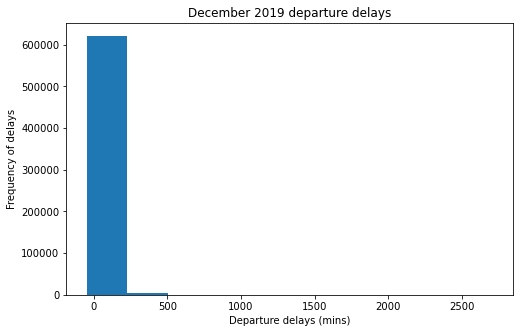

In [63]:
# start with a standard-scaled plot
df_flights_12_2019_new.DEP_DELAY = df_flights_12_2019_new.DEP_DELAY.astype(int)
# binsize = 500
# bins = np.arange(0, df_flights_12_2019_new['DEP_DELAY'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_flights_12_2019_new, x = 'DEP_DELAY')

plt.xlabel('Departure delays (mins)')
plt.ylabel('Frequency of delays')
plt.title('December 2019 departure delays');
plt.show()

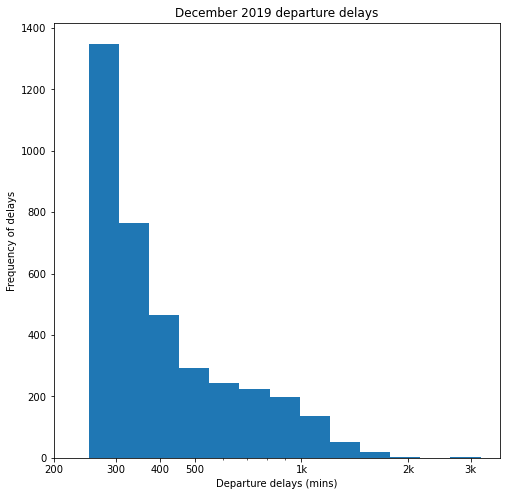

In [62]:
log_binsize = 0.085
bins = 10 ** np.arange(2.4, np.log10(df_flights_12_2019_new['DEP_DELAY'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = df_flights_12_2019_new, x = 'DEP_DELAY', bins = bins)
plt.xscale('log')
plt.xticks([200, 300, 400, 500, 1e3, 2e3, 3e3], [200, 300, 400, 500, '1k', '2k', '3k'])
plt.xlabel('Departure delays (mins)')
plt.ylabel('Frequency of delays')
plt.title('December 2019 departure delays');
plt.show()

Just like the plots for arrival delays, a second plot was done to get a better insight into the distribution of the data, by adding bins as well as log scale to above departure delays have a long tail distribution. So I applied logarthmic transform and bins to make the plot more interpretable. 

Based on the above plot, the highest frequency of delays across the new along US domestic routes in December 2019 was between 275 and 300 minutes, and interestingly there were a small number of times when delays exceeded 3000 mins or 50 hours.

The plot for December 2020 is closely inline with 2019's in terms of the shape and the longest delay across the new is very much the same - 275 to 300 minutes, although there were less flights in 2020. Just like 2019, there was a very small number of times when the delays extended to 50 hours.

**The following investigates the distribution of the departure delays for December 2020

### 3b. Distribution of <u>departure delays</u> in December 2020

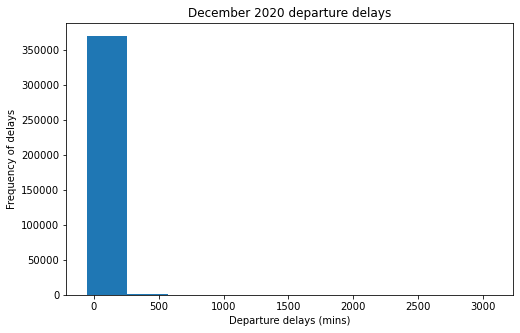

In [64]:
# start with a standard-scaled plot
df_flights_12_2020_new.DEP_DELAY = df_flights_12_2020_new.DEP_DELAY.astype(int)
# binsize = 500
# bins = np.arange(-1000, df_flights_12_2020_new['DEP_DELAY'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_flights_12_2020_new, x = 'DEP_DELAY')
plt.xlabel('Departure delays (mins)')
plt.ylabel('Frequency of delays')
plt.title('December 2020 departure delays');

plt.show()

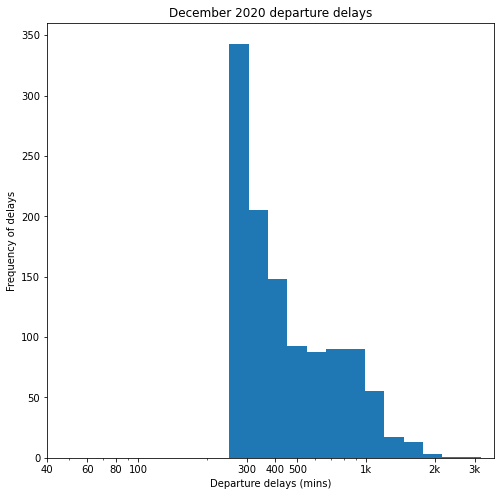

In [65]:
#Define a binsize to add to the end of the upper limit returned by arange function below
log_binsize = 0.085
bins = 10 ** np.arange(2.4, np.log10(df_flights_12_2020_new['DEP_DELAY'].max())+log_binsize, log_binsize)
# bins = np.arange(2.4, np.log10(df_flights_12_2020_new['DEP_DELAY'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 8])
plt.hist(data = df_flights_12_2020_new, x = 'DEP_DELAY', bins = bins)
plt.xscale('log')
plt.xticks([40, 60, 80, 100, 300, 400, 500, 1e3, 2e3, 3e3], [40, 60, 80, 100, 300, 400, 500, '1k', '2k', '3k'])
plt.xlabel('Departure delays (mins)')
plt.ylabel('Frequency of delays')
plt.title('December 2020 departure delays');
plt.show()

The second departure delays plot skewes to the right with a tail. 

Based on the above plot, the highest frequency of delays across US domestic routes in December 2019 was between 275 and 300 minutes, and interestingly there were a small number of times when delays exceeded 3000 mins or 50 hours.

The plot for December 2020 is closely inline with 2019's in terms of the shape and the longest delay across the new is very much the same - 275 to 300 minutes, although there were less flights in 2020. Just like 2019, there was a very small number of times when the delays extended to 50 hours.

**Steps 4a and 4b investigate the distribution of weather delays in December 2019 and 2020, respectively. It gives a visualization of the length of delays and their frequency.**

### 4a. Distribution of <u>weather related delays</u> affecting flights in December 2019  <a id='weatherdel'></a>

In [66]:
#Check the frequency of delays to confirm weather there are zero delays
df_flights_12_2019_new['WEATHER_DELAY'].value_counts()

0.0       619643
2.0          196
7.0          195
1.0          192
3.0          186
           ...  
529.0          1
614.0          1
292.0          1
1083.0         1
721.0          1
Name: WEATHER_DELAY, Length: 476, dtype: int64

**The counts above show that there are instances when weather delays were zero, which indicates no weather delay**

In [67]:
df_flights_12_2019_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625763 entries, 0 to 625762
Data columns (total 87 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0                            625763 non-null  int64  
 1   QUARTER                  625763 non-null  int64  
 2   MONTH                    625763 non-null  int64  
 3   DAY_OF_MONTH             625763 non-null  int64  
 4   DAY_OF_WEEK              625763 non-null  int64  
 5   FL_DATE                  625763 non-null  object 
 6   OP_UNIQUE_CARRIER        625763 non-null  object 
 7   OP_CARRIER_AIRLINE_ID    625763 non-null  int64  
 8   OP_CARRIER               625763 non-null  object 
 9   TAIL_NUM                 625763 non-null  object 
 10  OP_CARRIER_FL_NUM        625763 non-null  int64  
 11  ORIGIN_AIRPORT_ID        625763 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID    625763 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID    625763 non-null  int64  
 14  ORIG

#### Since there are many categories of weather delay minutes, only a portion of them will be sampled and plotted to show the distribution. 

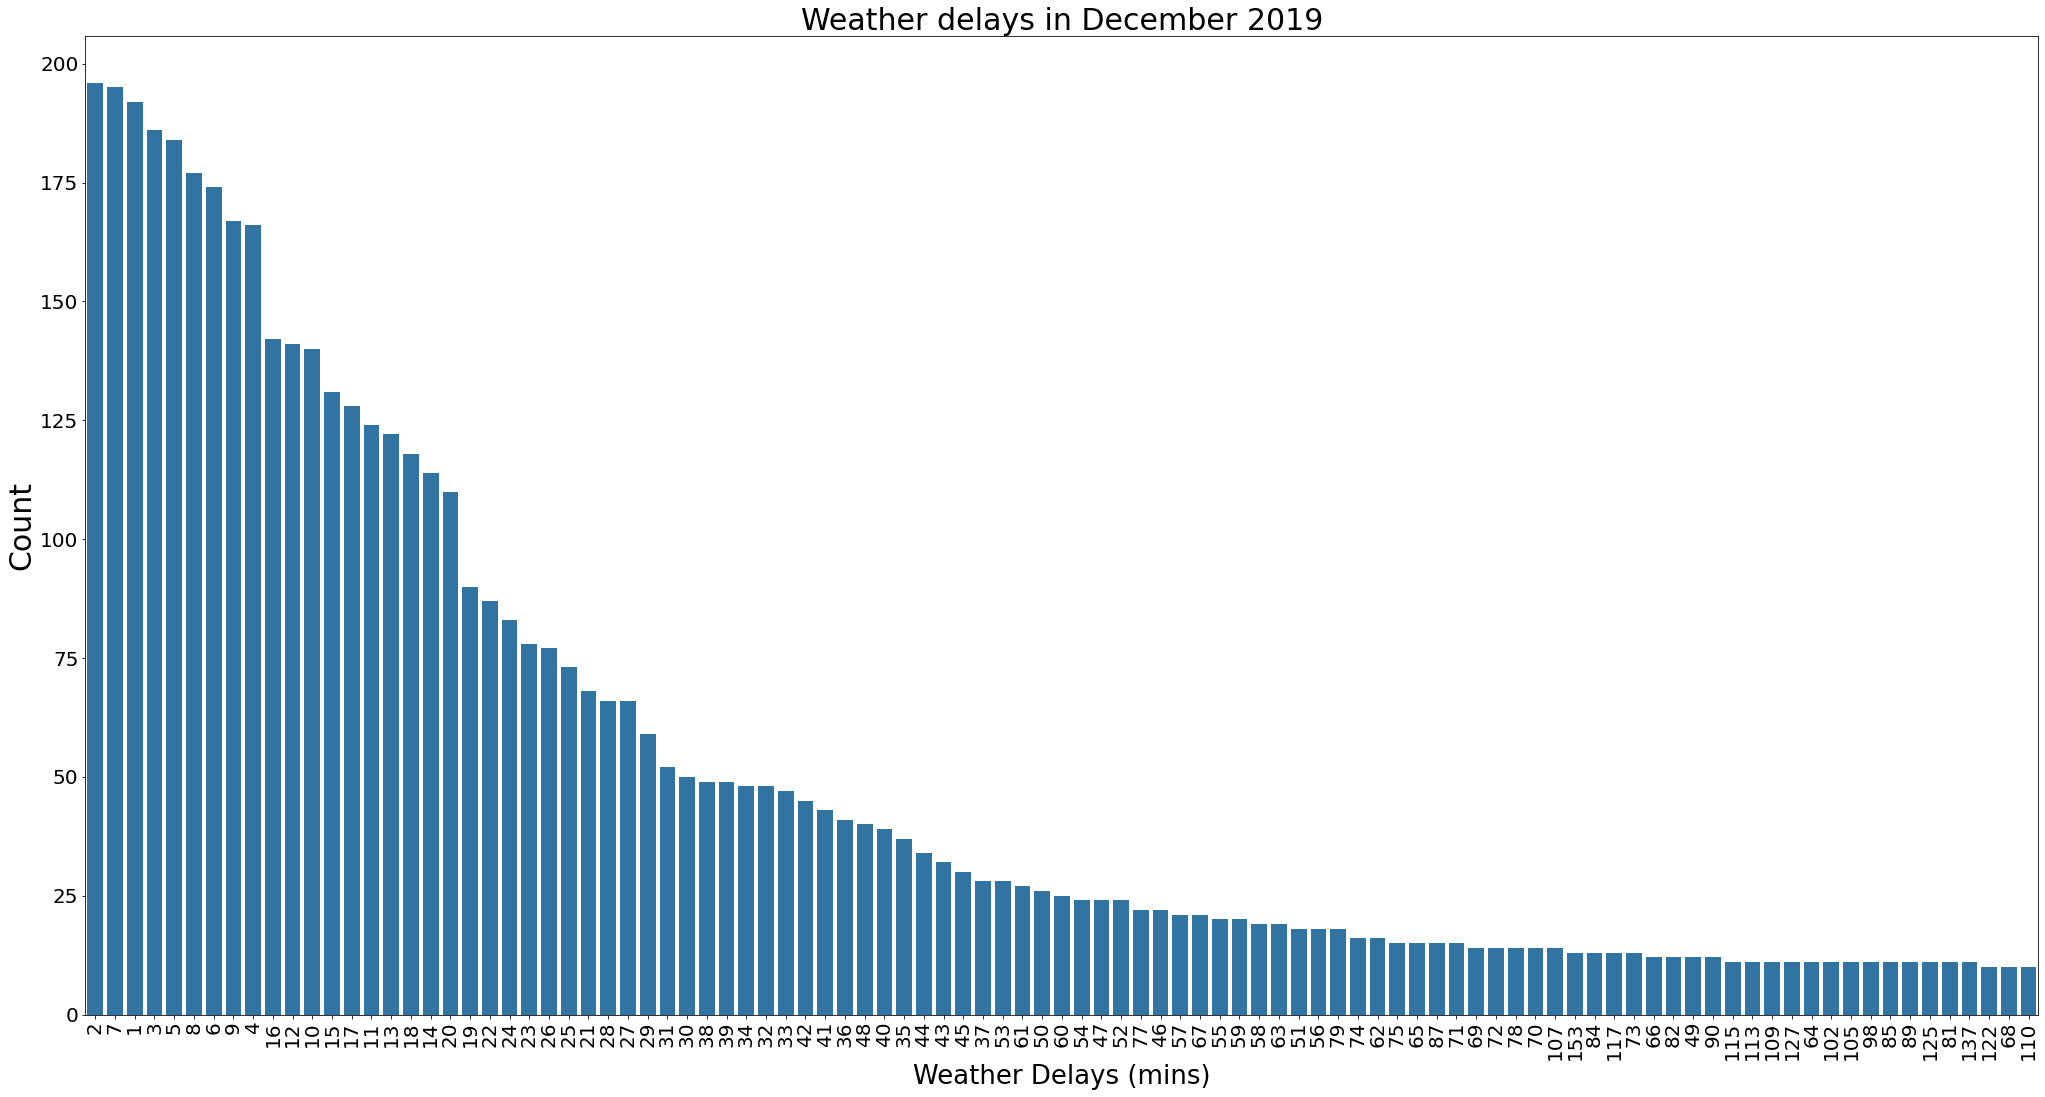

In [68]:
#2019 flights
#Convert datatype of WEATHER_DELAY from float to integer
df_flights_12_2019_new.WEATHER_DELAY = df_flights_12_2019_new.WEATHER_DELAY.astype(int);
weather_2019 = df_flights_12_2019_new['WEATHER_DELAY'].value_counts().sort_values( ascending=False);
#Skip the zero minute weather delay as this indicates no delay. Start at index 1  
plt.figure(figsize=[35, 18]);
plt.xlabel('WEATHER_DELAY', fontsize=26);
#Only use the data starting from index 1, because it's from here the weather delays are over zero.
#Since there is a vast range of data, we will use the first 100, to have better visualization - a less crowded plot
weather_order_2019 = weather_2019.index[1: 100];
sb.countplot(data = df_flights_12_2019_new, x = 'WEATHER_DELAY', color = default_color, order=weather_order_2019);
plt.xticks(rotation=90);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.ylabel('Count', fontsize=30);
plt.xlabel('Weather Delays (mins)', fontsize=26);
plt.title('Weather delays in December 2019', fontsize=30);

#### The weather delay plot above is schewed to the right, with a long tail. It shows that the majority of weather related delays were reasonably small, with the most frequent delay being two minutes long, and the longer weather delays less frequent. 

### 4b. Distribution of <u>weather related delays</u> affecting flights in December 2020

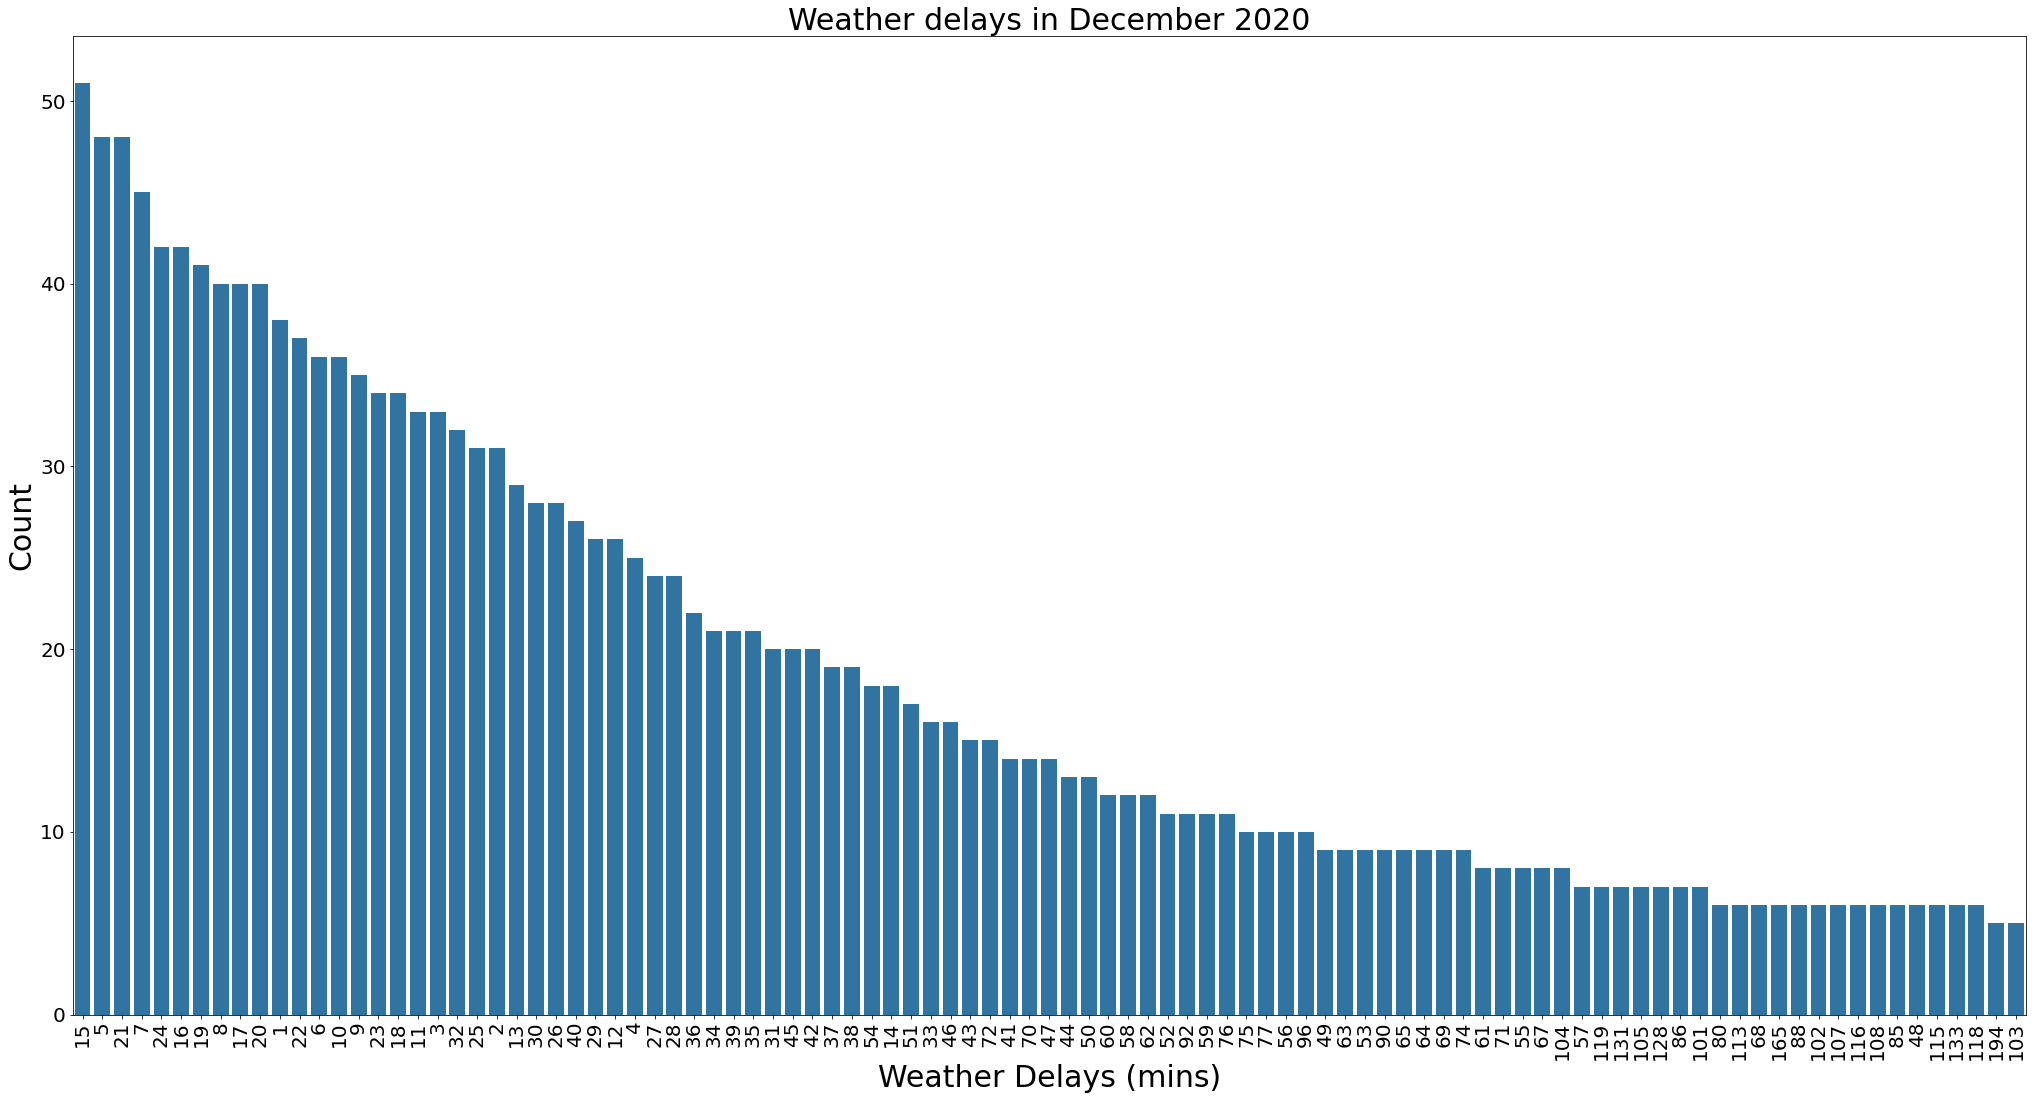

In [69]:
#2020 flights
df_flights_12_2020_new.WEATHER_DELAY = df_flights_12_2020_new.WEATHER_DELAY.astype(int);
weather_2020 = df_flights_12_2020_new['WEATHER_DELAY'].value_counts().sort_values( ascending=False);
plt.figure(figsize=[35, 18]);
#Skip the zero minute weather delay as this indicates no delay. Start at index 1 

weather_order_2020 = weather_2020.index[1: 100];
sb.countplot(data = df_flights_12_2020_new, x = 'WEATHER_DELAY', color = default_color, order=weather_order_2020);
plt.xticks(rotation=90);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.xlabel('Weather Delays (mins)', fontsize=30);
plt.ylabel('Count', fontsize=30);
plt.title('Weather delays in December 2020', fontsize=30);

**Observation:** The plot above shows the highest frequency in weather delays were reasonably small (15 minutes). It gradually schews to the right, with many instances of longer delays which were less frequent. When compared to December 2019, the most frequent delays were larger in December 2020. Alternatively, there are quite a few of weather delays datapoints, which if combined will exceed the maximum frequency identified for the 15 minute delay datapoint. Delays over one hour were less frequent.

#### Plotting with log scale to get a better insight into the distribution

In [70]:
weather_delay_sample = df_flights_12_2020_new[df_flights_12_2020_new.WEATHER_DELAY > 0].sort_values(by='WEATHER_DELAY', ascending=False)

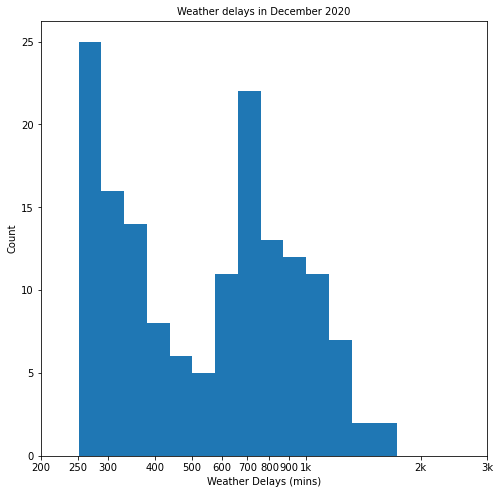

In [73]:
log_binsize = 0.06
bins = 10 ** np.arange(2.4, np.log10(weather_delay_sample['WEATHER_DELAY'].max())+log_binsize, log_binsize);

plt.figure(figsize=[8, 8]);
plt.hist(data = weather_delay_sample, x = 'WEATHER_DELAY', bins = bins);
plt.xscale('log');
plt.xticks([200, 250, 300, 400, 500, 600, 700, 800, 900, 1e3, 2e3, 3e3], [200, 250, 300, 400, 500, 600, 700, 800, 900,'1k', '2k', '3k'])

plt.xlabel('Weather Delays (mins)', fontsize=10);
plt.ylabel('Count', fontsize=10);
plt.title('Weather delays in December 2020', fontsize=10);
plt.show();

**Observation for weather delays:** The above plot uses log scale to get a better insight into the distribution of the length of weather delays. It is more bimodal in shape, with a peak in frequency of delays between 250 minutes and 300 minutes and another peak ranging from just over 700 and 800 minutes, and the larger delays becoming less frequent. The extremely long delays can be considered outliers as there were not frequent - further investigation might be needed to see if there were due to extreme weather conditions.

**Steps 5a and 5b investigate the distribution of security delays in December 2019 and 2020, respectively. It gives a visualization of the length of delays and their frequency.**

### 5a. Distribution of <u>security related delays</u> affecting fights in December 2019 <a id='secdel'></a>

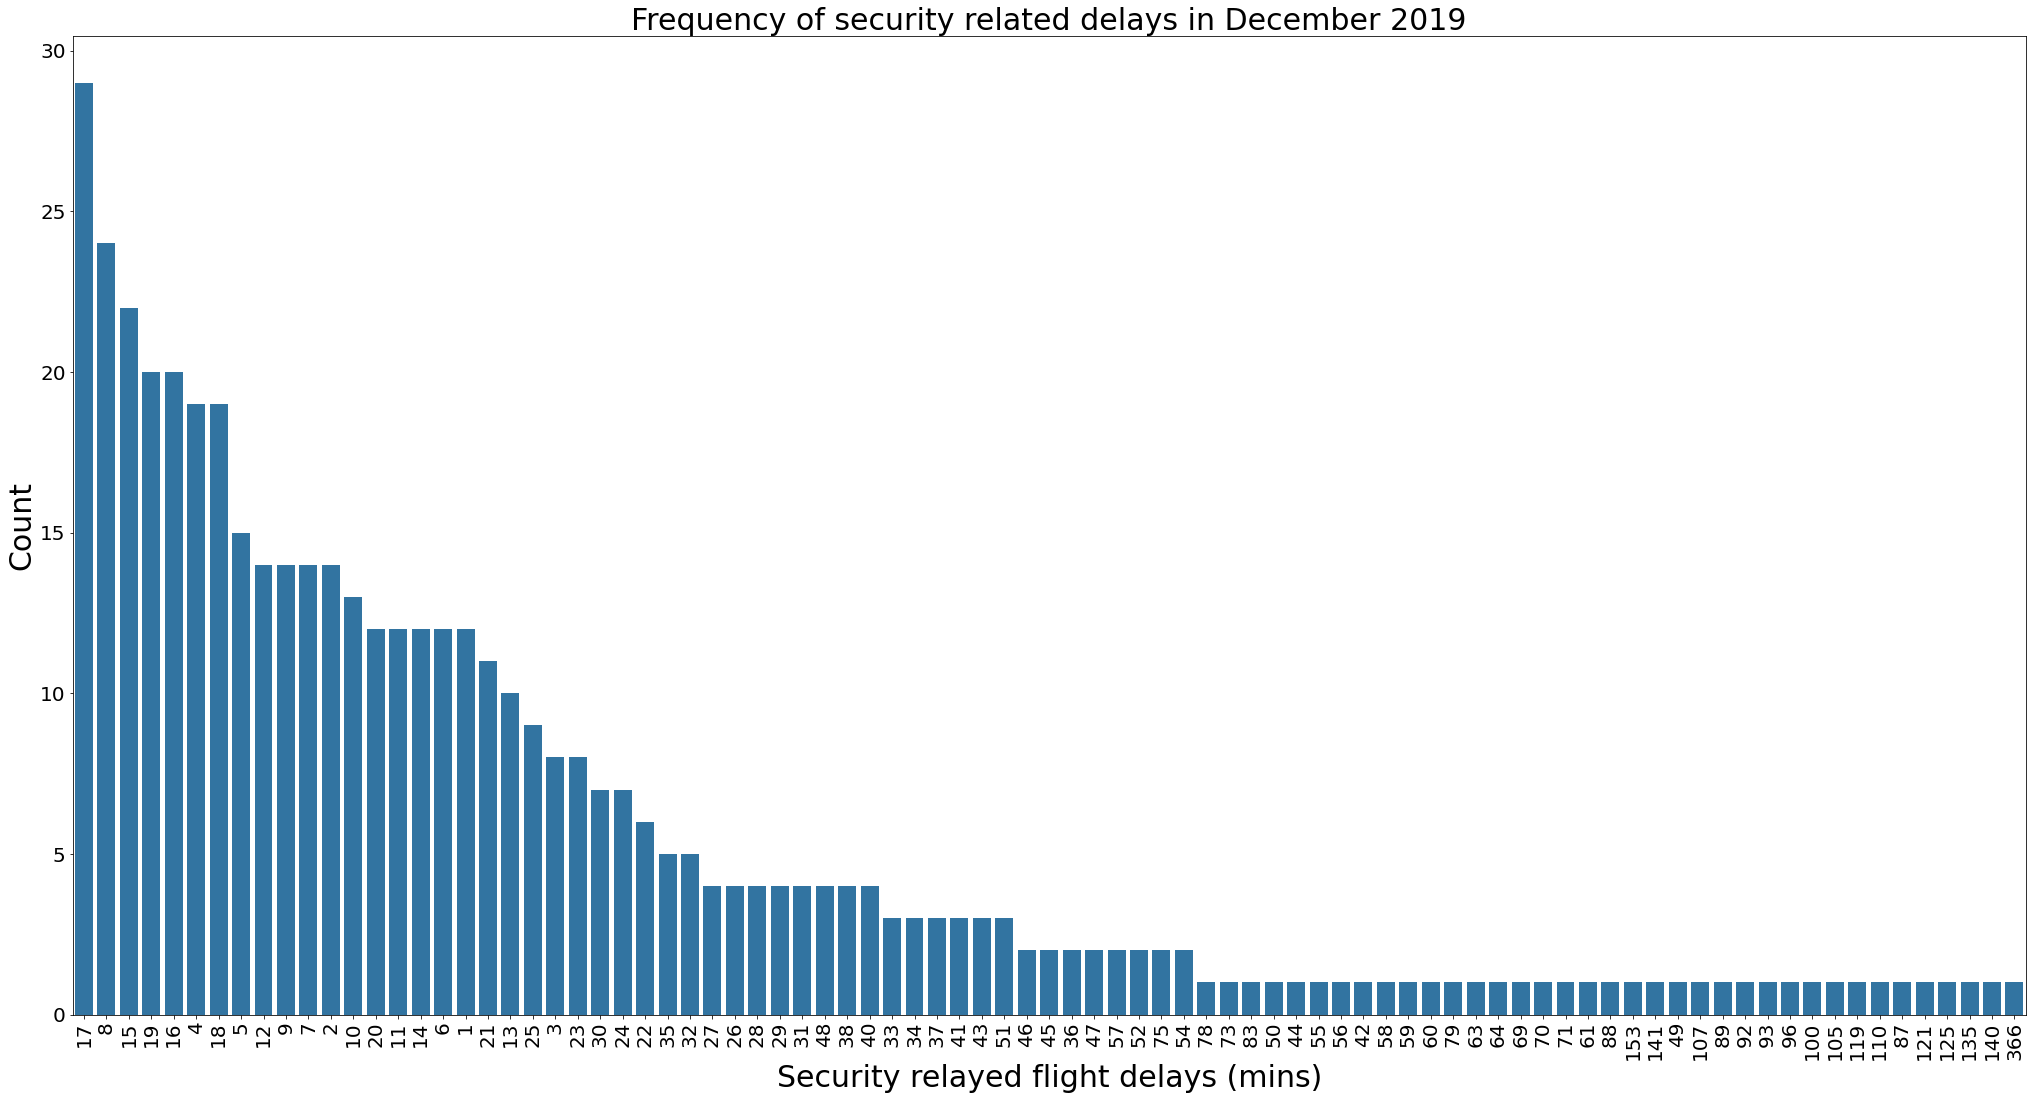

In [74]:
#2020 flights
df_flights_12_2019_new.SECURITY_DELAY = df_flights_12_2019_new.SECURITY_DELAY.astype(int);
security_2019 = df_flights_12_2019_new['SECURITY_DELAY'].value_counts().sort_values( ascending=False);
#Skip the zero minute security delay as this indicates no delay. Start at index 1 
plt.figure(figsize=[35, 18]);
security_order_2019 = security_2019.index[1: 100];
sb.countplot(data = df_flights_12_2019_new, x = 'SECURITY_DELAY', color = default_color, order=security_order_2019);
plt.xticks(rotation=90);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.xlabel('Security relayed flight delays (mins)', fontsize=30);
plt.ylabel('Count', fontsize=30);
plt.title('Frequency of security related delays in December 2019', fontsize=30);

**Observation:** The security delays plot above shows a long tail schewing to the right, where the highest frequency in security delays were reasonably small in minutes (17 minutes). Additionally, a large percentage of the security related delays appeared to be under 1 hour, mainly ranging between 30 and 60 minutes. Delays over one hour were less frequent.

#### Plotting with log scale to get a better insight into the distribution

In [75]:
df_flights_12_2019_new['SECURITY_DELAY'].value_counts().sort_values(ascending=True)

366         1
141         1
135         1
125         1
121         1
        ...  
19         20
15         22
8          24
17         29
0      625287
Name: SECURITY_DELAY, Length: 88, dtype: int64

In [77]:
security_delay_sample_2019 = df_flights_12_2019_new[df_flights_12_2019_new.SECURITY_DELAY > 0].sort_values(by='SECURITY_DELAY', ascending=False)

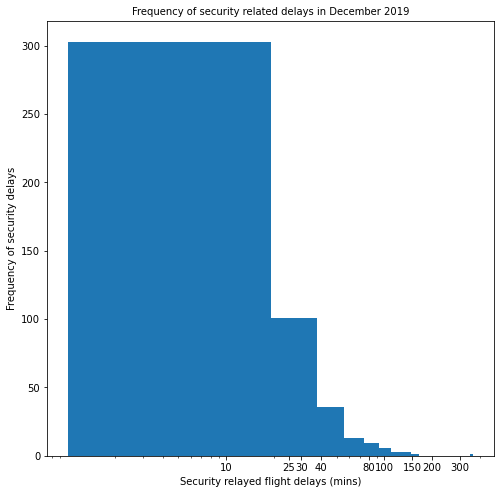

In [79]:
log_binsize = 0.5;
bins = 10 ** np.arange(2.4, np.log10(security_delay_sample_2019['SECURITY_DELAY'].max())+log_binsize, log_binsize);
plt.figure(figsize=[8, 8]);
plt.hist(data = security_delay_sample_2019, x = 'SECURITY_DELAY', bins = 20);
plt.xscale('log');
plt.xticks([10, 25, 30, 40, 80, 100, 150, 200, 300], [10, 25, 30, 40, 80, 100, 150, 200, 300])

plt.xlabel('Security relayed flight delays (mins)', fontsize=10);
plt.ylabel('Frequency of security delays', fontsize=10);
plt.title('Frequency of security related delays in December 2019', fontsize=10);
plt.show()

**Observation:** The above plot uses log scale to get a better insight into the distribution of the length of domestic delays due to security in December 2019. Again it skews to the right and ending with a tail. It showed that the majority of security related incidents resulted in most delays lasting from 1 to 20 minutes, and the larger delays becoming less frequent, with the highest delay time being around 100 to 150 minutes and one incident around 300 plus minutes, which might be considered an outlier because it only occurred once. Further investigation might be needed to see if there were due to extreme security conditions 

### 5b. Distribution of security related delays affecting fights in December 2020

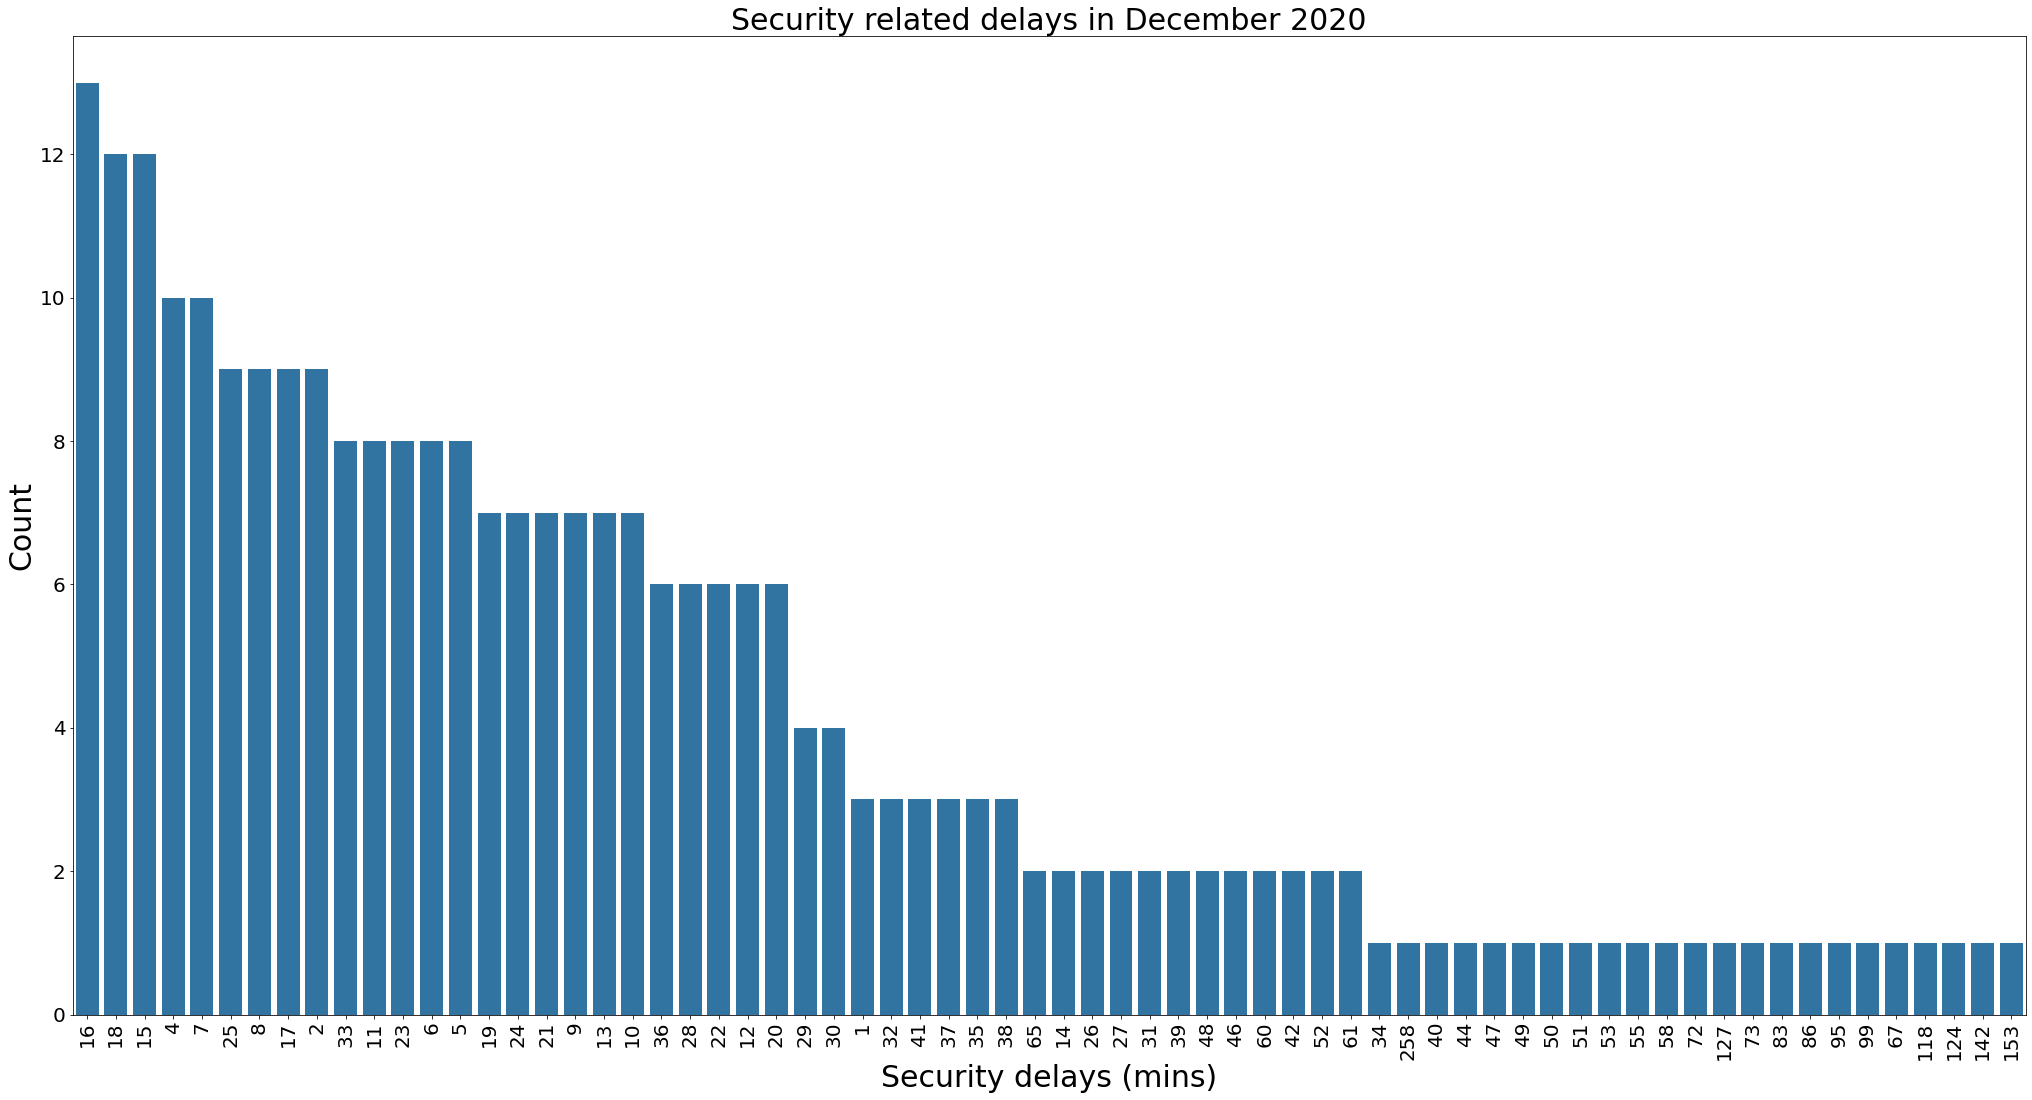

In [82]:
#2020 flights
df_flights_12_2020_new.SECURITY_DELAY = df_flights_12_2020_new.SECURITY_DELAY.astype(int);
security_2020 = df_flights_12_2020_new['SECURITY_DELAY'].value_counts().sort_values( ascending=False);
#Skip the zero minute security delay as this indicates no delay. Start at index 1 
plt.figure(figsize=[35, 18]);
security_order_2020 = security_2020.index[1: 100];
sb.countplot(data = df_flights_12_2020_new, x = 'SECURITY_DELAY', color = default_color, order=security_order_2020);
plt.xticks(rotation=90);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.xlabel('Security delays (mins)', fontsize=30);
plt.ylabel('Count', fontsize=30);
plt.title('Security related delays in December 2020', fontsize=30);

**Observation:**  The security delays plot for December 2020 has a step like look which skews right with a long tail schewing to the right. The highest frequency in security delays were reasonably small and just one minute below 2019 (17 minutes). A large percentage of the security related delays appeared to be under 1 hour, mainly ranging between 30 and 60 minutes. Delays over one hour were less frequent.

#### Plotting with log scale to get a better insight into the distribution

In [83]:
security_delay_sample_2020 = df_flights_12_2020_new[df_flights_12_2020_new.SECURITY_DELAY > 0].sort_values(by='SECURITY_DELAY', ascending=False)

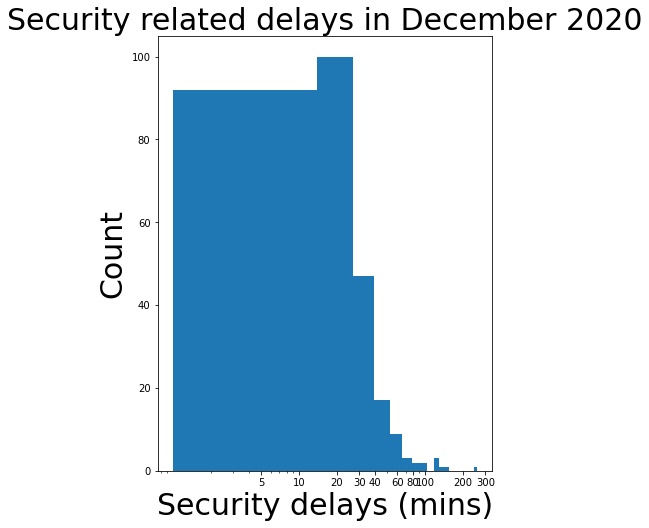

In [84]:
log_binsize = 0.25
bins = 10 ** np.arange(2.4, np.log10(security_delay_sample_2020['SECURITY_DELAY'].max())+log_binsize, log_binsize);
plt.figure(figsize=[6, 8]);
plt.hist(data = security_delay_sample_2020, x = 'SECURITY_DELAY', bins = 20);
plt.xscale('log');
# plt.xticks([200, 250, 300, 400, 500, 600, 700, 800, 900, 1e3, 2e3, 3e3], [200, 250, 300, 400, 500, 600, 700, 800, 900,'1k', '2k', '3k'])
plt.xticks([5, 10, 20, 30, 40, 60, 80, 100, 200, 300], [5, 10, 20, 30, 40, 60, 80, 100, 200, 300])
plt.xlabel('Security delays (mins)', fontsize=30);
plt.ylabel('Count', fontsize=30);
plt.title('Security related delays in December 2020', fontsize=30);
plt.show();

**Observation:** The above plot uses log scale to get a better insight into the distribution of the length of security delays. It skews to the right, with a peak (highest) number of security delays being between 15 and 20 minutes, with most of the security delays occuring between 1 and 15 minutes. There were instances of longer delays, but there were less frequent. 

**Steps 6a and 6b investigate the distribution of carrier related delays in December 2019 and 2020, respectively. It gives a visualization of the length of delays and their frequency.**

### 6. Distribution of <u>carrier related delays<u/> affecting flights in December 2019/2020 <a id='cardel'></a>

This explores the overall carrier delays in minutes and the frequency of the delays, and gives a visualization of the distribution of delays for December 2019 and 2020. The plot will order the carrier delays from the most frequent time to the least carrier delay time range. 

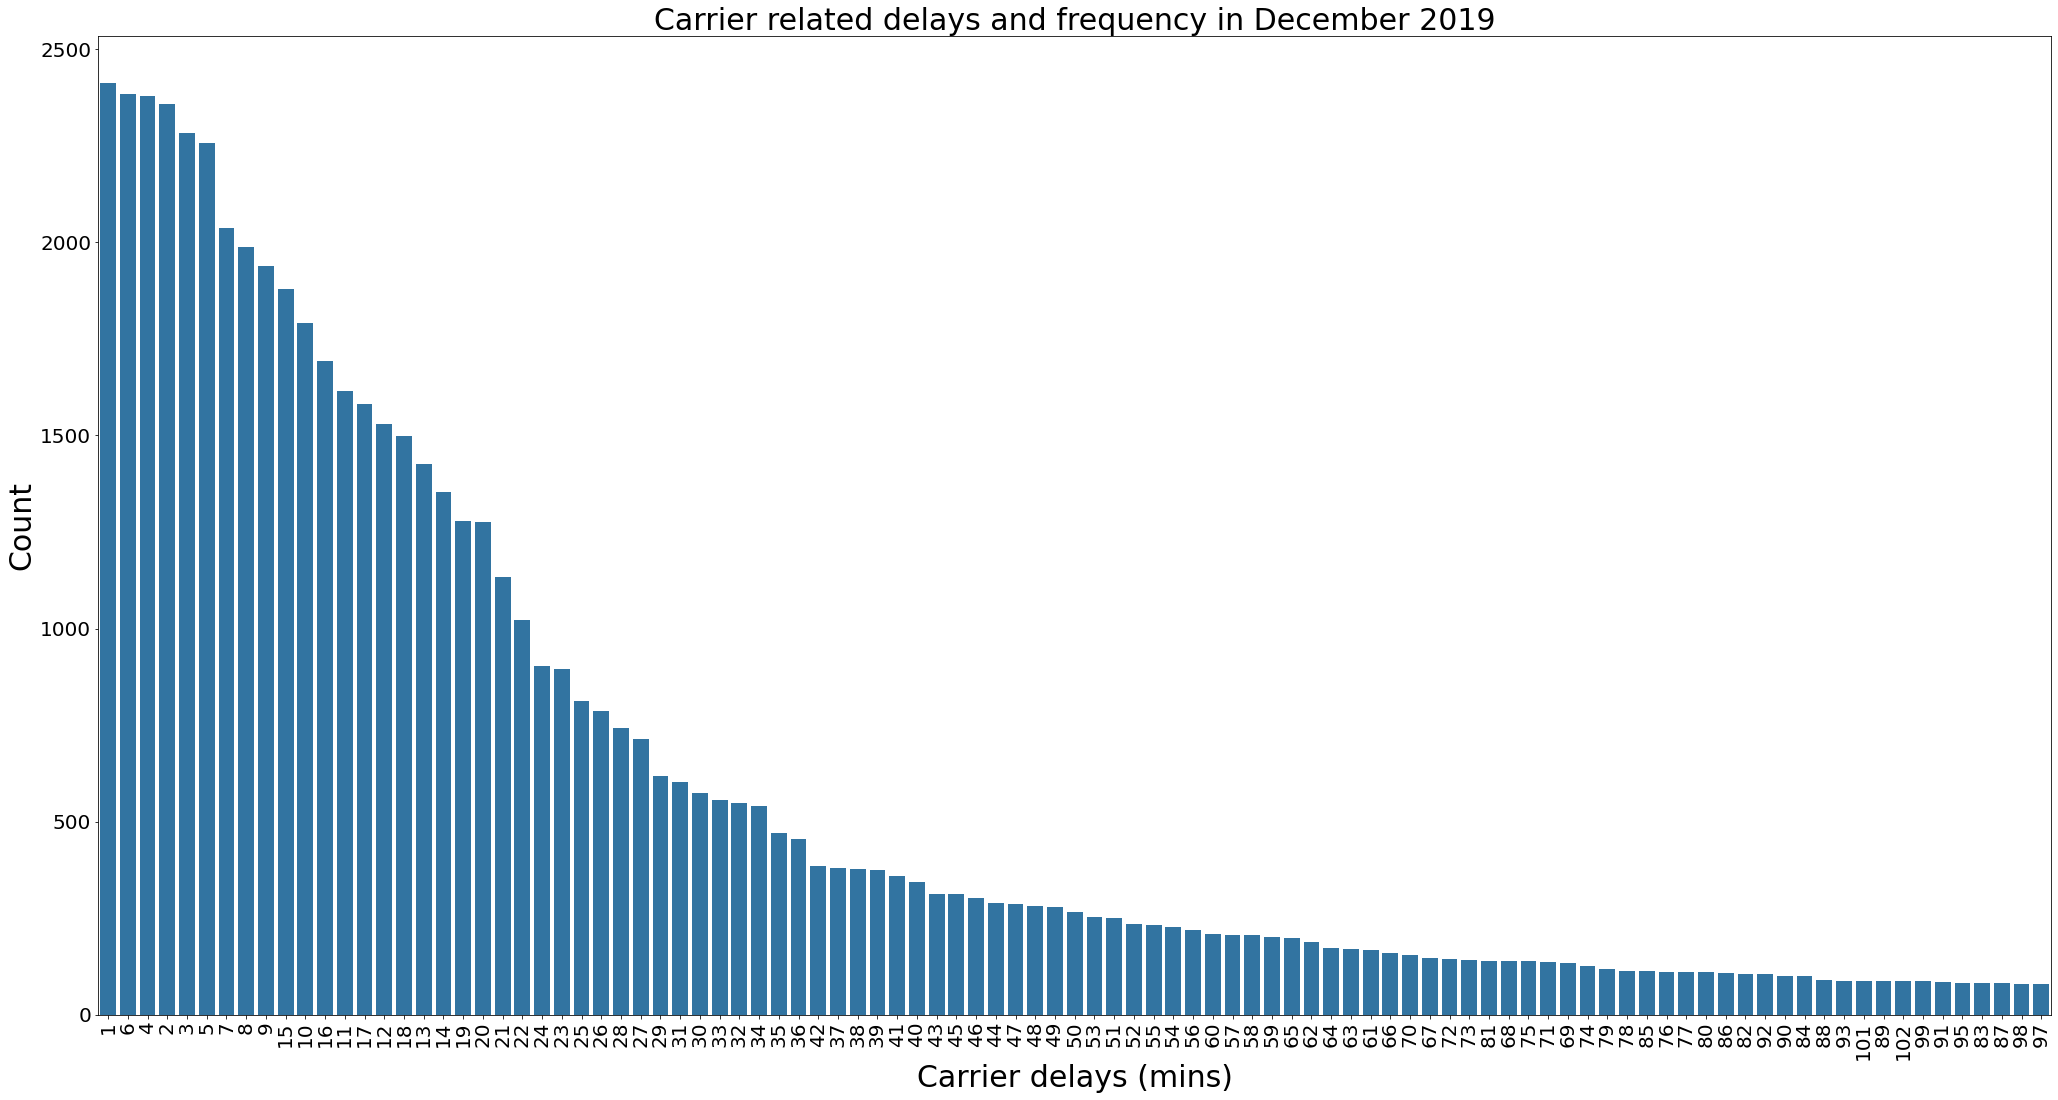

In [198]:
#2020 flights
#Convert data type from float to integer
df_flights_12_2019_new.CARRIER_DELAY = df_flights_12_2019_new.CARRIER_DELAY.astype(int);
security_2019 = df_flights_12_2019_new['CARRIER_DELAY'].value_counts().sort_values( ascending=False);
plt.figure(figsize=[35, 18]);
#Skip the zero minute carrier delay as this indicates no delay. Start at index 1  
security_order_2019 = security_2019.index[1: 100];
sb.countplot(data = df_flights_12_2019_new, x = 'CARRIER_DELAY', color = default_color, order=security_order_2019);
plt.xticks(rotation=90);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.xlabel('Carrier delays (mins)', fontsize=30);
plt.ylabel('Count', fontsize=30);
plt.title('Carrier related delays and frequency in December 2019', fontsize=30);

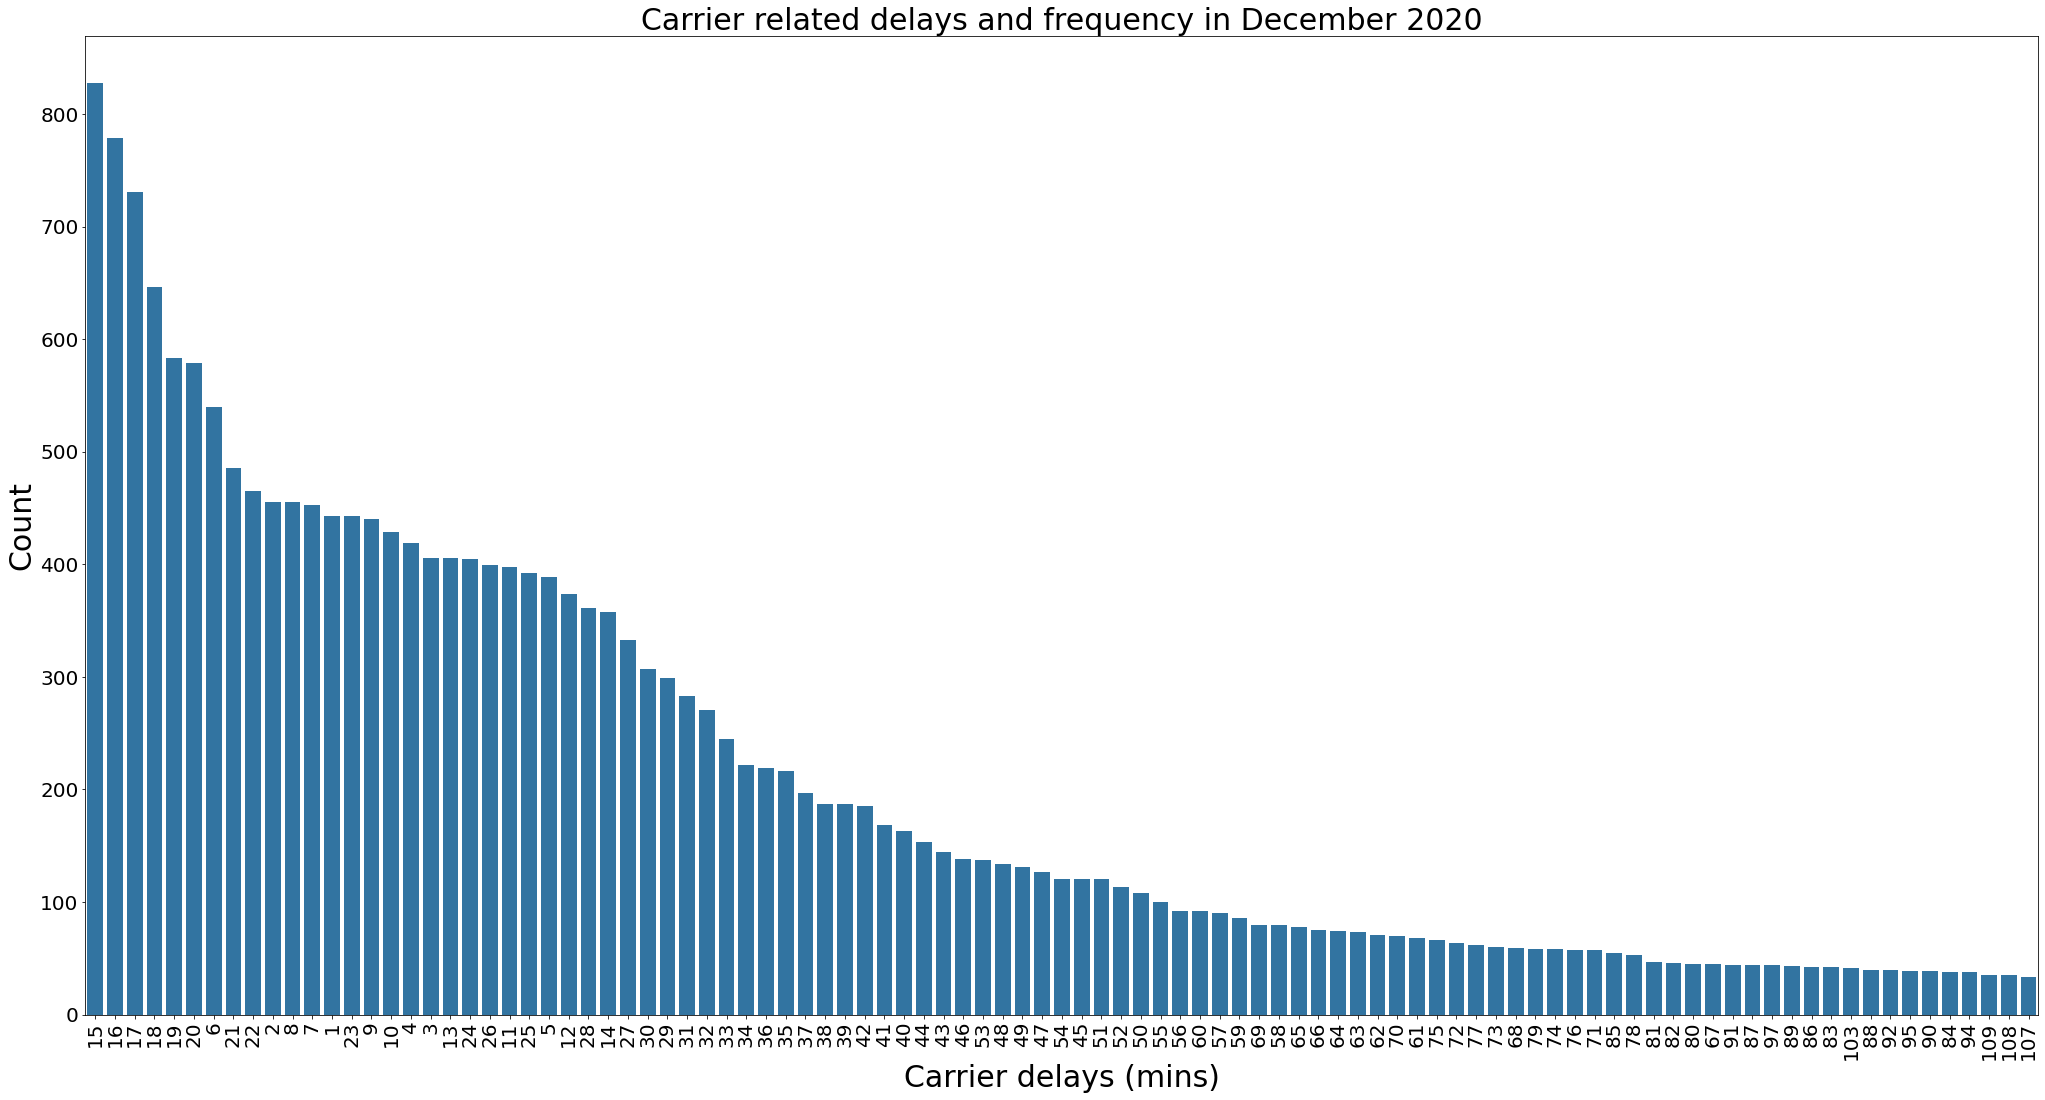

In [199]:
#2020 flights
#Convert data type from float to integer
df_flights_12_2020_new.CARRIER_DELAY = df_flights_12_2020_new.CARRIER_DELAY.astype(int);
security_2020 = df_flights_12_2020_new['CARRIER_DELAY'].value_counts().sort_values( ascending=False);

plt.figure(figsize=[35, 18]);
##Skip the zero minute carrier delay as this indicates no delay. Start at index 1 
security_order_2020 = security_2020.index[1: 100];
sb.countplot(data = df_flights_12_2020_new, x = 'CARRIER_DELAY', color = default_color, order=security_order_2020);
plt.xticks(rotation=90);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.xlabel('Carrier delays (mins)', fontsize=30);
plt.ylabel('Count', fontsize=30);
plt.title('Carrier related delays and frequency in December 2020', fontsize=30);

**Observation:** Both plots skew to the right and ends with a long tail like shape. It's quite interesting to note that the most frequent carrier related delay length of time in December 2019 was 1 minute, and 15 minutes in 2020.  Although there is a vast gap between the two years, it isn't that surprising, because of the changes to the travel industry in the heart of the pandemic. And even with the effect of the pandemic, for the most part 2020 overall didn't look that bad, when compared to 2019, because the less frequent delays, in both years, were around 30 to 60 minutes and fewer that were longer. 

#### Plotting with log scale to see if I can get a better insight into the distribution

In [286]:
security_delay_sample_2020 = df_flights_12_2020_new[df_flights_12_2020_new.CARRIER_DELAY > 0].sort_values(by='CARRIER_DELAY', ascending=False)

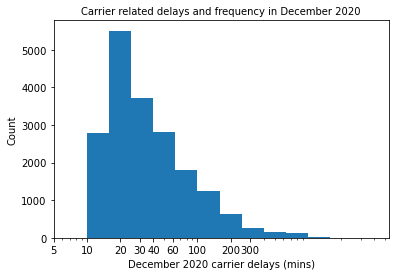

In [287]:
log_binsize = 0.2
bins = 10 ** np.arange(1, np.log10(security_delay_sample_2020['CARRIER_DELAY'].max())+log_binsize, log_binsize)
plt.figure(figsize=[6, 4])
plt.hist(data = security_delay_sample_2020, x = 'CARRIER_DELAY', bins = bins)
plt.xscale('log')
# plt.xticks([200, 250, 300, 400, 500, 600, 700, 800, 900, 1e3, 2e3, 3e3], [200, 250, 300, 400, 500, 600, 700, 800, 900,'1k', '2k', '3k'])
plt.xticks([5, 10, 20, 30, 40, 60, 100, 200, 300], [5, 10, 20, 30, 40, 60, 100, 200, 300])
plt.xlabel('December 2020 carrier delays (mins)')
plt.ylabel('Count', fontsize=10)
plt.title('Carrier related delays and frequency in December 2020', fontsize=10)
plt.show()

**Observation:** The above plot uses log scale to get a better insight into the distribution of the length of carrier delays. It skews to the right, the same as the ones above it, but clumps a big range of carrier delays and makes it hard to draw any accurate conclusions from this range.

**Sections 7a and 7b explore the overall late aircraft delays in minutes and the frequency of these delays, and gives a visualization of the distribution of delays for December 2019 and 2020. The plot will order the delays from the most frequent time to the least frequency.** 

### 7a. Distribution of <u>late aircraft delays</u> in December 2019 <a id='latedel'></a>

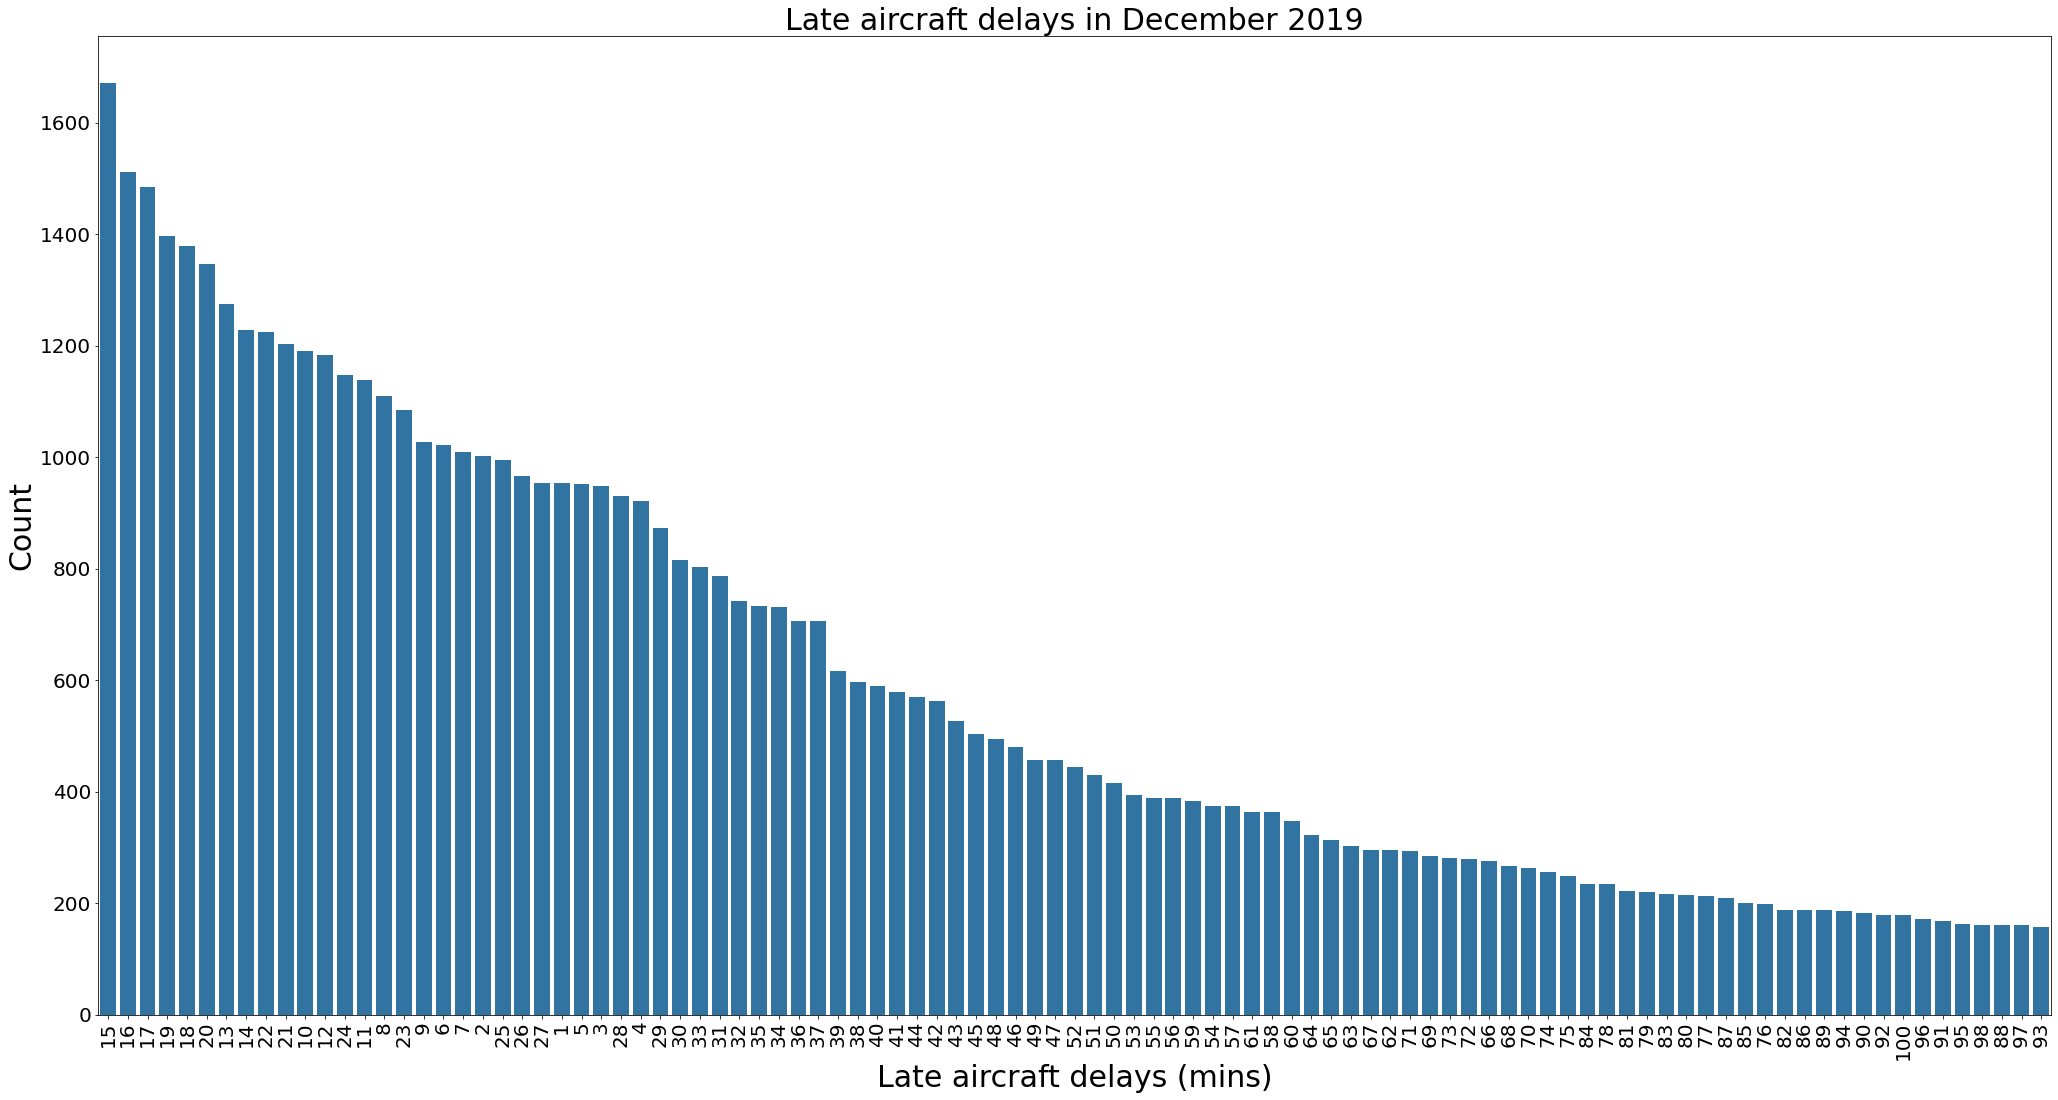

In [201]:
#2019 flights
df_flights_12_2019_new.LATE_AIRCRAFT_DELAY = df_flights_12_2019_new.LATE_AIRCRAFT_DELAY.astype(int);
aircraft_delay_2019 = df_flights_12_2019_new['LATE_AIRCRAFT_DELAY'].value_counts().sort_values( ascending=False);

plt.figure(figsize=[35, 18]);
#Skip the zero minute late_aircraft delay as this indicates no delay. Start at index 1 
aircraft_order_2019 = aircraft_delay_2019.index[1: 100];
sb.countplot(data = df_flights_12_2019_new, x = 'LATE_AIRCRAFT_DELAY', color = default_color, order=aircraft_order_2019);
plt.xticks(rotation=90);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.xlabel('Late aircraft delays (mins)', fontsize=30);
plt.ylabel('Count', fontsize=30);
plt.title('Late aircraft delays in December 2019', fontsize=30);

**Observation:** The late aircraft delays plot for December 2019 has a step like look which skews right and forms a tail. The highest frequency of late aircraft delays were 15 minutes. A large percentage of this delay appear to be under 1 hour, mainly ranging between 30 and 60 minutes. Delays over one hour were less frequent.

#### Plotting with log scale to get a better insight into the distribution

In [203]:
lateaircraft_delay_sample_2019 = df_flights_12_2019_new[df_flights_12_2019_new.LATE_AIRCRAFT_DELAY > 0].sort_values(by='SECURITY_DELAY', ascending=False)

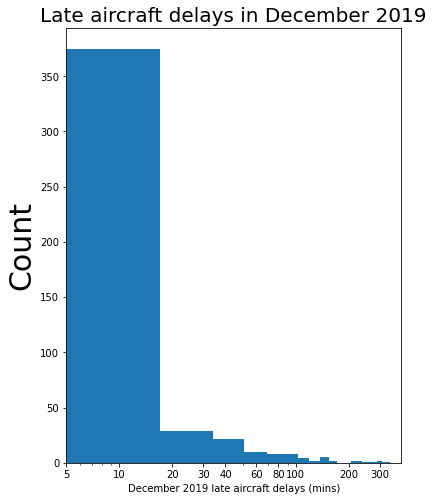

In [206]:
log_binsize = 0.25
bins = 10 ** np.arange(2.4, np.log10(lateaircraft_delay_sample_2019['LATE_AIRCRAFT_DELAY'].max())+log_binsize, log_binsize)

plt.figure(figsize=[6, 8])
plt.hist(data = security_delay_sample_2019, x = 'LATE_AIRCRAFT_DELAY', bins = 20)
plt.xscale('log')
plt.xticks([5, 10, 20, 30, 40, 60, 80, 100, 200, 300], [5, 10, 20, 30, 40, 60, 80, 100, 200, 300])
plt.ylabel('Count', fontsize=30);
plt.title('Late aircraft delays in December 2019', fontsize=20);
plt.xlabel('December 2019 late aircraft delays (mins)')
plt.show()

**The above plot uses log scale to get a better insight into the distribution of the length ol late aircraft delays. It skews to the right, and gives a better insight  and reveals what I would interpret as outliers - starting around the 200 and 300 minute range.**

### 7b. Distribution of late aircraft delays affecting flights in December 2020

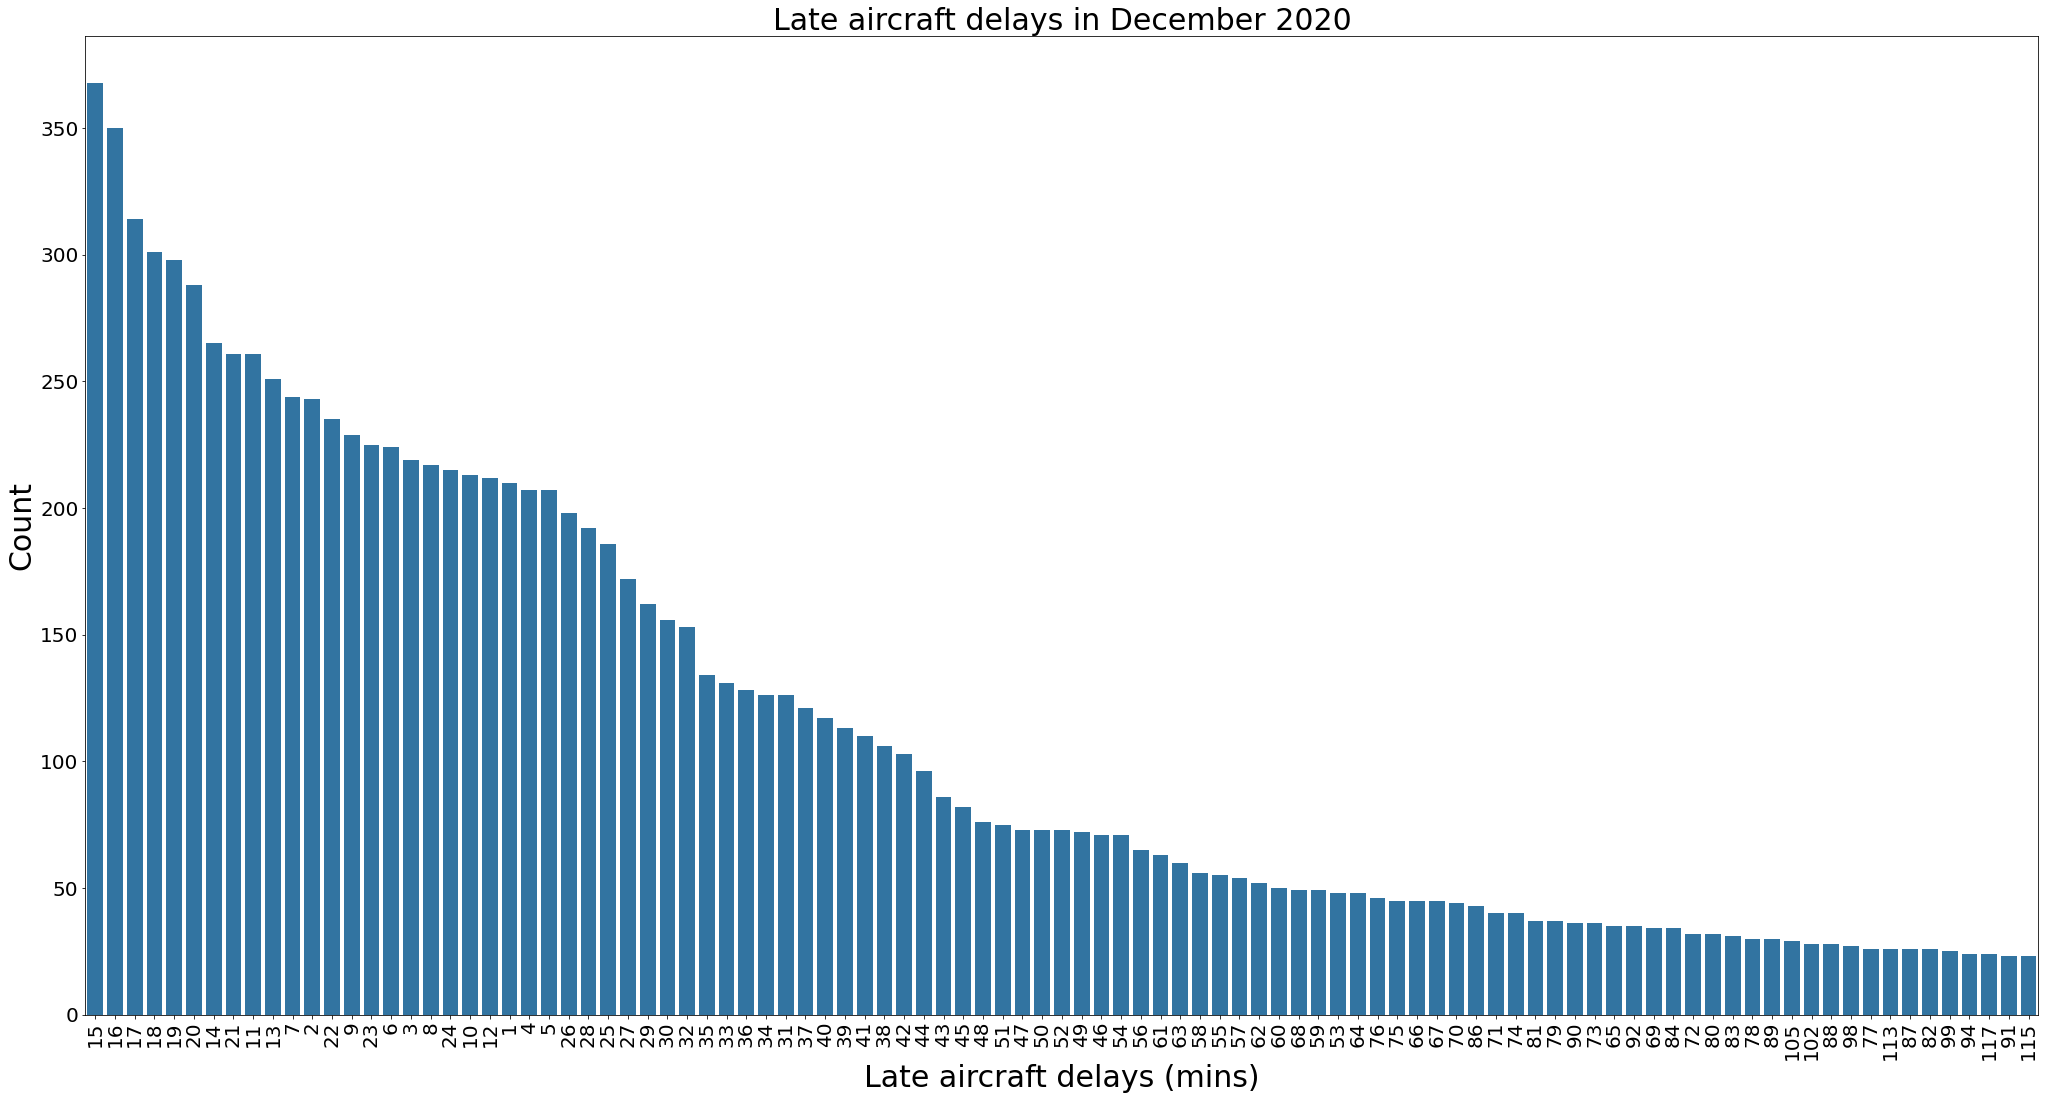

In [207]:
#2020 flights - because of the volume of data, only a sample of the data is captured for better visualization
df_flights_12_2020_new.LATE_AIRCRAFT_DELAY = df_flights_12_2020_new.LATE_AIRCRAFT_DELAY.astype(int);
aircraft_delay_2020 = df_flights_12_2020_new['LATE_AIRCRAFT_DELAY'].value_counts().sort_values( ascending=False);
#Skip the zero minute late_aircraft delay as this indicates no delay. Start at index 1  
plt.figure(figsize=[35, 18]);
aircraft_order_2020 = aircraft_delay_2020.index[1:100];
sb.countplot(data = df_flights_12_2020_new, x = 'LATE_AIRCRAFT_DELAY', color = default_color, order=aircraft_order_2020);
plt.xticks(rotation=90);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.xlabel('Late aircraft delays (mins)', fontsize=30);
plt.ylabel('Count', fontsize=30);
plt.title('Late aircraft delays in December 2020', fontsize=30);

**Observation:**The late aircraft delays plot for December 2020 looks very similar to 2019 - has a step like look which skews right and forms a tail. The highest frequency of late aircraft delays is the same as 2019, 15 minutes. I notice that there were some instances of longer delays, in 2020, although less frequent, but a bit more than 2019.

**Section 8 explores the delays caused by National Air System (NAS) and the frequency of these delays, and gives a visualization of the distribution for December 2019 and 2020. The plot will order the delays from the most frequent time to the least frequency.** 

### 8. Distribution of <u>National Air System Delays</u> affecting flights in December 2019 and 2020 <a id='nasdel'></a>

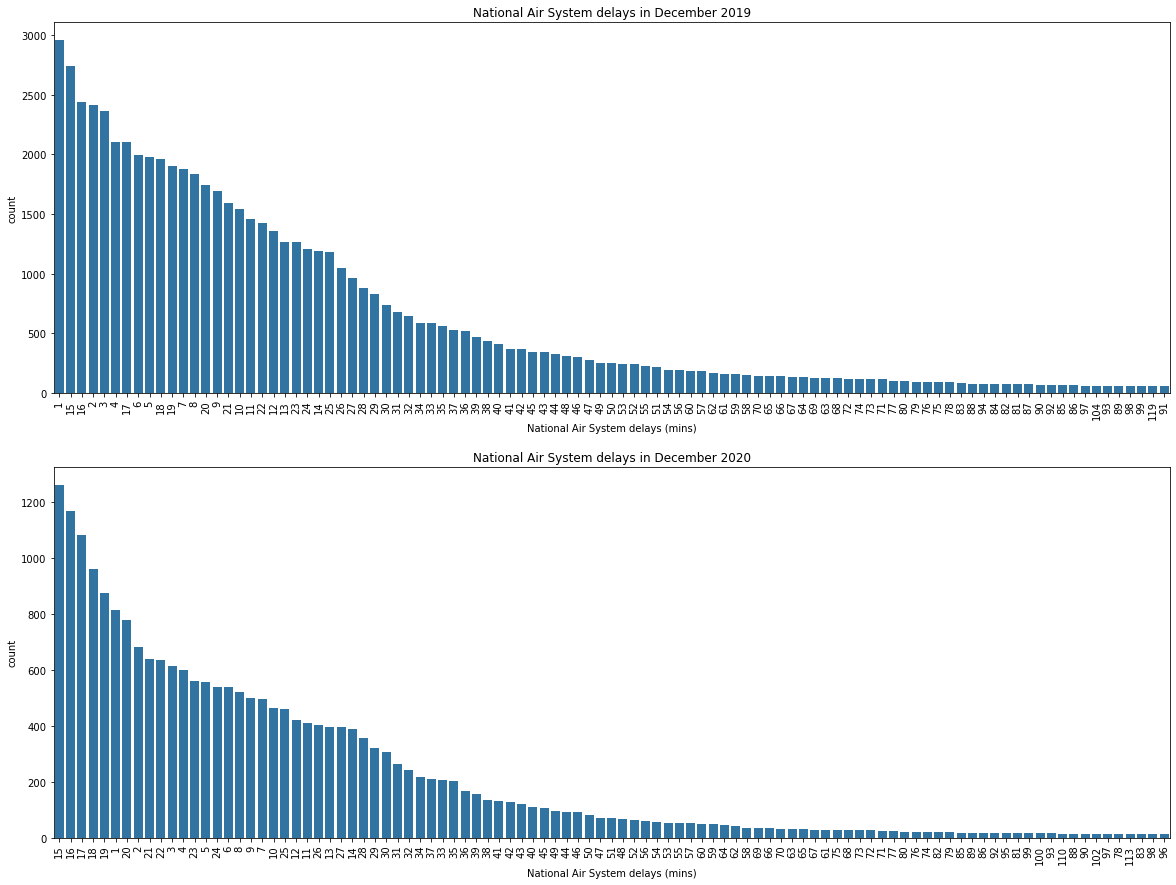

In [292]:
#-----------------Plot types of cancellations in December 2019----------------
f,ax=plt.subplots(nrows=2,figsize=(20,15))
#Convert data type to integer
df_flights_12_2019_new.NAS_DELAY = df_flights_12_2019_new.NAS_DELAY.astype(int)

freq_2019_nas = df_flights_12_2019_new['NAS_DELAY'].value_counts().sort_values( ascending=False)
nas_order_2019 = freq_2019_nas.index[1:100]
ax[0].tick_params(axis="x", rotation=90)
sb.countplot(data = df_flights_12_2019_new, x = 'NAS_DELAY', color = default_color, order=nas_order_2019, ax=ax[0])
ax[0].set_xlabel('National Air System delays (mins)')
ax[0].set_title('National Air System delays in December 2019')

#------------Plot types of cancellations in December 2020----------------

df_flights_12_2020_new.NAS_DELAY = df_flights_12_2020_new.NAS_DELAY.astype(int)
freq_2020_nas = df_flights_12_2020_new['NAS_DELAY'].value_counts().sort_values( ascending=False)
nas_order_2020 = freq_2020_nas.index[1:100]
ax[1].tick_params(axis="x", rotation=90)
sb.countplot(data = df_flights_12_2020_new, x = 'NAS_DELAY', color = default_color, order=nas_order_2020, ax=ax[1])
ax[1].set_xlabel('National Air System delays (mins)')
ax[1].set_title('National Air System delays in December 2020')

plt.show()

**The below continues assessing the NAS delays by taking another look using matplotlib's hist() function.**

In [211]:
#Only select data where NAS DELAY is greater than zero, since zero means no delays 
nas_delay_sample_2019 = df_flights_12_2019_new[df_flights_12_2019_new.NAS_DELAY > 0].sort_values(by='NAS_DELAY', ascending=False)

In [212]:
#Only select data where NAS DELAY is greater than zero, since zero means no delays 
nas_delay_sample_2020 = df_flights_12_2020_new[df_flights_12_2020_new.NAS_DELAY > 0].sort_values(by='NAS_DELAY', ascending=False)

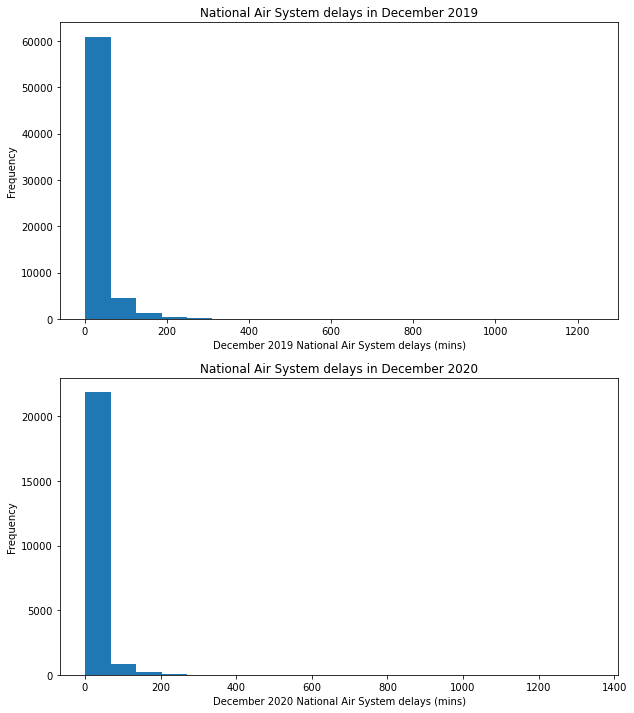

In [214]:

fig, ax = plt.subplots(nrows=2, figsize = [10,12]);
#------- plot 2019 ------------
ax[0].hist(data = nas_delay_sample_2019, x = 'NAS_DELAY', bins = 20);
# plt.xscale('log')
# plt.xticks([5, 10, 20, 30, 40, 60, 80, 100, 200, 300], [5, 10, 20, 30, 40, 60, 80, 100, 200, 300])
ax[0].set_xlabel('December 2019 National Air System delays (mins)');
ax[0].set_ylabel('Frequency')
ax[0].set_title('National Air System delays in December 2019');

#------ plot 2020---------------
ax[1].hist(data = nas_delay_sample_2020, x = 'NAS_DELAY', bins = 20);
# plt.xscale('log')
# plt.xticks([5, 10, 20, 30, 40, 60, 80, 100, 200, 300], [5, 10, 20, 30, 40, 60, 80, 100, 200, 300])
ax[1].set_xlabel('December 2020 National Air System delays (mins)');
ax[1].set_ylabel('Frequency')
ax[1].set_title('National Air System delays in December 2020');

# plt.show();

**Observation:** The plots for National Air System delays in December 2019 and 2020 both show that most of the (NAS) delays lasted from just over a minute to 20 minutes, and longer delays were less frequent - the delays a little under the maximum frequency were from 20 to 30 minutes, with a rapid drop in frequency for delays lasting around 40 to 50 minutes. Again, the frequency of delays dropped considerably in 2020 in comparison to 2019, which correlates with the drop of flights in 2020 due to the pandemic. There were a few NAS delays that lasted very long  - December 2019 shows a couple above 200 minutes, whereas there was only one in 2020. Since they are so much further than the other data points in the graph, further investigation will be needed to get more details on them. They may qualify as outliers.


## Visualization 2

### 9. Reasons for flights cancellations <a id='flightcan'></a>

**Section 9 explores the different types of cancellations presented in the dataset, and plots them side by side to compare the frequency of occurrences in December 2019 and 2020.**

**Plots created sided by side using Seaborn**

In [296]:
#df_flights_12_2019_new.head()

In [85]:
#Confirm that there are cancellation codes in 2019
df_flights_12_2019_new['CANCELLATION_CODE'].value_counts()

0    619970
B      3155
A      1603
C      1035
Name: CANCELLATION_CODE, dtype: int64

In [86]:
#Confirm that there are cancellation codes in 2020
df_flights_12_2020_new['CANCELLATION_CODE'].value_counts()

0    367507
B      2445
A       717
D       404
C       284
Name: CANCELLATION_CODE, dtype: int64

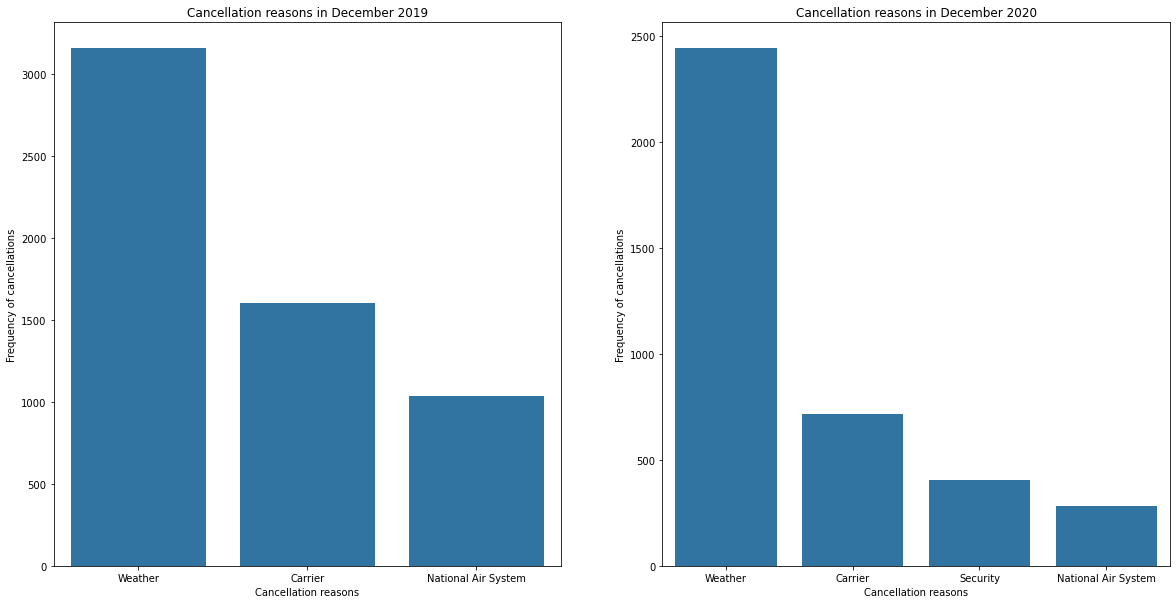

In [194]:
#Plot types of cancellations in December 2019
f,ax=plt.subplots(1,2,figsize=(20,10));

#Get the cancellation descriptions for December 2019
freq_2019_cancelled = df_flights_12_2019_new['CANCELLED_DESCRIPTION'].value_counts();
cancelled_order_2019 = freq_2019_cancelled.index;
sb.countplot(data = df_flights_12_2019_new, x = 'CANCELLED_DESCRIPTION', color = default_color, order=cancelled_order_2019, ax=ax[0]);
ax[0].set_xlabel('Cancellation reasons');
ax[0].set_ylabel('Frequency of cancellations');
ax[0].set_title('Cancellation reasons in December 2019');
#Plot types of cancellations in December 2020
#Get the cancellation descriptions for December 2020
freq_2020_cancelled = df_flights_12_2020_new['CANCELLED_DESCRIPTION'].value_counts();
cancelled_order_2020 = freq_2020_cancelled.index;
sb.countplot(data = df_flights_12_2020_new, x = 'CANCELLED_DESCRIPTION', color = default_color, order=cancelled_order_2020, ax=ax[1]);
ax[1].set_xlabel('Cancellation reasons');
ax[1].set_ylabel('Frequency of cancellations');
ax[1].set_title('Cancellation reasons in December 2020');
plt.show();

**Observation:** The plots above show that there were no security related cancellations in December 2019, only in December 2020. Additionally, in both December 2019 and 2020, most cancellations were weather related, followed by carrier and in December 2019, followed by National Air System (NAS), but Security in 2020. Also noticeable, is that the frequency of cancellations in December 2020 was half the amount of December 2019, which is consistent with the reduction of flights provided in the data. 

## Visualization 3

### 10. Frequency of flights from cities of origin <a id='freqorig'></a>

**Section 10 explores the different cities from which flights orginated in December 2019 and 2020, to see the frequency of flights, and plots them to visualize the frequency of occurrences.**

In [89]:
#Get the counts of occurrences of each city 
df_flights_12_2019_new['ORIGIN_CITY_NAME'].value_counts()

Chicago, IL              34304
Atlanta, GA              32296
Dallas/Fort Worth, TX    25516
New York, NY             24155
Denver, CO               21333
                         ...  
Ogden, UT                    9
Owensboro, KY                9
Adak Island, AK              8
Greenville, NC               2
Cody, WY                     1
Name: ORIGIN_CITY_NAME, Length: 343, dtype: int64

In [90]:
freq_2019_cancelled.index

Index(['Weather', 'Carrier', 'National Air System'], dtype='object')

**Create a new column in 2019 and 2020 dataframes to hold the concatenation of airport code and ORIGIN_CITY_NAME - this is done because some cities have multiple airports, e.g. LGA New York, JFK New York**


In [91]:
#Create new column in 2019
df_flights_12_2019_new['ORIGIN_CITY'] =  "(" + df_flights_12_2019_new['ORIGIN'] + ") " + df_flights_12_2019_new['ORIGIN_CITY_NAME']

In [92]:
#Create new column in 2020
df_flights_12_2020_new['ORIGIN_CITY'] = "(" + df_flights_12_2020_new['ORIGIN'] + ") " + df_flights_12_2020_new['ORIGIN_CITY_NAME']

In [93]:
# origin_2019
df_flights_12_2019_new['ORIGIN_CITY'].value_counts()

(ATL) Atlanta, GA              32296
(ORD) Chicago, IL              27447
(DFW) Dallas/Fort Worth, TX    25516
(DEN) Denver, CO               21333
(CLT) Charlotte, NC            19748
                               ...  
(OGD) Ogden, UT                    9
(OWB) Owensboro, KY                9
(ADK) Adak Island, AK              8
(PGV) Greenville, NC               2
(COD) Cody, WY                     1
Name: ORIGIN_CITY, Length: 350, dtype: int64

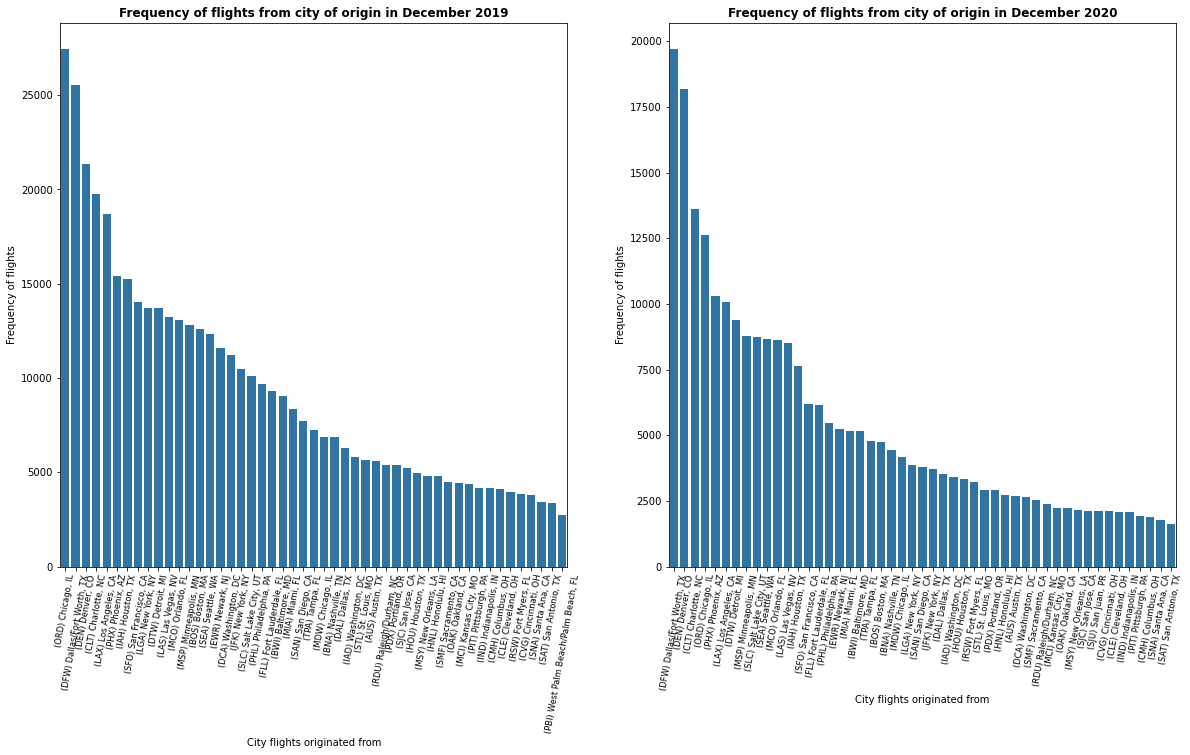

In [94]:
#Plot city of flight origin in December 2019
f,ax=plt.subplots(nrows=1,ncols = 2, figsize=(20,10));
#Create a variable to store the newly concatenated values, ordered by the largest occurrences to the smallest
origin_2019 = df_flights_12_2019_new['ORIGIN_CITY'].value_counts();
#use the first 50 values returned
city_origin_2019 = origin_2019.index[1:50];
sb.countplot(data = df_flights_12_2019_new, x = 'ORIGIN_CITY', color = default_color, order=city_origin_2019, ax=ax[0]);
ax[0].set_xlabel('City flights originated from');
ax[0].set_ylabel('Frequency of flights');
ax[0].set_title('Frequency of flights from city of origin in December 2019', fontweight='bold');
ax[0].tick_params(axis="x", rotation=80, labelsize='small');

#Plot city of flight origin in December 2020
origin_2020 = df_flights_12_2020_new['ORIGIN_CITY'].value_counts();
#use the first 50 values returned
city_origin_2020 = origin_2020.index[1:50];
sb.countplot(data = df_flights_12_2020_new, x = 'ORIGIN_CITY', color = default_color, order=city_origin_2020, ax=ax[1]);
ax[1].set_xlabel('City flights originated from');
ax[1].set_ylabel('Frequency of flights');
ax[1].set_title('Frequency of flights from city of origin in December 2020',  fontweight='bold');
ax[1].tick_params(axis="x", rotation=80, labelsize='small');
plt.show();

**Observation:** The plots show the cities from which flights originated in the order of frequency of flights. In 2019 most flights originated from Chicago (ORD) airport, and the next 4 airports following were Dallas Forth Worth (DFW), Denver (DEN), Charlotte (CLT) and Los Angeles (LAX). While some of the same airports remained within the top 5 in December 2020, the order changed, with Dallas Forth Worth (DFW) being the most frequent, and Denver (DEN), Charlotte (CLT) following, but Chicago (ORD) fell to 4th place, followed by Phoenix (PHX). In December 2019, the frequency of flights originating from cities outside of the top 5, dropped by a large margin, by about 10,000 up to the top 7 cities, then in a step like shape up to the first 27 cities then gradually tailing of under 5000 flights. The cities with frequencies below 5000 may be because the airports are smaller, but Miami airport is amongst these airports and I think it is one of the busier airports around, but maybe it is more of a hub than a location where most flights originate. Further investigation will have to be conducted to get more insight.

## Visualization 4

### 11. Frequency of flights at destination airports  <a id='flightdest'></a>

**Section 11 explores the frequency of flights from destination airports in December 2019 and 2020, to see the frequency of flights, and provide plots that show the airports and frequency of flights.**

In [95]:
df_flights_12_2019_new['DEST_CITY_NAME'].value_counts()

Chicago, IL              34252
Atlanta, GA              32314
Dallas/Fort Worth, TX    25505
New York, NY             24158
Denver, CO               21332
                         ...  
Ogden, UT                    9
Owensboro, KY                9
Adak Island, AK              8
Greenville, NC               2
Cody, WY                     2
Name: DEST_CITY_NAME, Length: 343, dtype: int64

**Create a new column in 2019 and 2020 dataframes to hold the concatenation of destination airport code and DEST_CITY_NAME - this is done because some cities have multiple airports, e.g. LGA New York, JFK New York**

In [96]:
df_flights_12_2019_new['DEST_CITY'] =  "(" + df_flights_12_2019_new['DEST'] + ") " + df_flights_12_2019_new['DEST_CITY_NAME']

In [97]:
df_flights_12_2020_new['DEST_CITY'] = "(" + df_flights_12_2020_new['DEST'] + ") " + df_flights_12_2020_new['DEST_CITY_NAME']

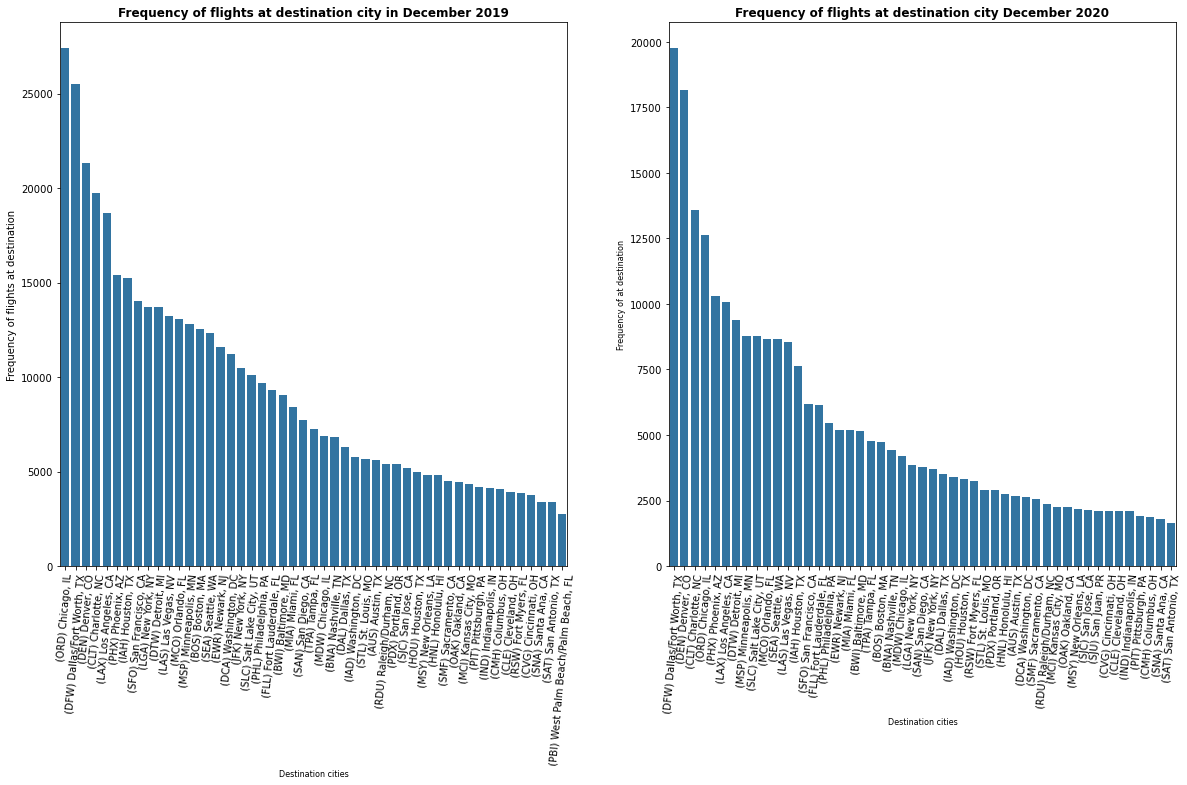

In [195]:
#Plot city of flight origin in December 2019
f,ax=plt.subplots(nrows=1,ncols=2, figsize=(20,10));
#Create a variable to store the newly concatenated values, ordered by the largest occurrences to the smallest
dest_2019 = df_flights_12_2019_new['DEST_CITY'].value_counts();
city_dest_2019 = dest_2019.index[1:50];
sb.countplot(data = df_flights_12_2019_new, x = 'DEST_CITY', color = default_color, order=city_dest_2019, ax=ax[0]);
ax[0].set_xlabel('Destination cities', fontsize = 8);
ax[0].set_ylabel('Frequency of flights at destination');
ax[0].set_title('Frequency of flights at destination city in December 2019',  fontweight='bold');
ax[0].tick_params(axis="x", rotation=85);

#Plot city of flight origin in December 2020
#Create a variable to store the newly concatenated values, ordered by the largest occurrences to the smallest
dest_2020 = df_flights_12_2020_new['DEST_CITY'].value_counts();
city_dest_2020 = dest_2020.index[1:50];
sb.countplot(data = df_flights_12_2020_new, x = 'DEST_CITY', color = default_color, order=city_dest_2020, ax=ax[1]);
ax[1].set_xlabel('Destination cities', fontsize = 8);
ax[1].set_ylabel('Frequency of at destination', fontsize = 8);
ax[1].set_title('Frequency of flights at destination city December 2020',  fontweight='bold');
ax[1].tick_params(axis="x", rotation=85);
plt.show();

**Observation:** In 2019, Chicago (ORD) was the most travelled to destination airport, and the next 4 airports following were Dallas Forth Worth (DFW), Denver (DEN), Charlotte (CLT) and Los Angeles (LAX) - very similar to the findings from the analysis of the cities flights originated from. While four of the same airports remained within the top 5 in 2020, the order changed, with Chicago (ORD) falling to 4th place and Dallas Forth Worth (DFW) taking the top spot, followed by Denver (DEN) and Charlotte (CLT). Also in both charts, they have been significant differences in frequency of flights when comparing some airports listed adjacent in the plot. For example, in 2019, there is a big different in frequency of flights at Chicago (ORD) airport, with the number of flights exceeding 25,000 and the lowest under 5000 flights. 

**Section 12 explores the distribution of departure time blocks in December 2019 and 2020, to see which time slots are the busiest in terms and slowest in terms of flights. Plots were created to give a better visualization.**

### 12. Distribution of blocks of departure times <a id='deptimes'></a>

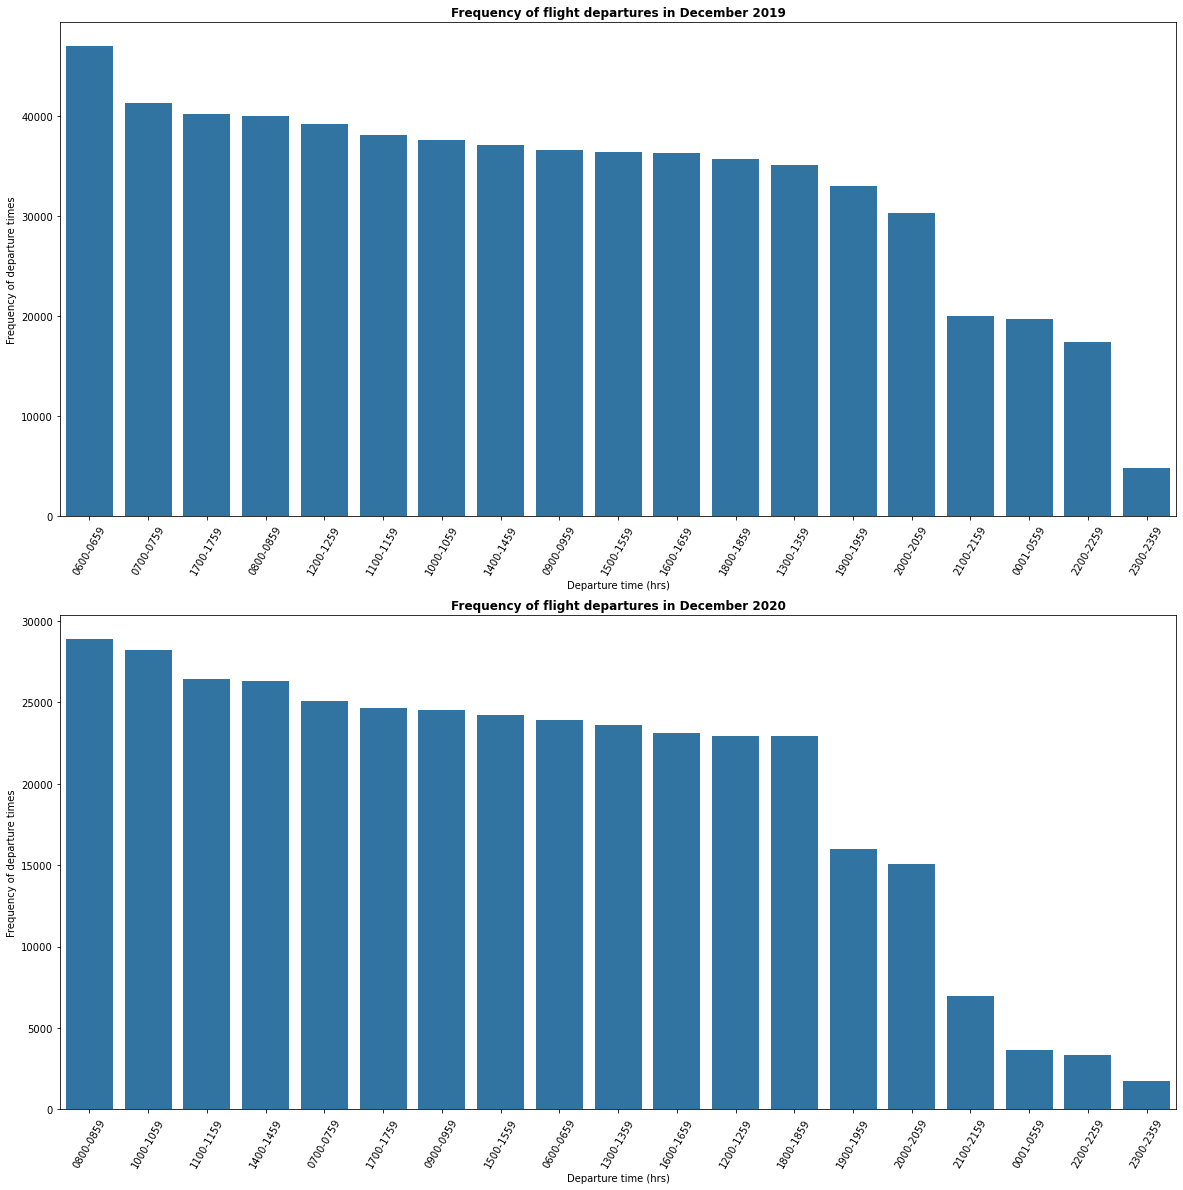

In [310]:
#Plot departure time blocks in December 2019
f,ax=plt.subplots(nrows=2,figsize=(20,20))
#Create a variable to store the departure time blocks, ordered by the largest occurrences to the smallest
dest_2019 = df_flights_12_2019_new['DEP_TIME_BLK'].value_counts()
city_dest_2019 = dest_2019.index
sb.countplot(data = df_flights_12_2019_new, x = 'DEP_TIME_BLK', color = default_color, order=city_dest_2019, ax=ax[0])
ax[0].set_xlabel('Departure time (hrs)')
ax[0].set_ylabel('Frequency of departure times')
ax[0].set_title('Frequency of flight departures in December 2019', fontweight = 'bold')
ax[0].tick_params(axis="x", rotation=60)

#Plot departure time blocks in December 2020
#Create a variable to store the departure time blocks, ordered by the largest occurrences to the smallest
dest_2020 = df_flights_12_2020_new['DEP_TIME_BLK'].value_counts()
city_dest_2020 = dest_2020.index
sb.countplot(data = df_flights_12_2020_new, x = 'DEP_TIME_BLK', color = default_color, order=city_dest_2020, ax=ax[1])
ax[1].set_xlabel('Departure time (hrs)')
ax[1].set_ylabel('Frequency of departure times')
ax[1].set_title('Frequency of flight departures in December 2020', fontweight = 'bold')
ax[1].tick_params(axis="x", rotation=60)
plt.show()

**Observation:** The plots showed that the time slots with the largest number of departure flights was between 0600 and 0659 hours in December 2019, whereas in December 2020, the most frequent flights were between 0800 and 0859 hours. The timeslot with the least departure flights was between 2300 and 2359 hours in both December 2019 and December 2020. The next busiest time for departure was between 0700 and 0759 with a gradual decline various time of the day - between 1700-1759, 0800-0859 e.t.c. In December 2020, flights were 2nd in frequency between 1000 and 1059 hours, and the frequency dropped gradually between 1100 and 1159, then aroun 2000 hours. Also as expected the frequency of flights were overall less in 2020 than 2019, because of the impact to travel during the pandemic.

**Section 13 explores the distribution of flight arrivals time blocks in December 2019 and 2020, to see which time slots have the busiest and slowest in terms of the frequency of flights. Plots were created to give a better visualization.**

### 13. Distribution of flight arrivals time slots <a id='distarrtime'></a>

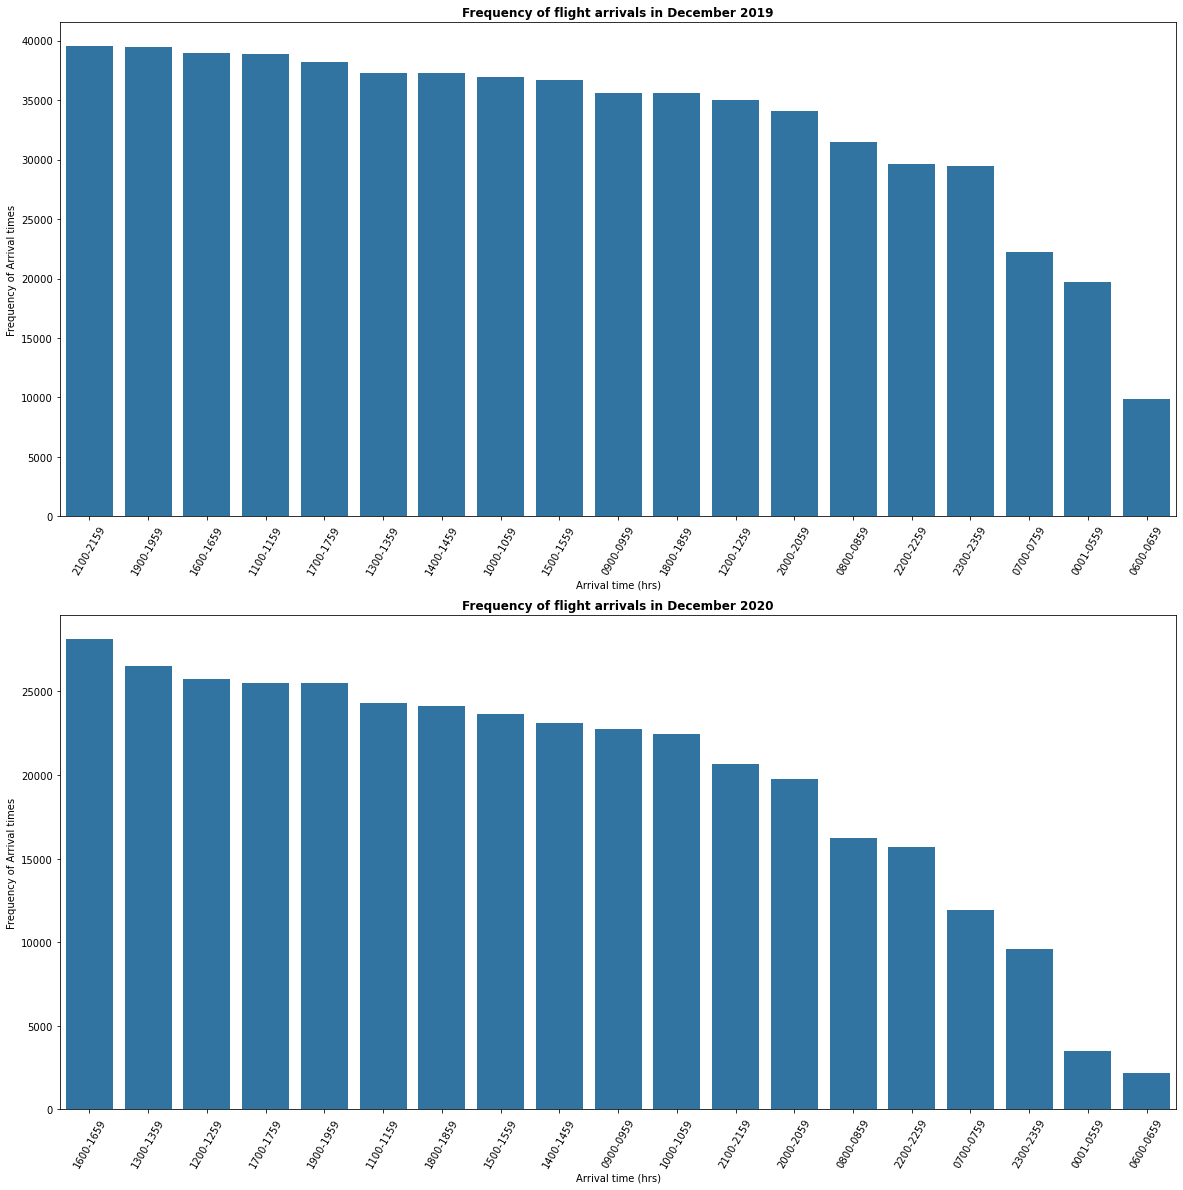

In [311]:
#Plot arrival time blocks in December 2019
f,ax=plt.subplots(nrows=2,figsize=(20,20))
#Create a variable to store the arrival time blocks, ordered by the largest occurrences to the smallest
arr_2019 = df_flights_12_2019_new['ARR_TIME_BLK'].value_counts()
#get the order of the arrival times
city_arr_2019 = arr_2019.index
sb.countplot(data = df_flights_12_2019_new, x = 'ARR_TIME_BLK', color = default_color, order=city_arr_2019, ax=ax[0])
ax[0].set_xlabel('Arrival time (hrs)')
ax[0].set_ylabel('Frequency of Arrival times')
ax[0].set_title('Frequency of flight arrivals in December 2019', fontweight='bold')
ax[0].tick_params(axis="x", rotation=60)

#Plot arrival time blocks in December 2020
#Create a variable to store the arrival time blocks, ordered by the largest occurrences to the smallest
arr_2020 = df_flights_12_2020_new['ARR_TIME_BLK'].value_counts()
#get the order of the arrival times
city_arr_2020 = arr_2020.index
sb.countplot(data = df_flights_12_2020_new, x = 'ARR_TIME_BLK', color = default_color, order=city_arr_2020, ax=ax[1])
ax[1].set_xlabel('Arrival time (hrs)')
ax[1].set_ylabel('Frequency of Arrival times')
ax[1].set_title('Frequency of flight arrivals in December 2020', fontweight='bold')
ax[1].tick_params(axis="x", rotation=60)
plt.show()

**Observation:** The plots above show that the time slots with the largest number of flight arrivals were between 2100 and 2159 hours and 1900 to 1959, closely behind, in December 2019, whereas in December 2020, the most frequent flights arrived between 1600 and 1659 hours. The timeslot with the least arrivals was between 0600 and 0659 hours in both December 2019 and December 2020. The next busiest time slots for arrivals were from 1600 to 0759 and 1100 to 1159 hours in December 2019, and 1300 to 1359, 1200 to 1259, 1700 to 1759 and 1900 to 1959 in December 2020. Also, as expected, overall, the frequency of flight arrivals was less in 2020 than in 2019, due to the impact to travelling during the pandemic. The frequency of flight arrivals graually declined during various time slots as shown in both plots.

**Section 14 explores the distribution of flights each week day in December 2019 and 2020, to see which days of the week have the most and least frequency of flights. Plots were created to give a better visualization.**

### 14. Distribution of flights each day of the week  <a id='dayofweek'></a>

This explores the number of flights each day of the week in December in 2019 and 2020

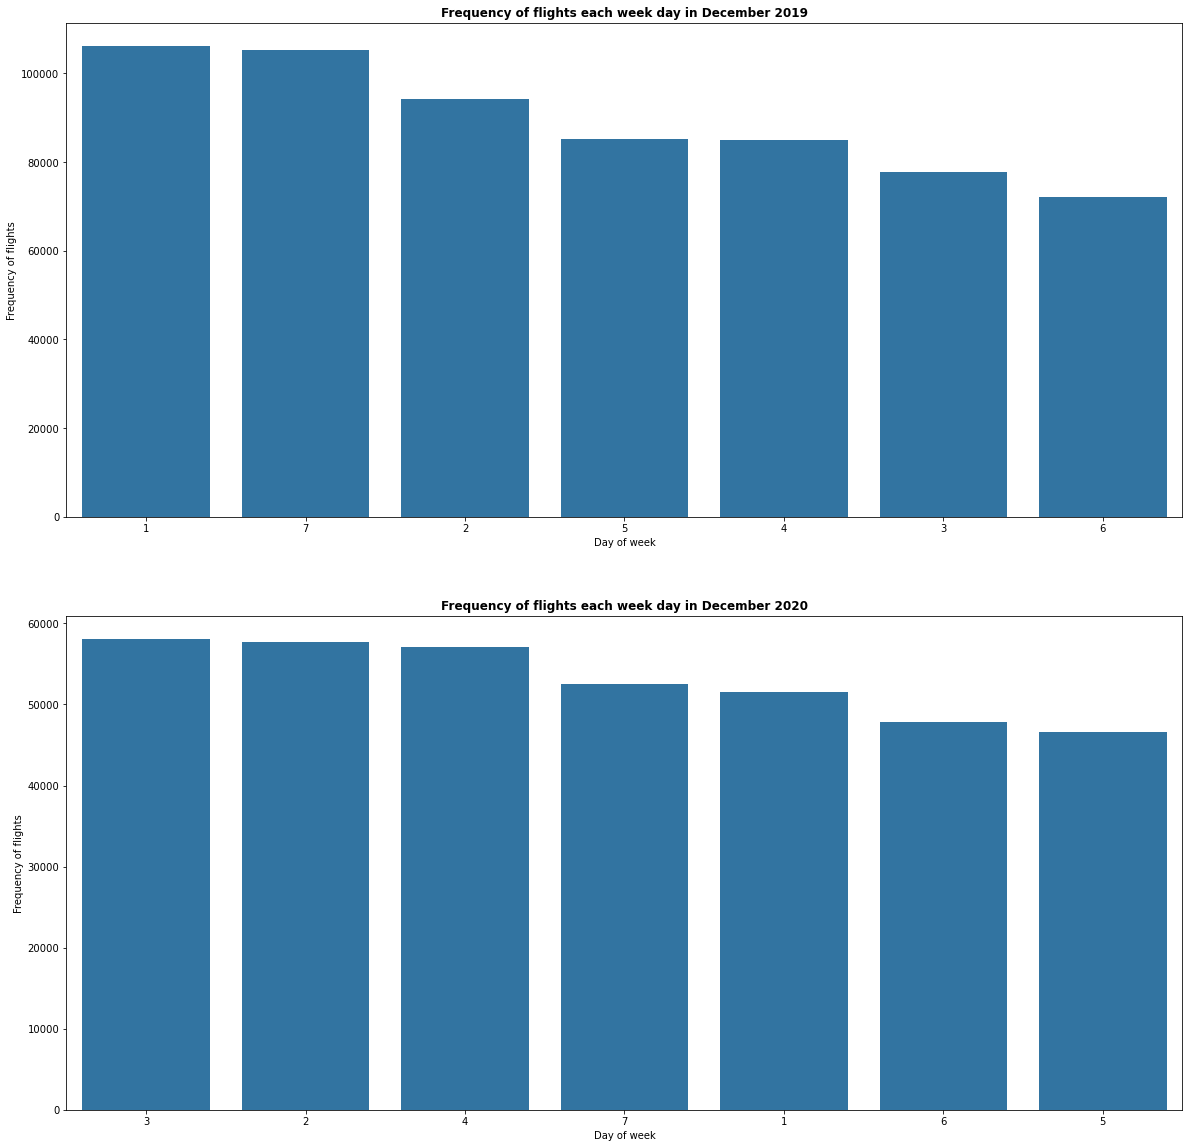

In [312]:
#Plot December 2019
f,ax=plt.subplots(nrows=2,figsize=(20,20))
#Create a variable to store the frequencies of the day of the week, ordered by the largest occurrences to the smallest
weeks_2019 = df_flights_12_2019_new['DAY_OF_WEEK'].value_counts()
city_weeks_2019 = weeks_2019.index
sb.countplot(data = df_flights_12_2019_new, x = 'DAY_OF_WEEK', color = default_color, order=city_weeks_2019, ax=ax[0])
ax[0].set_xlabel('Day of week')
ax[0].set_ylabel('Frequency of flights')
ax[0].set_title('Frequency of flights each week day in December 2019', fontweight='bold')
ax[0].tick_params(axis="x", rotation=0)

#Plot December 2020
#Create a variable to store the frequencies of the day of the week, ordered by the largest occurrences to the smallest
weeks_2020 = df_flights_12_2020_new['DAY_OF_WEEK'].value_counts()
city_weeks_2020 =weeks_2020.index
sb.countplot(data = df_flights_12_2020_new, x = 'DAY_OF_WEEK', color = default_color, order=city_weeks_2020, ax=ax[1])
ax[1].set_xlabel('Day of week')
ax[1].set_ylabel('Frequency of flights')
ax[1].set_title('Frequency of flights each week day in December 2020', fontweight='bold')
ax[1].tick_params(axis="x", rotation=0)
plt.show()

**Observation:** The plot for December 2109 shows that the 1st and last days of the week were the busiest days for flights, whereas in December 2020, the busiest days were the 3rd, 2nd and 4th days (Tuesday, Wednesday and Thursday). The least busy days in December 2019 was Friday and in December 2020, Thursday. Further investigation will be needed to determine why. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Visualization 5

### 1. Range of departure delay each carrier endured

This explores the flight data to see the length of departure delays encountered by each carrier, during the months of December 2019 and December 2020. Visualizations are done using box plots.

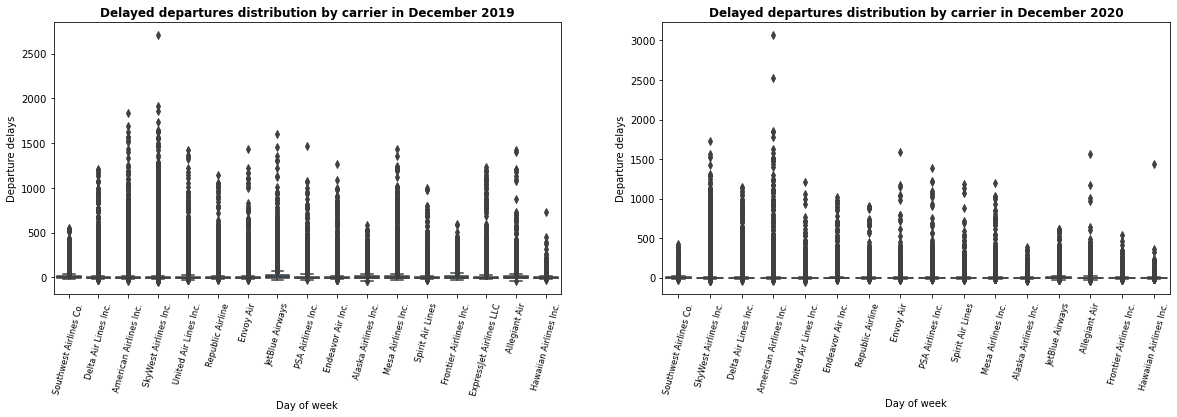

In [99]:
f,ax=plt.subplots(nrows=1,ncols=2, figsize=(20,5));
#Plot December 2019
#Create a variable to store the frequencies of carriers, ordered by the largest occurrences to the smallest
dest_2019 = df_flights_12_2019_new['CARRIER_DESCRIPTION'].value_counts();
#Capture the names of the carriers
city_dest_2019 = dest_2019.index;
#Plot carrier vs departure delays
sb.boxplot(data = df_flights_12_2019_new, x = 'CARRIER_DESCRIPTION', y = 'DEP_DELAY'  , color = default_color, order=city_dest_2019, ax=ax[0]);
ax[0].set_xlabel('Day of week');
ax[0].set_ylabel('Departure delays');
ax[0].set_title('Delayed departures distribution by carrier in December 2019', fontweight='bold');
ax[0].tick_params(axis="x", rotation=75, labelsize='small');

#Plot December 2020
#Create a variable to store the frequencies of the carriers, ordered by the largest occurrences to the smallest
dest_2020 = df_flights_12_2020_new['CARRIER_DESCRIPTION'].value_counts();
#Capture the names of the carriers
city_dest_2020 = dest_2020.index;
#Plot carrier vs departure delays
sb.boxplot(data = df_flights_12_2020_new, x = 'CARRIER_DESCRIPTION', y = 'DEP_DELAY', color = default_color, order=city_dest_2020, ax=ax[1]);
ax[1].set_xlabel('Day of week');
ax[1].set_ylabel('Departure delays');
ax[1].set_title('Delayed departures distribution by carrier in December 2020', fontweight='bold');
ax[1].tick_params(axis="x", rotation=75, labelsize='small');
plt.show();

**Observation:** The box plots show that the lower whisker across all the plots were below zero, indicating that there were instances when flights departed earlier than scheduled. Additionally, the plots show that the majority of delays across all carriers were under 100 minutes long, as seen by the highest whisker. However there are many outliers across all carriers, indicating that there were times when delays were excessively long, although there were less frequent than the majority of delays. SkyWest Airlines stands out as the carrier with the largest delay in one instance. 

### 2. Range of arrival delays each carrier endured  <a id='arrcarr'></a>

Here I explore the carriers and generate boxplots to give a visualization of the range of arrival delays encountered, to see the minimum, maximum minutes and any outlier. This covers December 2019 and 2020.

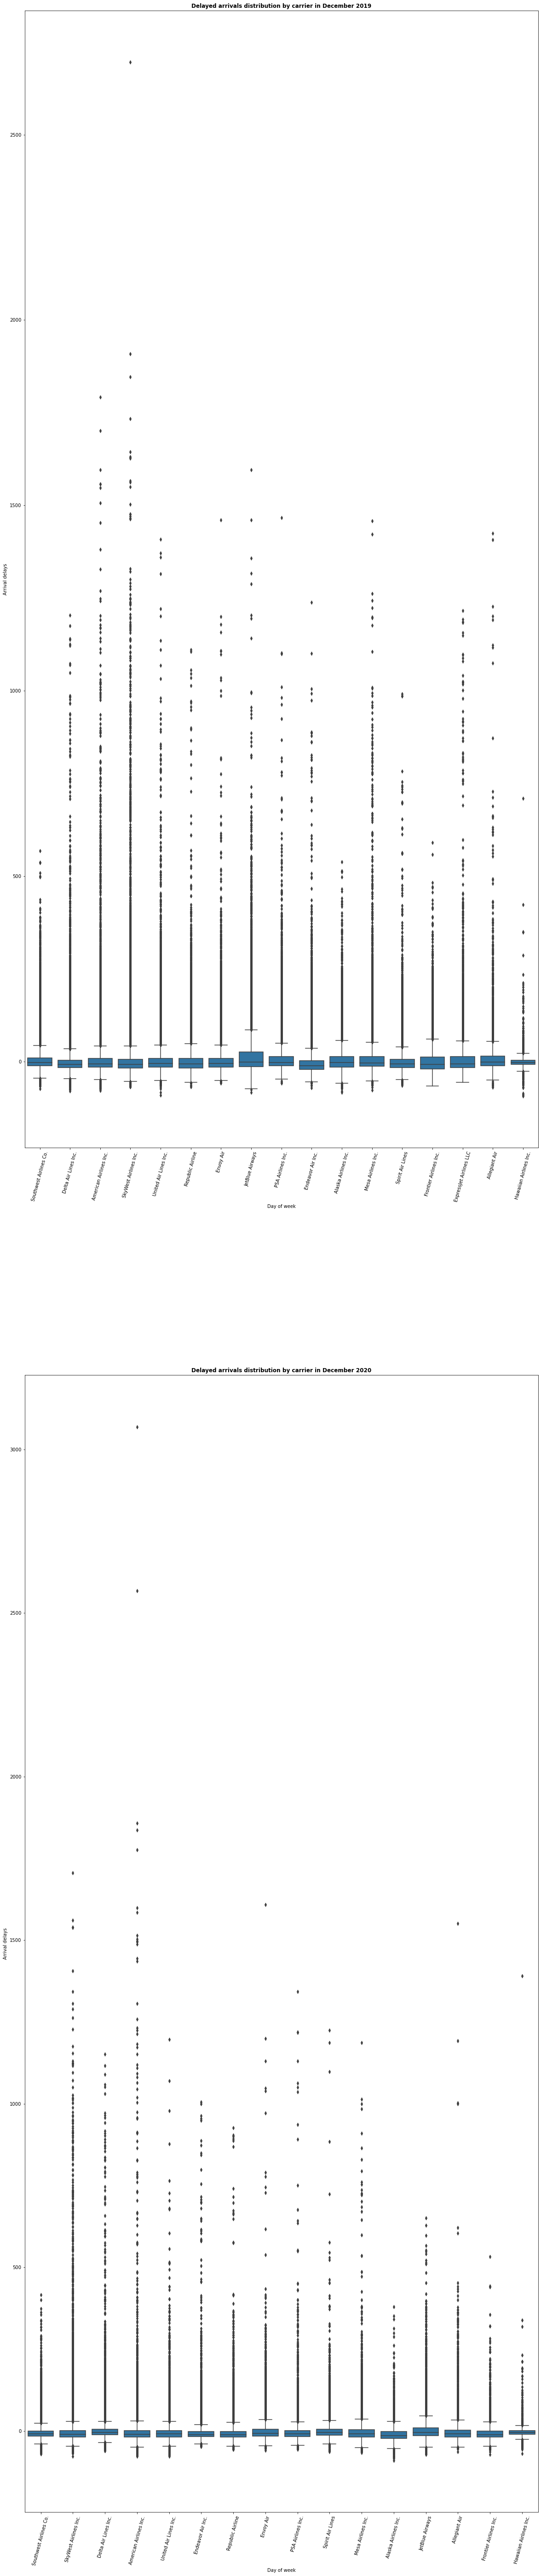

In [314]:
#Box plots for December 2019 
f,ax=plt.subplots(nrows=2,figsize=(20,100))
#Create a variable to store the frequencies of carriers names, ordered by the largest occurrences to the smallest
carr_2019 = df_flights_12_2019_new['CARRIER_DESCRIPTION'].value_counts()
#Capture the names of the carriers
city_carr_2019 = carr_2019.index
sb.boxplot(data = df_flights_12_2019_new, x = 'CARRIER_DESCRIPTION', y = 'ARR_DELAY'  , color = default_color, order=city_carr_2019, ax=ax[0])
ax[0].set_xlabel('Day of week')
ax[0].set_ylabel('Arrival delays')
ax[0].set_title('Delayed arrivals distribution by carrier in December 2019', fontweight='bold')
ax[0].tick_params(axis="x", rotation=75)

#Plot December 2020
#Create a variable to store the frequencies of carriers names, ordered by the largest occurrences to the smallest
carr_2020 = df_flights_12_2020_new['CARRIER_DESCRIPTION'].value_counts()
#Capture the names of the carriers
city_carr_2020 = carr_2020.index
sb.boxplot(data = df_flights_12_2020_new, x = 'CARRIER_DESCRIPTION', y = 'ARR_DELAY', color = default_color, order=city_carr_2020, ax=ax[1])
ax[1].set_xlabel('Day of week')
ax[1].set_ylabel('Arrival delays')
ax[1].set_title('Delayed arrivals distribution by carrier in December 2020', fontweight='bold')
ax[1].tick_params(axis="x", rotation=75)
plt.show()

**Observation:** Like the box plots for the carrier vs departure delays above, the carrier vs arrival plots show that the lower whiskers across all the plots were below zero, indicating that there were instances when flights arrived earlier than scheduled. Additionally, the plots show that the majority of delays across all carriers were way under 100 minutes long, as seen by the highest whisker. However there are many outliers across all carriers, indicating that there were times when delays were excessively long, although there were less frequent than the majority of delays. SkyWest Airlines and American Airlines stand out as the carrier with the largest delay in December 2019 and 2020. 


### 3. Range of weather delays each carrier endured  <a id='weathcarr'></a>

Here I explore the carriers and generate boxplots to give a visualization of the relationship of each carriers with weather delays, to see the minimum, maximum minutes and any outlier. This covers December 2019 and 2020.

In [315]:
#Check frequency of carrier and weather delay combination - just reviewing the data 
df_flights_12_2019_new[['CARRIER_DESCRIPTION', 'WEATHER_DELAY']].value_counts()

CARRIER_DESCRIPTION     WEATHER_DELAY
Southwest Airlines Co.  0                114198
Delta Air Lines Inc.    0                 80628
American Airlines Inc.  0                 78784
SkyWest Airlines Inc.   0                 70925
United Air Lines Inc.   0                 50682
                                          ...  
Hawaiian Airlines Inc.  18                    1
                        9                     1
                        8                     1
                        7                     1
United Air Lines Inc.   1111                  1
Length: 1897, dtype: int64

In [316]:
df_flights_12_2019_new[['WEATHER_DELAY']].value_counts()

WEATHER_DELAY
0                619643
2                   196
7                   195
1                   192
3                   186
                  ...  
434                   1
435                   1
437                   1
441                   1
1847                  1
Length: 476, dtype: int64

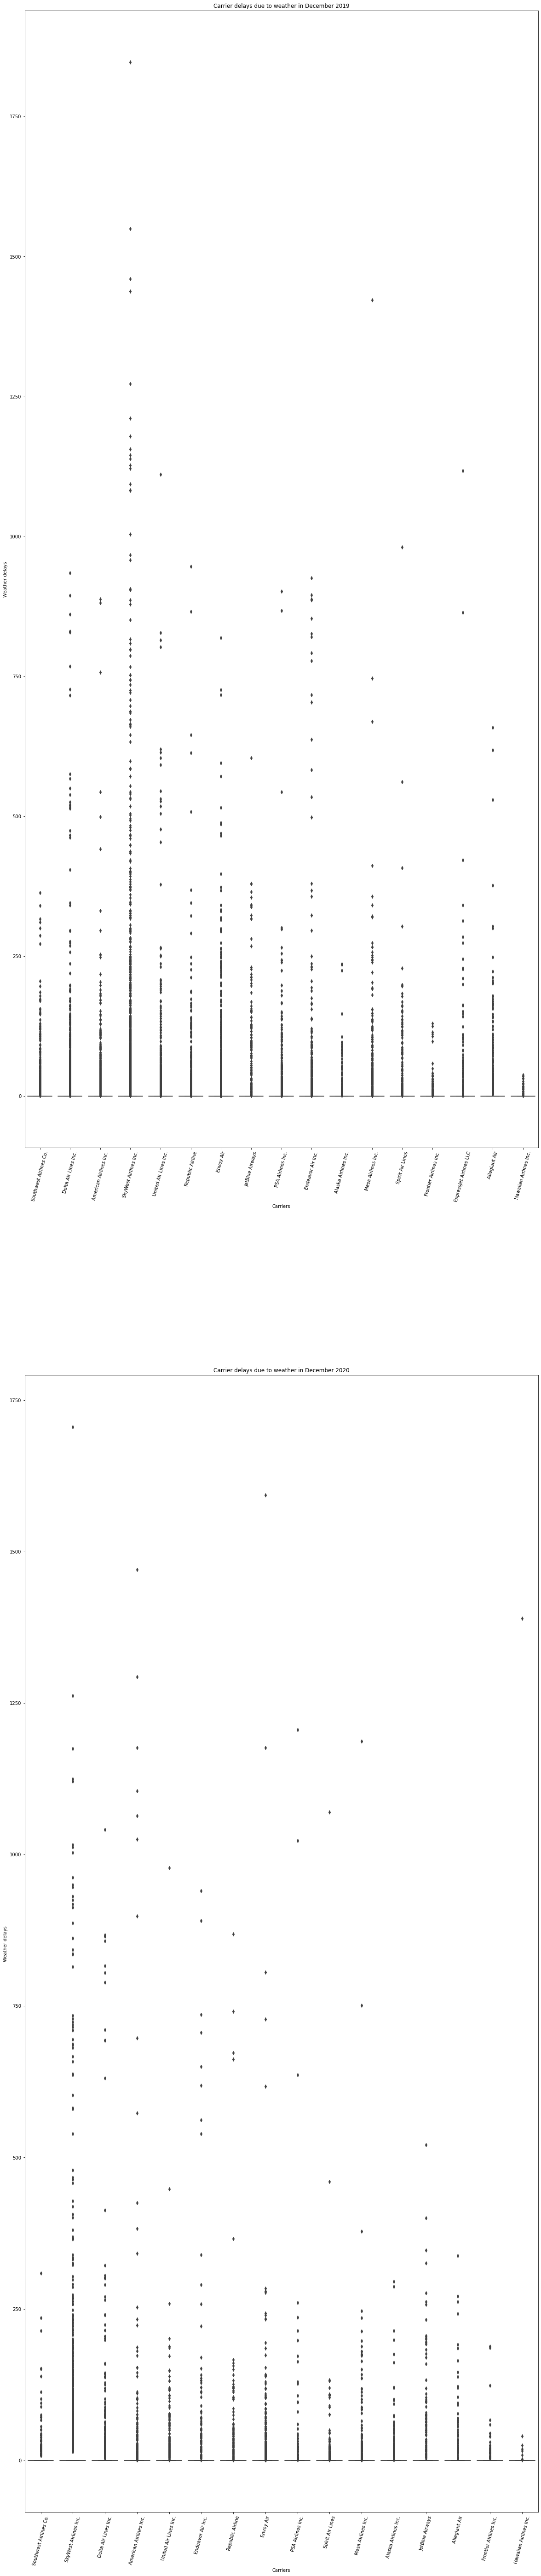

In [317]:
#Carrier vs weather delays
#Box plots for December 2019 
f,ax=plt.subplots(nrows=2,figsize=(20,100))
weather_2019 = df_flights_12_2019_new['CARRIER_DESCRIPTION'].value_counts()
city_weather_2019 = weather_2019.index
sb.boxplot(data = df_flights_12_2019_new, x = 'CARRIER_DESCRIPTION', y = 'WEATHER_DELAY', color = default_color, order=city_weather_2019, ax=ax[0])
ax[0].set_xlabel('Carriers')
ax[0].set_ylabel('Weather delays')
ax[0].set_title('Carrier delays due to weather in December 2019')
ax[0].tick_params(axis="x", rotation=75)

#Plot December 2020
weather_2020 = df_flights_12_2020_new['CARRIER_DESCRIPTION'].value_counts()
city_weather_2020 = weather_2020.index
sb.boxplot(data = df_flights_12_2020_new, x = 'CARRIER_DESCRIPTION', y = 'WEATHER_DELAY', color = default_color, order=city_weather_2020, ax=ax[1])
ax[1].set_xlabel('Carriers')
ax[1].set_ylabel('Weather delays')
ax[1].set_title('Carrier delays due to weather in December 2020')
ax[1].tick_params(axis="x", rotation=75)
plt.show()

**Observation:** The plots above reveal that the length of weather related delays were mostly small across all carriers, but there are outliers which indicate that there were instances when weather related delays were very long. SkyWest Airlines Inc. appears to have the most instances of weather delays, and based on the plots done for delay and arrival so far, this carrier appears to be plagued with delays, however, this will require further investigation.

### 4. Range of National Air Systems (NAS) delays each carrier endured  <a id='nascarr'></a>

Here I explore the NAS delays and generate boxplots to give a visualization of their relationship with carriers, to see the minimum, maximum NAS delays and any outliers. This covers December 2019 and 2020.

In [318]:
#df_flights_12_2019_new.info()

In [319]:
# df_flights_12_2019_new_NAF = df_flights_12_2019_new[df_flights_12_2019_new['NAS_DELAY'] > 0]
# df_flights_12_2019_new_NAF.info()

In [320]:
# #Box plots for December 2019 
# f,ax=plt.subplots(nrows=2,figsize=(20,100))
# dest_2019 = df_flights_12_2019_new['CARRIER_DESCRIPTION'].value_counts()
# city_dest_2019 = dest_2019.index
# sb.boxplot(data = df_flights_12_2019_new, x = 'CARRIER_DESCRIPTION', y = 'NAS_DELAY', color = default_color, order=city_dest_2019, ax=ax[0])
# ax[0].set_xlabel('Carriers')
# ax[0].set_ylabel('National Air System delays (mins)')
# ax[0].set_title('Carrier delays due to National Air System in December 2019')
# ax[0].tick_params(axis="x", rotation=75)

# #Plot December 2020
# dest_2020 = df_flights_12_2020_new['CARRIER_DESCRIPTION'].value_counts()
# city_dest_2020 = dest_2020.index
# sb.boxplot(data = df_flights_12_2020_new, x = 'CARRIER_DESCRIPTION', y = 'NAS_DELAY', color = default_color, order=city_dest_2020, ax=ax[1])
# ax[1].set_xlabel('Carriers')
# ax[1].set_ylabel('National Air System delays (mins)')
# ax[1].set_title('Carrier delays due to National Air System in December 2020')
# ax[1].tick_params(axis="x", rotation=75)
# plt.show()

The plots above reveal that only a small percentage of National Systems delays, since the boxplots are along the x axis, and a cluster of outliers above 0 with SkyWest Airlines Inc. having the furtherest outlier both in 2019 and 2020.

In [321]:
#Review NAS_DELAY data for December 2020
df_flights_12_2019_new['NAS_DELAY'].value_counts()

0       558361
1         2960
15        2745
16        2443
2         2418
         ...  
267          1
263          1
261          1
769          1
1021         1
Name: NAS_DELAY, Length: 435, dtype: int64

In [322]:
# df_flights_12_2020_new[df_flights_12_2019_new['NAS_DELAY'] > 0]

**Only records where NAS_DELAYs > zero will be plotted, since zero represents no delays**

In [323]:
#Only records where NAS_DELAYs > zero will be plotted, since zero represents no delays

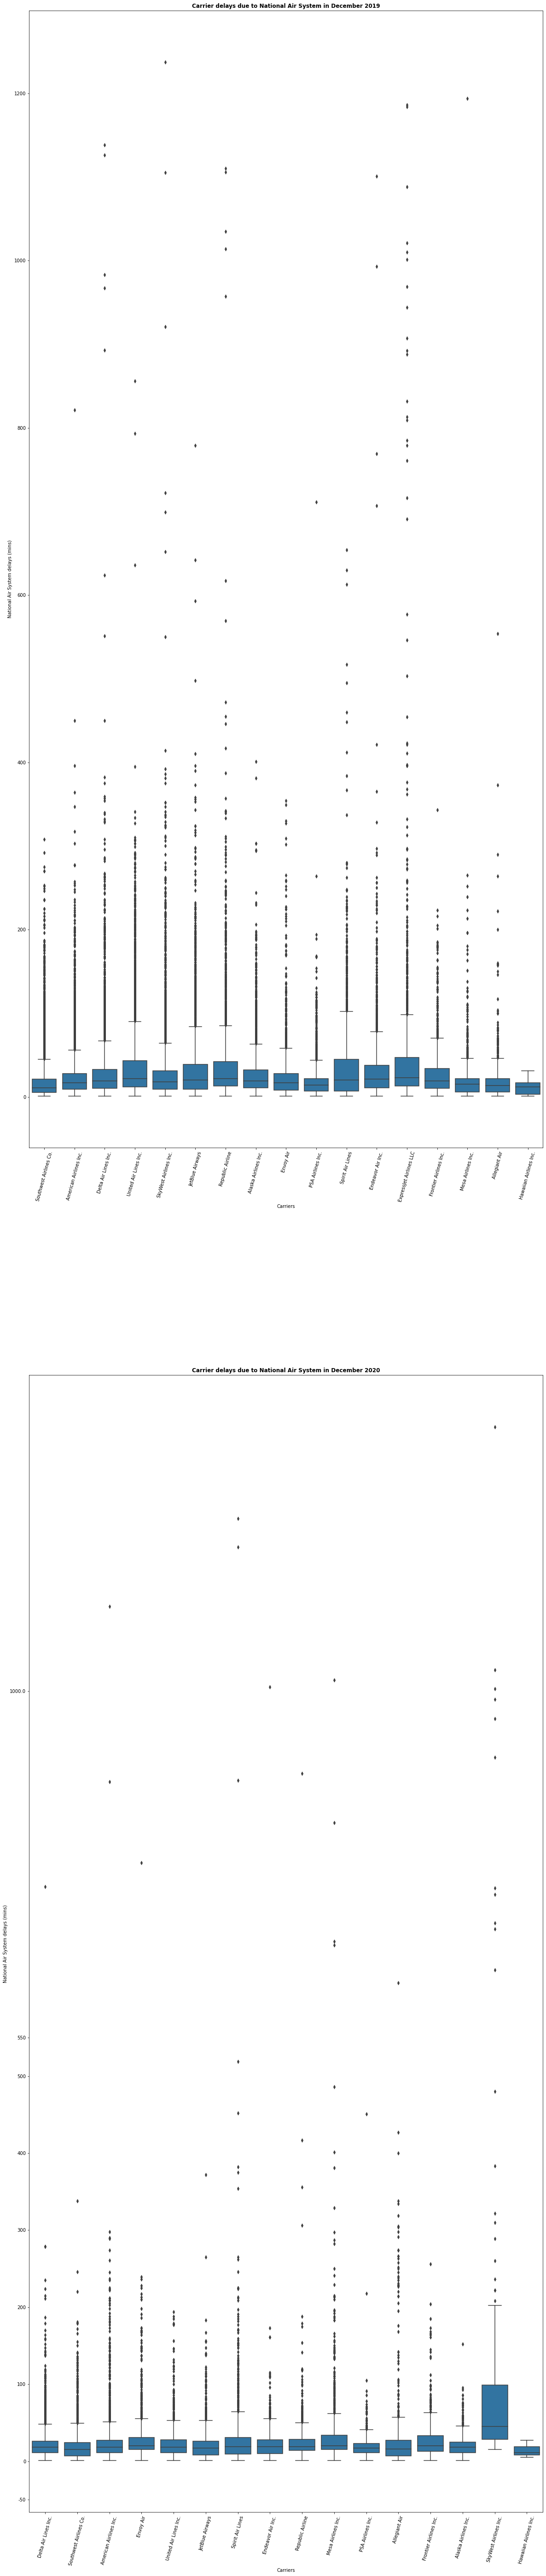

In [324]:

#Box plots for December 2019 
f,ax=plt.subplots(nrows=2,figsize=(20,100))
df_flights_12_2019_new_NAF = df_flights_12_2019_new[df_flights_12_2019_new['NAS_DELAY'] > 0]
dest_2019 = df_flights_12_2019_new_NAF['CARRIER_DESCRIPTION'].value_counts()
city_dest_2019 = dest_2019.index
sb.boxplot(data = df_flights_12_2019_new_NAF, x = 'CARRIER_DESCRIPTION', y = 'NAS_DELAY', color = default_color, order=city_dest_2019, ax=ax[0])
ax[0].set_xlabel('Carriers')
ax[0].set_ylabel('National Air System delays (mins)')
ax[0].set_title('Carrier delays due to National Air System in December 2019', fontweight='bold')
ax[0].tick_params(axis="x", rotation=75)
plt.yticks([-50, 0, 100, 200, 300, 400, 500, 550, 1e3, 1500, 2e3, 2500, 3e3], [-50, 0, 100, 200, 300, 400, 500, 550, 1e3, 1500, 2e3, 2500, 3e3])

#Plot December 2020
df_flights_12_2020_new_NAF = df_flights_12_2020_new[df_flights_12_2020_new['NAS_DELAY'] > 0]
dest_2020 = df_flights_12_2020_new_NAF['CARRIER_DESCRIPTION'].value_counts()
city_dest_2020 = dest_2020.index
sb.boxplot(data = df_flights_12_2020_new_NAF, x = 'CARRIER_DESCRIPTION', y = 'NAS_DELAY', color = default_color, order=city_dest_2020, ax=ax[1])
ax[1].set_xlabel('Carriers')
ax[1].set_ylabel('National Air System delays (mins)')
ax[1].set_title('Carrier delays due to National Air System in December 2020', fontweight='bold')
ax[1].tick_params(axis="x", rotation=75)
plt.show()

**Observation:** The box plots for December 2019 show that the minimum value ( lower whiskers) of NAS related delays were slightly above zero for all carriers, and the maximum NAS related delays, though mainly different among the carriers, were all under 100 minutes. There were instances when flights departed earlier than scheduled. Additionally, the plots show that the majority of delays across all carriers were under 100 minutes long, as seen by the highest whisker. However, there are many outliers across all carriers, indicating that there were times when delays were excessively long, but less frequent than the delays under 100 minutes. In December 2019, Sprit AirLines had a maximum of about 100 minutes, with ExpressJet Airlines closely behind -  but a higher 3rd quartile value.

December 2020 is somewhat different from 2019. The minimum and maximum delays due to NAS affected SkyWest Airlines the most, as it was higher than all other carriers. 

### 5. Range of security delays each carrier endured  <a id='seccarr'></a>

Here I explore the security delays and generate boxplots to give a visualization of their relationship with carriers, to see the minimum, maximum security delays and any outliers. This covers December 2019 and 2020.

In [325]:
#Review SECURITY_DELAY data for December 2019 to see whether there are 0 mins 
df_flights_12_2019_new['SECURITY_DELAY'].value_counts()

0      625287
17         29
8          24
15         22
19         20
        ...  
70          1
71          1
73          1
78          1
366         1
Name: SECURITY_DELAY, Length: 88, dtype: int64

In [326]:
#Review SECURITY_DELAY data for December 2020 to see whether there are 0 mins 
df_flights_12_2020_new['SECURITY_DELAY'].value_counts()

0      371079
16         13
18         12
15         12
4          10
        ...  
47          1
44          1
40          1
258         1
153         1
Name: SECURITY_DELAY, Length: 69, dtype: int64

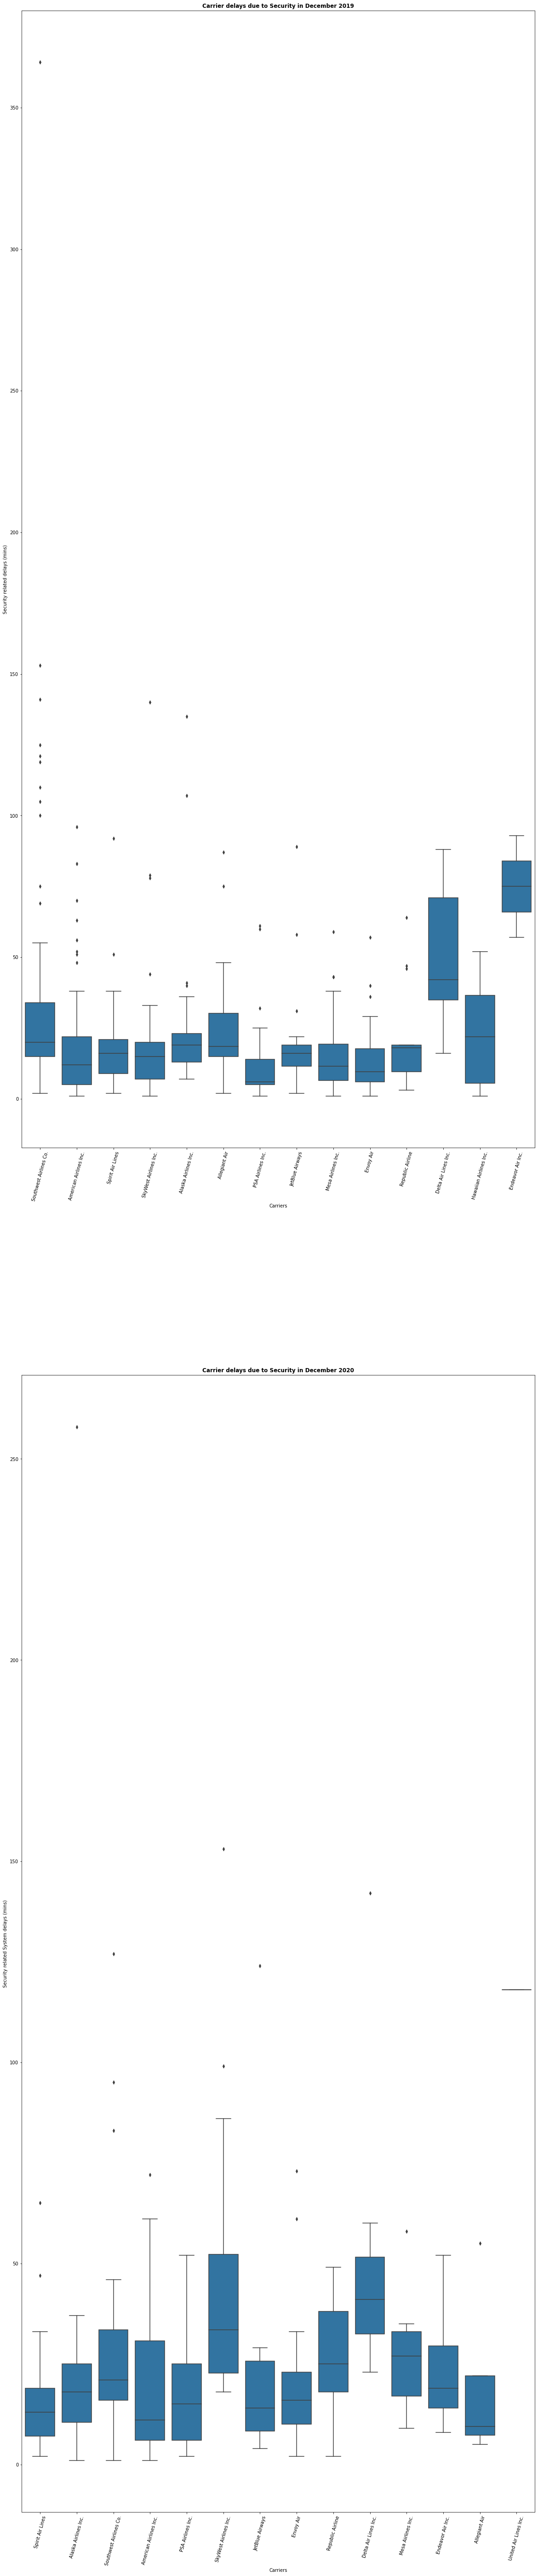

In [327]:
#Box plots for December 2019 
f,ax=plt.subplots(nrows=2,figsize=(20,100))

# Only use records with SECURITY_DELAY > 0 
df_flights_12_2019_new_SECURITY = df_flights_12_2019_new[df_flights_12_2019_new['SECURITY_DELAY'] > 0]

dest_2019 = df_flights_12_2019_new_SECURITY['CARRIER_DESCRIPTION'].value_counts()
city_dest_2019 = dest_2019.index
sb.boxplot(data = df_flights_12_2019_new_SECURITY, x = 'CARRIER_DESCRIPTION', y = 'SECURITY_DELAY', color = default_color, order=city_dest_2019, ax=ax[0])
ax[0].set_xlabel('Carriers')
ax[0].set_ylabel('Security related delays (mins)')
ax[0].set_title('Carrier delays due to Security in December 2019', fontweight='bold')
ax[0].tick_params(axis="x", rotation=75)
# plt.yticks([-50, 0, 100, 200, 300, 400, 500, 550, 1e3, 1500, 2e3, 2500, 3e3], [-50, 0, 100, 200, 300, 400, 500, 550, 1e3, 1500, 2e3, 2500, 3e3])

#Plot December 2020
# Only use records with SECURITY_DELAY > 0 
df_flights_12_2020_new_SECURITY = df_flights_12_2020_new[df_flights_12_2020_new['SECURITY_DELAY'] > 0]

dest_2020 = df_flights_12_2020_new_SECURITY['CARRIER_DESCRIPTION'].value_counts()
city_dest_2020 = dest_2020.index
sb.boxplot(data = df_flights_12_2020_new_SECURITY, x = 'CARRIER_DESCRIPTION', y = 'SECURITY_DELAY', color = default_color, order=city_dest_2020, ax=ax[1])
ax[1].set_xlabel('Carriers')
ax[1].set_ylabel('Security related System delays (mins)')
ax[1].set_title('Carrier delays due to Security in December 2020', fontweight='bold')
ax[1].tick_params(axis="x", rotation=75)

plt.show()

**Observation:** The box plots for December 2019 show that the minimum value ( lower whiskers) of Security related delays were one for all carriers, and more or less the same across carriers, but the maximum Security related delays varied across carriers, with SkyWest Airlines having the maximum, with ExpressJet Airlines following closely. Also all carriers encountered security delays that were longer than the average maximum delays, shown as outliers in the plots, but less frequent than the delays under 200 minutes.

In December 2020, when compared to December 2019, the minimum delay was one minute, and on average smaller and somewhat different from 2019. The minimum and maximum delays due to NAS affected SkyWest Airlines the most as it was higher than all other carriers. 

## Visualization 6

### 6. Top ten cities with early departures <a id='toptendep'></a>

This explores the top ten cities (by flight volume) with early flight departures

#### This analysis is done by picking the top ten airports with the most flights, then calculating the mean early departures from each of these airports.

#### Get records with departure delays < 0, i.e. early departures --- December 2019

In [100]:
#----------------------------**************************
early_departure_2019 = df_flights_12_2019_new[df_flights_12_2019_new['DEP_DELAY'] < 0].sort_values(by='ORIGIN_CITY', ascending=False)
# early_departure_2019

#### Get records with departure delays < 0, i.e. early departures --- December 2020

In [101]:
#----------------------------**************************
early_departure_2020 = df_flights_12_2020_new[df_flights_12_2020_new['DEP_DELAY'] < 0].sort_values(by='ORIGIN_CITY', ascending=False)
# early_departure_2020

#### Get airport names with the top ten frequent flights  --- December 2019

In [102]:
## Get airports with the top ten frequent flights
airport_least_delays_2019 = early_departure_2019.ORIGIN_CITY.value_counts().head(10).index
airport_least_delays_2019

Index(['(ATL) Atlanta, GA', '(ORD) Chicago, IL', '(DFW) Dallas/Fort Worth, TX',
       '(CLT) Charlotte, NC', '(DEN) Denver, CO', '(IAH) Houston, TX',
       '(LAX) Los Angeles, CA', '(DTW) Detroit, MI', '(PHX) Phoenix, AZ',
       '(LGA) New York, NY'],
      dtype='object')

#### Get airport names with the top ten frequent flights  --- December 2020

In [103]:
## Get airports with the top ten frequent flights
airport_least_delays_2020 = early_departure_2020.ORIGIN_CITY.value_counts().head(10).index
airport_least_delays_2020

Index(['(ATL) Atlanta, GA', '(DFW) Dallas/Fort Worth, TX', '(DEN) Denver, CO',
       '(CLT) Charlotte, NC', '(ORD) Chicago, IL', '(LAX) Los Angeles, CA',
       '(PHX) Phoenix, AZ', '(DTW) Detroit, MI', '(SEA) Seattle, WA',
       '(MSP) Minneapolis, MN'],
      dtype='object')

#### Get data for the top 10 airports  --- December 2019

In [104]:
##### Get data for the top ten airports
df_flights_12_2019_new_dep = early_departure_2019[(early_departure_2019['ORIGIN_CITY']).isin(airport_least_delays_2019)]
# df_flights_12_2019_new_dep

#### Get data for the top 10 airports  --- December 2020

In [105]:
##### Get data for the top ten airports
df_flights_12_2020_new_dep = early_departure_2020[(early_departure_2020['ORIGIN_CITY']).isin(airport_least_delays_2020)]
# df_flights_12_2020_new_dep

#### Get departure delays at top ten airports  --- December 2019

In [106]:
top_airports_2019 = df_flights_12_2019_new_dep.groupby(['ORIGIN_CITY'])['DEP_DELAY'].mean().sort_values()[0:]
top_airports_2019

ORIGIN_CITY
(LGA) New York, NY            -5.313835
(IAH) Houston, TX             -4.774239
(LAX) Los Angeles, CA         -4.632596
(CLT) Charlotte, NC           -4.547649
(DEN) Denver, CO              -4.481754
(PHX) Phoenix, AZ             -4.437573
(ORD) Chicago, IL             -4.356771
(DFW) Dallas/Fort Worth, TX   -4.184876
(DTW) Detroit, MI             -3.808064
(ATL) Atlanta, GA             -3.599339
Name: DEP_DELAY, dtype: float64

#### Get departure delays at top ten airports  --- December 2020

In [107]:
top_airports_2020 = df_flights_12_2020_new_dep.groupby(['ORIGIN_CITY'])['DEP_DELAY'].mean().sort_values()[0:]
top_airports_2020

ORIGIN_CITY
(SEA) Seattle, WA             -6.392956
(LAX) Los Angeles, CA         -5.973521
(CLT) Charlotte, NC           -5.631752
(ORD) Chicago, IL             -5.506845
(DEN) Denver, CO              -5.410153
(PHX) Phoenix, AZ             -5.320949
(MSP) Minneapolis, MN         -4.778587
(DTW) Detroit, MI             -4.719994
(DFW) Dallas/Fort Worth, TX   -4.566862
(ATL) Atlanta, GA             -4.318543
Name: DEP_DELAY, dtype: float64

#### Plot bar chart of airport with early departures --- December 2019

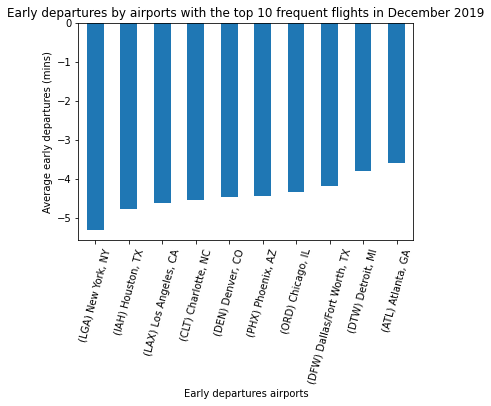

In [108]:
top_airports_2019.plot(kind='bar', xlabel = 'Early departures airports', 
                  ylabel = 'Average early departures (mins)', 
                  title = "Early departures by airports with the top 10 frequent flights in December 2019",
                  rot=75);

#### Plot bar chart of airport with early departures  -- December 2020

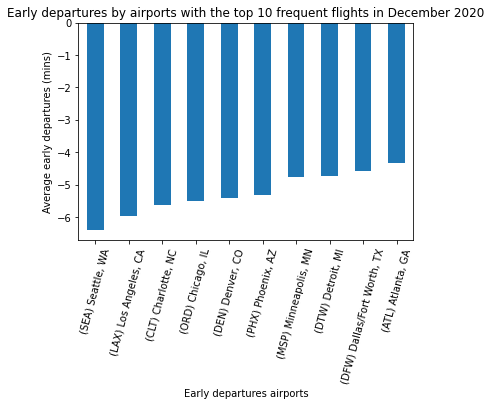

In [109]:
top_airports_2020.plot(kind='bar', xlabel = 'Early departures airports', 
                  ylabel = 'Average early departures (mins)', 
                  title = "Early departures by airports with the top 10 frequent flights in December 2020",
                  rot=75);

**Another view with box plots**

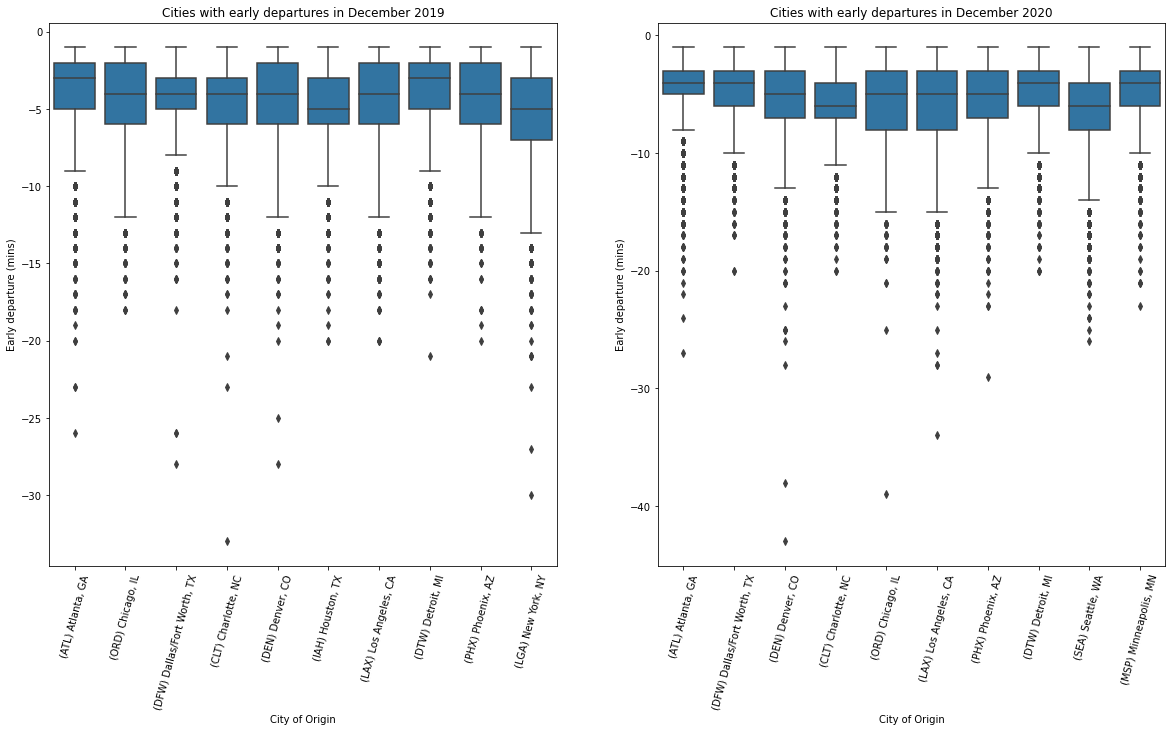

In [110]:
#Box plots for December 2019 
f,ax=plt.subplots(nrows=1,ncols=2, figsize=(20,10));
#top cities with most flights

origin_2019 = df_flights_12_2019_new_dep['ORIGIN_CITY'].value_counts();
# print(origin_2019)
city_origin_2019 = origin_2019.index;
  
sb.boxplot(data = df_flights_12_2019_new_dep, x = 'ORIGIN_CITY', y = 'DEP_DELAY', color = default_color, order=city_origin_2019, ax=ax[0]);
ax[0].set_xlabel('City of Origin');
ax[0].set_ylabel('Early departure (mins)');
ax[0].set_title('Cities with early departures in December 2019');
ax[0].tick_params(axis="x", rotation=75);
# plt.yticks([-50, 0, 100, 200, 300, 400, 500, 550, 1e3, 1500, 2e3, 2500, 3e3], [-50, 0, 100, 200, 300, 400, 500, 550, 1e3, 1500, 2e3, 2500, 3e3])

#Plot December 2020
origin_2020 = df_flights_12_2020_new_dep['ORIGIN_CITY'].value_counts();
city_origin_2020 = origin_2020.index;
sb.boxplot(data = df_flights_12_2020_new_dep, x = 'ORIGIN_CITY', y = 'DEP_DELAY', color = default_color, order=city_origin_2020, ax=ax[1]);
ax[1].set_xlabel('City of Origin');
ax[1].set_ylabel('Early departure (mins)');
ax[1].set_title('Cities with early departures in December 2020');
ax[1].tick_params(axis="x", rotation=75);
plt.show();

**Observation:** Generally negative numbers are smaller as they increase numerically in the negative direction, but the negative numbers for the early delays will be interpreted in the opposite order. Based on the plots, ATL Atlanta airport had the earliest average departure time in both 2019 and 2020, while LaGuardia and SEA Seattle airports had the least earliest average departure time in December 2019 and 2020, respectively, i.e.longest average departure time than the rest of the airports. 

### 7. Carriers with cancellations in December 2019  <a id='carrcan'></a>

Here I explore the cancellations incurred by the carriers and generate plots to give a visualization of their relationship. This covers December 2019 and 2020.

In [339]:
#Get the cancellation data and sort by the carriers
cancellations_2019 = df_flights_12_2019_new[df_flights_12_2019_new['CANCELLED'] == 1].sort_values(by='CARRIER_DESCRIPTION', ascending=False)
cancellations_2019

,,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,CARRIER_DESCRIPTION,CANCELLED_DESCRIPTION,ORIGIN_CITY,DEST_CITY
420809,2019,4,12,17,2,12/17/2019,UA,19977,UA,0,...,,,,,,0,United Air Lines Inc.,Carrier,"(MIA) Miami, FL","(EWR) Newark, NJ"
31615,2019,4,12,21,6,12/21/2019,UA,19977,UA,0,...,,,,,,0,United Air Lines Inc.,Carrier,"(DEN) Denver, CO","(ORD) Chicago, IL"
33149,2019,4,12,20,5,12/20/2019,UA,19977,UA,0,...,,,,,,0,United Air Lines Inc.,Carrier,"(SFO) San Francisco, CA","(ORD) Chicago, IL"
33946,2019,4,12,19,4,12/19/2019,UA,19977,UA,0,...,,,,,,0,United Air Lines Inc.,Carrier,"(SAN) San Diego, CA","(EWR) Newark, NJ"
34017,2019,4,12,19,4,12/19/2019,UA,19977,UA,0,...,,,,,,0,United Air Lines Inc.,Weather,"(MCO) Orlando, FL","(ORD) Chicago, IL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609208,2019,4,12,17,2,12/17/2019,AS,19930,AS,N527VA,...,,,,,,0,Alaska Airlines Inc.,Carrier,"(SJC) San Jose, CA","(SAN) San Diego, CA"
609058,2019,4,12,17,2,12/17/2019,AS,19930,AS,N527VA,...,,,,,,0,Alaska Airlines Inc.,Carrier,"(SAN) San Diego, CA","(SJC) San Jose, CA"
609046,2019,4,12,17,2,12/17/2019,AS,19930,AS,N623VA,...,,,,,,0,Alaska Airlines Inc.,Carrier,"(AUS) Austin, TX","(SEA) Seattle, WA"
608482,2019,4,12,16,1,12/16/2019,AS,19930,AS,N625VA,...,,,,,,0,Alaska Airlines Inc.,Carrier,"(SJC) San Jose, CA","(SEA) Seattle, WA"


In [340]:
#Get the list of airlines that have experienced cancellations and the count of cancellations
cancelled_carriers_2019 = cancellations_2019.groupby(['CARRIER_DESCRIPTION'])['CANCELLED'].sum().sort_values()[0:]
cancelled_carriers_2019

CARRIER_DESCRIPTION
Hawaiian Airlines Inc.        8
Delta Air Lines Inc.         26
Allegiant Air                70
Spirit Air Lines             98
Frontier Airlines Inc.      139
United Air Lines Inc.       139
American Airlines Inc.      177
JetBlue Airways             183
ExpressJet Airlines LLC     233
Alaska Airlines Inc.        241
Endeavor Air Inc.           246
PSA Airlines Inc.           273
Mesa Airlines Inc.          298
Envoy Air                   379
Republic Airline            558
Southwest Airlines Co.     1194
SkyWest Airlines Inc.      1531
Name: CANCELLED, dtype: int64

<AxesSubplot:title={'center':'Carriers vs cancellations in December 2019'}, xlabel='Carriers', ylabel='Number of cancellations'>

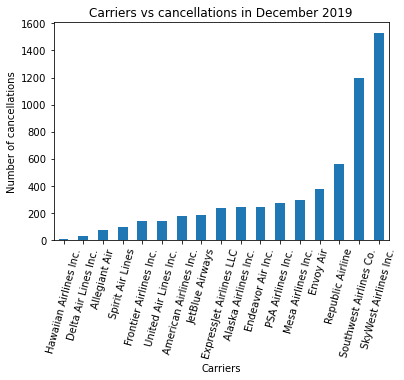

In [341]:
#Plot the carriers and the number of cancellations for each carrier
cancelled_carriers_2019.plot(kind='bar', xlabel = 'Carriers', 
                  ylabel = 'Number of cancellations', 
                  title = "Carriers vs cancellations in December 2019",
                  rot=75)

**Observations**: Although SkyWest Airlines shows the largest number of cancellations in December 2019. Although this plot may not be enough to conclude that there is enough information to conclude that this airline might be problematic, we saw in previous plots that this airline had the highest delays due to Security and National Air Systems. So it might be fair to say that this plot truely reflects the performance of SkyWest and some other airlines, but not necessarily all airlines. 
I will proceed with other plots below to see if direct correlations can be drawn that can shed more light on the carrier cancellations. 

## Visualization 7

### 8. Cancellations vs delays (weather, security, NAS)  <a id='canvsdel'></a>

**This section explores the data to determine whether there is any correlation between cancellation and weather, security and NAS delays**

In [146]:
numeric_vars =['CANCELLED','SECURITY_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'ARR_DELAY', 'DEP_DELAY']

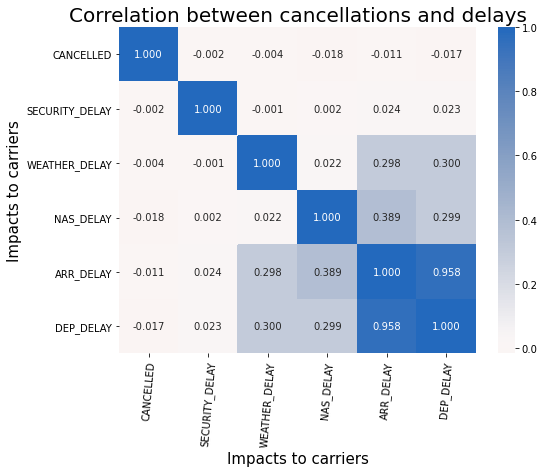

In [123]:
# correlation plot
plt.figure(figsize = [8, 6]);
sb.heatmap(df_flights_12_2019_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Correlation between cancellations and delays', fontsize=20);
plt.xlabel('Impacts to carriers', fontsize=15);
plt.xticks(rotation=85)
plt.ylabel('Impacts to carriers', fontsize=15);
plt.show();

**The following is some additional plotting done to further explore the data to see if there are any correlations.**

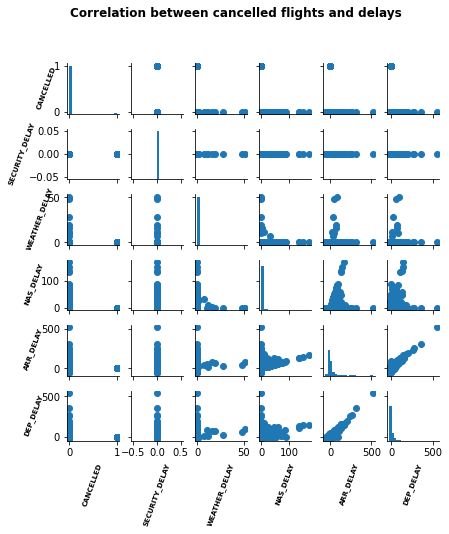

In [191]:
#Create sample data 
# plt.figure(figsize = [8, 3]);
samples = np.random.choice(df_flights_12_2019_new.shape[0], 1000, replace = False);
samp_12_2019 = df_flights_12_2019_new.loc[samples,:];
g = sb.PairGrid(data = samp_12_2019, vars = numeric_vars, height=1);
g = g.map_diag(plt.hist, bins = 20);

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), fontsize = 7, fontweight = 'bold', rotation = 70);
    ax.set_ylabel(ax.get_ylabel(), fontsize = 7, fontweight = 'bold', rotation = 70);
plt.suptitle('Correlation between cancelled flights and delays', fontweight= 'bold', y=1.1);

g.map_offdiag(plt.scatter);

**Observation**:The plots don't show any direct correlation between **cancelled flights and security, weather, NAS, arrival and departure delays**. However **arrival and departure delays** are correlated with one another, as well as **security delay and arrival and departure delays**, with some data points on the x axis of the **security delay vs arrival and departure delays**, indicating that there were some arrival and departure delays not related to security delays.
The plots between **arrival delays and NAS delays, and between departure delays and NAS delays** are of interest, as there are indications of correlations where NAS delays have occurred when there were arrival and departure delays.
There isn't enough information to conclude that there is a correlation between **NAS and security delays**, since the majority of the datapoints along the x and y axis, with only a minimum amount of data points intersecting NAS and security.
However, there are a small number of data points in the weather delay and NAS delay plot, which seems to indicate a small correlation between the two - based on the previous analysis and my review if the data, there I would conclude that there were a few instances when weather delays may have lead to NAS delays.

## Multivariate Exploration

In this part of the analysis I want to explore how the different delay categories and the cancellations impacted the ten busiest airports (origin airports with most flights)

## Visualization 8

### 1. Activities at top ten busiest airports  <a id='tenbusiest'></a>

This section will explore the top 10 busiest airports (where flights originated) and produce a visual of the type of cancellations and volume of each cancellation type - 'Carrier', 'Weather', 'National Air System' and 'Security' impacting the airports.

In [399]:
#Top ten airports with the most flights in December 2019
top_airports_2019 = df_flights_12_2019_new['ORIGIN_CITY'].value_counts().head(10).index
top_airports_2019

Index(['(ATL) Atlanta, GA', '(ORD) Chicago, IL', '(DFW) Dallas/Fort Worth, TX',
       '(DEN) Denver, CO', '(CLT) Charlotte, NC', '(LAX) Los Angeles, CA',
       '(PHX) Phoenix, AZ', '(IAH) Houston, TX', '(SFO) San Francisco, CA',
       '(LGA) New York, NY'],
      dtype='object')

In [347]:
# #Top ten airports with the most flights in December 2020
top_airports_2020 = df_flights_12_2020_new['ORIGIN_CITY'].value_counts().head(10).index
top_airports_2020

Index(['(ATL) Atlanta, GA', '(DFW) Dallas/Fort Worth, TX', '(DEN) Denver, CO',
       '(CLT) Charlotte, NC', '(ORD) Chicago, IL', '(PHX) Phoenix, AZ',
       '(LAX) Los Angeles, CA', '(DTW) Detroit, MI', '(MSP) Minneapolis, MN',
       '(SLC) Salt Lake City, UT'],
      dtype='object')

In [348]:
#Select the records from the 2019 dataframe only for the cities with the top ten airports (in top_airports_2019)
top_ten_airports_2019 = df_flights_12_2019_new[df_flights_12_2019_new['ORIGIN_CITY'].isin(top_airports_2019)]

In [349]:
#Select the records from the 2020 dataframe only for the cities with the top ten airports (in top_airports_2019)
top_ten_airports_2020 = df_flights_12_2020_new[df_flights_12_2020_new['ORIGIN_CITY'].isin(top_airports_2020)]
top_ten_airports_2020

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,CARRIER_DESCRIPTION,CANCELLED_DESCRIPTION,ORIGIN_CITY,DEST_CITY
4,2020,4,12,1,2,12/1/2020,AA,19805,AA,N914UY,...,,,,,,0,American Airlines Inc.,NaN,"(CLT) Charlotte, NC","(MCO) Orlando, FL"
5,2020,4,12,3,4,12/3/2020,AA,19805,AA,N587UW,...,,,,,,0,American Airlines Inc.,NaN,"(CLT) Charlotte, NC","(MCO) Orlando, FL"
6,2020,4,12,4,5,12/4/2020,AA,19805,AA,N583UW,...,,,,,,0,American Airlines Inc.,NaN,"(CLT) Charlotte, NC","(MCO) Orlando, FL"
7,2020,4,12,6,7,12/6/2020,AA,19805,AA,N150UW,...,,,,,,0,American Airlines Inc.,NaN,"(CLT) Charlotte, NC","(MCO) Orlando, FL"
8,2020,4,12,7,1,12/7/2020,AA,19805,AA,N586UW,...,,,,,,0,American Airlines Inc.,NaN,"(CLT) Charlotte, NC","(MCO) Orlando, FL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370925,2020,4,12,23,3,12/23/2020,WN,19393,WN,N281WN,...,,,,,,0,Southwest Airlines Co.,NaN,"(LAX) Los Angeles, CA","(SMF) Sacramento, CA"
370926,2020,4,12,23,3,12/23/2020,WN,19393,WN,N284WN,...,,,,,,0,Southwest Airlines Co.,NaN,"(LAX) Los Angeles, CA","(SMF) Sacramento, CA"
370927,2020,4,12,23,3,12/23/2020,WN,19393,WN,N8552Z,...,,,,,,0,Southwest Airlines Co.,NaN,"(LAX) Los Angeles, CA","(STL) St. Louis, MO"
370928,2020,4,12,23,3,12/23/2020,WN,19393,WN,N431WN,...,,,,,,0,Southwest Airlines Co.,NaN,"(LAX) Los Angeles, CA","(STL) St. Louis, MO"


The following code gets the data and presents a visualization of the cancellation rates at the top 10 airports identified above, for the four cancellation types - Carrier, Weather, National Air System and Security

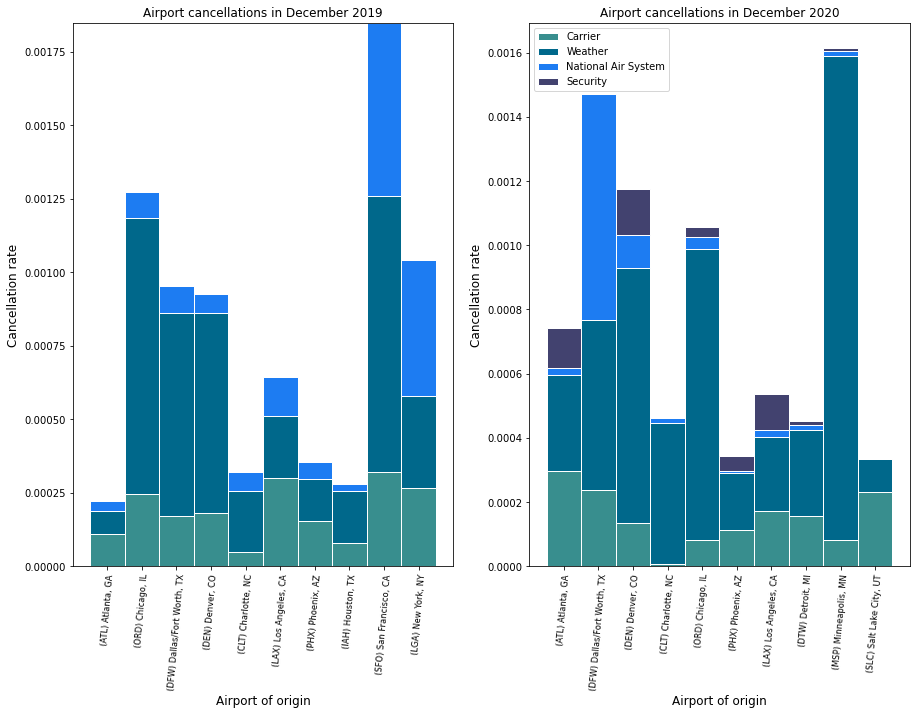

In [403]:
cancelled_type =['Carrier', 'Weather', 'National Air System', 'Security']
#Set a variable 'i' to indicate which array the calculated cancellation rate should be added to, for the bar plots
#A maximum of 4 bars will be stacked - one for each cancellation type
i = 1
#define variables to store cancellation rates for 2019 and 2020
bars1_2019, bars2_2019, bars3_2019, bars4_2019, bars1_2020, bars2_2020, bars3_2020, bars4_2020  = [], [], [], [], [], [], [], []

#Follow the steps in the order indicated to understand the flow of the code
#########################################  STEP 3  ###################################################
# function (cancellation_type)
# Input parameters:    airport, cancellation type
# Output:   Calculated rate of cancellation type 
# Description: 
#  This function calculates the rate of cancellation types for each airport and passes it back to call_cancel_type,
#   which appends it to an array to be plotted later
#############################################################################################################################
def cancellation_type(airport, cancel_type, t_year):
#use 'shape' to get the number of occurrences of the cancellation code for airport 
    if (t_year == '2019'):
        code_occurence_2019 = top_ten_airports_2019[(top_ten_airports_2019['ORIGIN_CITY'] == airport) & 
                                                    (top_ten_airports_2019['CANCELLED_DESCRIPTION'] == cancel_type)].shape[0]
        # calculate the rate of the cancellation code
       # print("code_cancel in 2019",code_occurence_2019 )
        return (code_occurence_2019/top_ten_airports_2019.shape[0])

    elif (t_year == '2020'):
        code_occurence_2020 = top_ten_airports_2020[(top_ten_airports_2020['ORIGIN_CITY'] == airport) & 
                                                    (top_ten_airports_2020['CANCELLED_DESCRIPTION'] == cancel_type)].shape[0]
        # calculate the rate of the cancellation code
        #print("code_cancel in 2020",code_occurence_2020 )
        return (code_occurence_2020/top_ten_airports_2020.shape[0])


#########################################  STEP 2  ###################################################
# function (call_cancel_type)
# Input parameters:    Cancellation type
# Output: Gets calculated rate of cancellation type returned by function 'cancellation_type' and appends to bars1, bars2, bars3, 
#           bars4 arrays
# Description: 
#           This function calls function cancellation_type to get the cancellation type rate, by doing the following:
#            1. for each of the top 10 airports, it passes the cancellation type and a top ten airport to the cancellation_type 
#               function above 
#            2. takes the cancellation type rate returned from cancellation_type and appends it to the corresponding bar array 
#               to be plotted later
#############################################################################################################################
def call_cancel_type(cancel_type, i, t_year):
    #print("tyear in call_cancel_type function is", t_year)
    if t_year == '2019':
        for airport in top_airports_2019:
            if i == 1:
                bars1_2019.append(cancellation_type(airport, cancel_type, t_year))
            if i == 2:
                bars2_2019.append(cancellation_type(airport, cancel_type, t_year))
            if i == 3:
                bars3_2019.append(cancellation_type(airport, cancel_type, t_year))
            if i == 4:
                bars4_2019.append(cancellation_type(airport, cancel_type, t_year))
    elif t_year == '2020':
        for airport2 in top_airports_2020:
            if i == 1:
 #               print("airport in 2020", airport2)
                bars1_2020.append(cancellation_type(airport2, cancel_type, t_year))
            if i == 2:
                bars2_2020.append(cancellation_type(airport2, cancel_type, t_year))
            if i == 3:
                bars3_2020.append(cancellation_type(airport2, cancel_type, t_year))
            if i == 4:
                bars4_2020.append(cancellation_type(airport2, cancel_type, t_year))
            
            #print("i in 2020", i)
    
#########################################  STEP 1  #########################################################################
# Description:
#       There are two for loops below - the outer will iterate over the values in array 'top_year' twice, and the inner
#       will iterate over the array (cancelled_type) of cancellation types and calls the function 'call_cancel_type' for each
#       cancellation type and passes a cancellation type,as well as a counter variable 'i', which does not increase beyond 
#       the number of cancellation types 
#############################################################################################################################
top_year = ['2019', '2020']

for t_year in top_year:
    for cancel_type in cancelled_type:
        #Call function in step 2
        call_cancel_type(cancel_type, i, t_year  )
        i = i+1
    #Reset i after each year
    i = 1        
##--------- Stack the first two bars - bars1 + bars2
bars12_2019 = np.add(bars1_2019, bars2_2019).tolist()

##--------- Stack the 3rd bar on top of the first two bars
bars123_2019 = np.add(bars12_2019, bars3_2019).tolist()

##--------- The position of the bars on the x-axis
r1 = [0,1,2,3,4,5,6,7,8,9]
r2 = [0,1,2,3,4,5,6,7,8,9]

# Names of group and bar width
names_2019 = list(top_airports_2019)
barWidth = 1

########################################  Plot the graphs #####################################
f,ax=plt.subplots(nrows=1,ncols=2, figsize=(15,10))
#Create bars with colors 
ax[0].bar(r1, bars1_2019, color='#388E8E', edgecolor='white', width=barWidth, tick_label=names_2019)
ax[0].bar(r1, bars2_2019, bottom=bars1_2019, color='#00688B', edgecolor='white', width=barWidth)
ax[0].bar(r1, bars3_2019, bottom=bars12_2019, color='#1D7CF2', edgecolor='white', width=barWidth)
ax[0].bar(r1, bars4_2019, bottom=bars123_2019, color='#42426F', edgecolor='white', width=barWidth)

ax[0].tick_params("x", labelrotation=85, labelsize='small')  

ax[0].set_xlabel('Airport of origin', fontsize=12)
ax[0].set_ylabel('Cancellation rate', fontsize=12)
ax[0].set_title('Airport cancellations in December 2019')

plt.legend(cancelled_type) 

###### 2020 plot
    
##--------- Stack the first two bars - bars1 + bars2
bars12_2020 = np.add(bars1_2020, bars2_2020).tolist()
#             print("BARS12 is", bars12)

##--------- Stack the 3rd bar on top of the first two bars
bars123_2020 = np.add(bars12_2020, bars3_2020).tolist()

##--------- The position of the bars on the x-axis
# r = [0,1,2,3,4,5,6,7,8,9]

# Names of group and bar width
names_2020 = list(top_airports_2020)
barWidth = 1

#Create bars with colors provided
ax[1].bar(r2, bars1_2020, color='#388E8E', edgecolor='white', width=barWidth,  tick_label=names_2020)
ax[1].bar(r2, bars2_2020, bottom=bars1_2020, color='#00688B', edgecolor='white', width=barWidth)
ax[1].bar(r2, bars3_2020, bottom=bars12_2020, color='#1D7CF2', edgecolor='white', width=barWidth)
ax[1].bar(r2, bars4_2020, bottom=bars123_2020, color='#42426F', edgecolor='white', width=barWidth)

ax[1].tick_params("x", labelrotation=85, labelsize='small')  

ax[1].set_xlabel('Airport of origin', fontsize=12)
ax[1].set_ylabel('Cancellation rate', fontsize=12)
ax[1].set_title('Airport cancellations in December 2020')

plt.legend(cancelled_type) 


plt.show()

**Observation for December 2019:** Most of the cancellations were weather related, with Chicago and San Francisco having the highest rate. Whereas National Air System (NAS) cancellations were the least in most airports, except for San Francisco and New York La Guardia, which had significantly higher NAS delays. No security delays occured in the top ten airports where flights originated, and carrier related delays were the second lowest across. Overall, San Francisco airport had the largest combined cancellations, with Chicago following behind. 

**Observation for December 2020:** Most of the cancellations were weather related, with Minneapolis (MSP) airport having the highest number of weather related delays, followed by Chicago (ORD) and Denver airports. Unlike in December 2019, there were some security related cancellations in 7 out of the 10 airports plotted, with Denver, Atlanta (ATL) and Los Angeles (LAX) amongst the highest. All of the airports experienced carrier related delays, with Charlotte (CLT) having the least impact. Of the four cancellation types, Dallas Forst Worth appears to have had a great share of the three of them, i.e. Carrier, Weather, and NAS. 

In [215]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1377976 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\mhead\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\mhead\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\mhead\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\mhead\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\mhead\anaconda3\lib\site-packages